
(nonself)=  
# Nonself, 🌊  

<style>
/* ╭━━━☆━━━╮  FLOAT FRAMES (Figure / Seealso) */
.float-frame {
    border: 1px solid #ccc;
    background-color: #f9f9f9;
    position: relative;
    padding: 10px 14px;
    margin: 15px;
    font-family: sans-serif;
    font-size: 14px;
    line-height: 1.5;
}

/* Floated figure (image/code block) */
.float-frame.figure-style {
    float: right;
    width: 35%;
    text-align: center;
}

/* Floated seealso (text-only callout) */
.float-frame.seealso-style {
    float: right;
    width: 45%;
    max-width: 400px;
    min-width: 200px;
    text-align: left;
    white-space: normal;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
}

/* Responsive override */
@media (max-width: 768px) {
    .float-frame {
        float: none !important;
        display: block;
        width: 95vw !important;
        max-width: 95vw !important;
        margin: 10px auto;
    }
}

/* ╭━━━☆━━━╮  BLOCKQUOTES */
blockquote {
    border-left: 2px solid #999;
    padding-left: 1em;
    margin-left: 0;
    margin-right: 0;
    color: #444;
    font-style: italic;
    background: none;
}

blockquote a {
    text-decoration: none;
    font-style: normal;
    color: #333;
    border-bottom: 1px dotted #aaa;
}

blockquote a:hover {
    color: #000;
    border-bottom: 1px solid #555;
}

/* ╭━━━☆━━━╮  COLLAPSIBLE <details> BLOCKS */
.custom-details summary {
    list-style: none;
    cursor: pointer;
    font-weight: normal;
    display: inline-block;
    padding: 5px 15px;
    border: 2px dotted black;
    border-radius: 20px;
    text-align: center;
    transition: color 0.3s ease-in-out;
}

.custom-details summary:hover {
    color: lightgray;
}

.custom-details summary::-webkit-details-marker {
    display: none;
}

/* ╭━━━☆━━━╮  NESTED QUOTES INSIDE DETAILS */
.quote-content {
    border-left: 4px solid #ccc;
    padding-left: 10px;
    color: #555;
    font-style: italic;
    margin-top: 15px;
}

.quote-content details {
    margin-top: 10px;
}

.quote-content summary {
    font-weight: bold;
    cursor: pointer;
}
</style>

<details class="custom-details">
  <summary>+ Expand</summary>

  <iframe src="pdfs/ecosystem-nature.pdf" width="100%" height="1000px" style="border:none"></iframe>

  <blockquote class="quote-content">
    <details>
      <summary>Analysis</summary>
      <p>In designing the scenery and costumes...</p>
    </details>
    <p>-- <a href="https://www.gutenberg.org/cache/epub/887/pg887-images.html#page221">The Truth of Masks 🎭</a></p>
  </blockquote>
</details>

<script>
  document.addEventListener("DOMContentLoaded", function() {
    const details = document.querySelector(".custom-details");
    const summary = details.querySelector("summary");

    details.addEventListener("toggle", function() {
      summary.textContent = details.open ? "- Collapse" : "+ Expand";
    });
  });
</script>


<p></p>
<p></p> 

EDITOR'S NOTE.
In 1887, with the view of amplifying and completing certain new doctrines which he had merely sketched in Beyond Good and Evil (see especially aphorism 260), Nietzsche published The Genealogy of Morals. This work is perhaps the least aphoristic, in form, of all Nietzsche's productions. For analytical power, more especially in those parts where Nietzsche examines the ascetic ideal, The Genealogy of Morals is unequalled by any other of his works; and, in the light which it throws upon the attitude of the ecclesiast to the man of resentment and misfortune, it is one of the most valuable contributions to sacerdotal psychology.


PREFACE.
1.

We are unknown, we knowers, ourselves to ourselves: this has its own good reason. We have never searched for ourselves—how should it then come to pass, that we should ever find ourselves? Rightly has it been said: "Where your treasure is, there will your heart be also." Our treasure is there, where stand the hives of our knowledge. It is to those hives that we are always striving; as born creatures of flight, and as the honey-gatherers of the spirit, we care really in our hearts only for one thing—to bring something "home to the hive!"

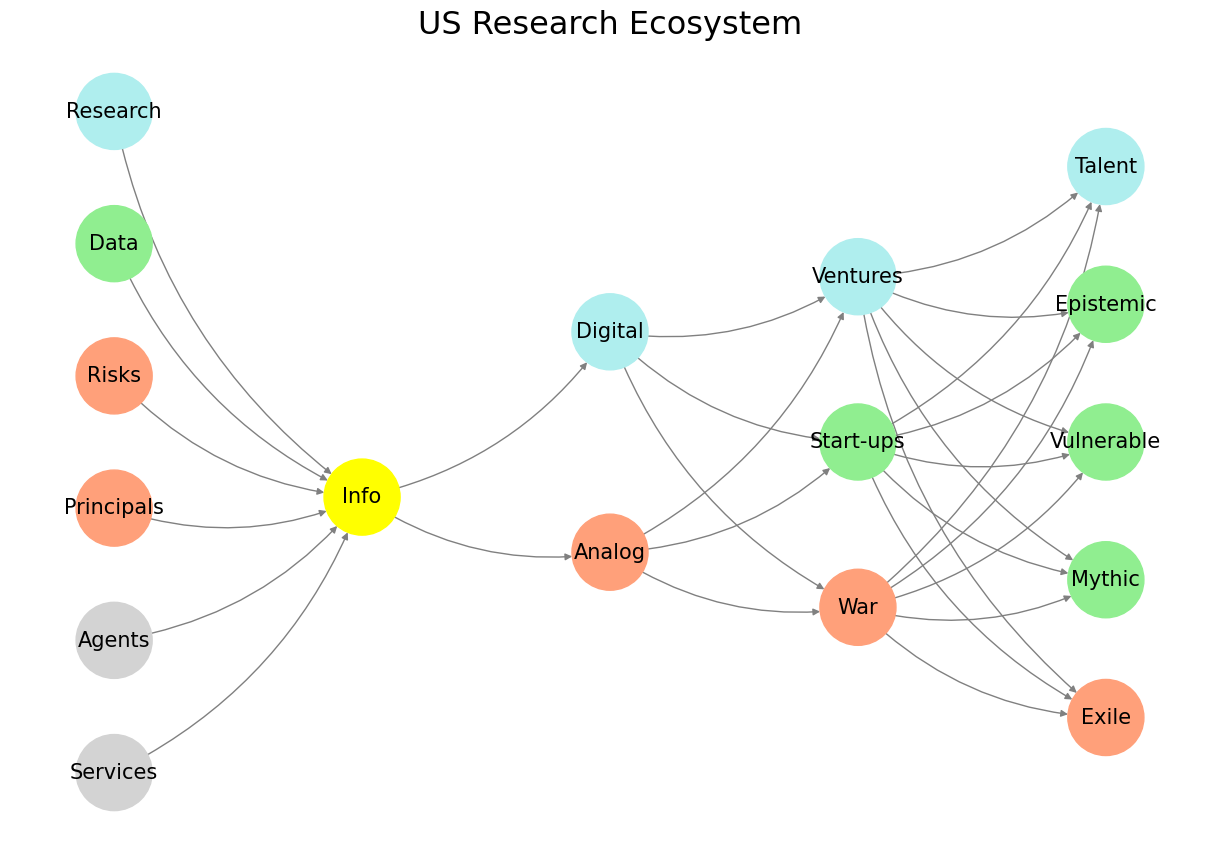

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network fractal
def define_layers():
    return {
        'Suis': ['Services', 'Agents', 'Principals', 'Risks', 'Data', 'Research', ], # Static
        'Voir': ['Info'],  
        'Choisis': ['Analog', 'Digital'],  
        'Deviens': ['War', 'Start-ups', 'Ventures'],  
        "M'èléve": ['Exile', 'Mythic',  'Vulnerable', 'Epistemic', 'Talent']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = { # Dynamic
        'yellow': ['Info'],  
        'paleturquoise': ['Research', 'Digital', 'Ventures', 'Talent'],  
        'lightgreen': ['Data', 'Start-ups', 'Mythic', 'Epistemic', 'Vulnerable'],  
        'lightsalmon': [
            'Principals', 'Risks', 'Analog',  
            'War', 'Exile'
        ],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate positions for nodes
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))   

    # Add edges (automated for consecutive layers)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer, target_layer = layer_names[i], layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=15, connectionstyle="arc3,rad=0.2"
    )
    plt.title("US Research Ecosystem", fontsize=23)    
    # ✅ Save the actual image *after* drawing it
    plt.savefig("figures/us-research-ecosystem.jpeg", dpi=300, bbox_inches='tight')
    # plt.show()

# Run the visualization
visualize_nn()


   <div class="float-right" style="float:none;width:100%;margin-left:0;border:none;padding:0;background:none;">
        <a class="image-bubble layered-icon" href="figures/us-research-ecosystem.jpeg" target="_blank" title="Click to magnify">
        <div class="large-icon"></div>
        <div class="small-icon"></div>
        </a>

```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1
height: 1
name: us research ecosystem
---
_Perverse Academic Incentives_. Government agencies risk $200 billion in R&D per year. Start-ups [emerging](https://en.wikipedia.org/wiki/Analog_signal) from this R&D draw in almost dollar-for-dollar venture capital investments. Most technological advancements scale-up the most promising of these efforts into peace-time, war-time, and money-time products and implements. But if we turn to **infrastructure**: no one's funding you to build infrastructure. NIH doesn’t give R01s for epistemic elegance. They want data, statistical significance, and a manuscript in NEJM. But MyST shines not in raw data—it excels at narrative explanation, cross-domain integration, reproducibility, and transparency. Until reproducibility gets financial incentives, MyST & `.ipynb` won’t have institutional traction.
```

   </div>  
</div>  


As far as the rest of life with its so-called "experiences" is concerned, which of us has even sufficient serious interest? or sufficient time? In our dealings with such points of life, we are, I fear, never properly to the point; to be precise, our heart is not there, and certainly not our ear. Rather like one who, delighting in a divine distraction, or sunken in the seas of his own soul, in whose ear the clock has just thundered with all its force its twelve strokes of noon, suddenly wakes up, and asks himself, "What has in point of fact just struck?" so do we at times rub afterwards, as it were, our[Pg 2] puzzled ears, and ask in complete astonishment and complete embarrassment, "Through what have we in point of fact just lived?" further, "Who are we in point of fact?" and count, after they have struck, as I have explained, all the twelve throbbing beats of the clock of our experience, of our life, of our being—ah!—and count wrong in the endeavour. Of necessity we remain strangers to ourselves, we understand ourselves not, in ourselves we are bound to be mistaken, for of us holds good to all eternity the motto, "Each one is the farthest away from himself"—as far as ourselves are concerned we are not "knowers."

2.

My thoughts concerning the genealogy of our moral prejudices—for they constitute the issue in this polemic—have their first, bald, and provisional expression in that collection of aphorisms entitled Human, all-too-Human, a Book for Free Minds, the writing of which was begun in Sorrento, during a winter which allowed me to gaze over the broad and dangerous territory through which my mind had up to that time wandered. This took place in the winter of 1876-77; the thoughts themselves are older. They were in their substance already the same thoughts which I take up again in the following treatises:—we hope that they have derived benefit from the long interval, that they have grown riper, clearer, stronger, more complete. The fact, however, that I still cling to them even[Pg 3] now, that in the meanwhile they have always held faster by each other, have, in fact, grown out of their original shape and into each other, all this strengthens in my mind the joyous confidence that they must have been originally neither separate disconnected capricious nor sporadic phenomena, but have sprung from a common root, from a fundamental "fiat" of knowledge, whose empire reached to the soul's depth, and that ever grew more definite in its voice, and more definite in its demands. That is the only state of affairs that is proper in the case of a philosopher.

We have no right to be "disconnected"; we must neither err "disconnectedly" nor strike the truth "disconnectedly." Rather with the necessity with which a tree bears its fruit, so do our thoughts, our values, our Yes's and No's and If's and Whether's, grow connected and interrelated, mutual witnesses of one will, one health, one kingdom, one sun—as to whether they are to your taste, these fruits of ours?—But what matters that to the trees? What matters that to us, us the philosophers?

3.

Owing to a scrupulosity peculiar to myself, which I confess reluctantly,—it concerns indeed morality,—a scrupulosity, which manifests itself in my life at such an early period, with so much spontaneity, with so chronic a persistence and so keen an opposition to environment, epoch,[Pg 4] precedent, and ancestry that I should have been almost entitled to style it my "â priori"—my curiosity and my suspicion felt themselves betimes bound to halt at the question, of what in point of actual fact was the origin of our "Good" and of our "Evil." Indeed, at the boyish age of thirteen the problem of the origin of Evil already haunted me: at an age "when games and God divide one's heart," I devoted to that problem my first childish attempt at the literary game, my first philosophic essay—and as regards my infantile solution of the problem, well, I gave quite properly the honour to God, and made him the father of evil. 

<div class="float-frame float-right">
    <!-- Primary Image Anchor -->
    <a href="https://upload.wikimedia.org/wikipedia/commons/c/c5/Peacock_Plumage.jpg" target="_blank">
        <img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/Peacock_Plumage.jpg" alt="Paranoid Mythology">
    </a>
    <!-- Symbolic Overlay -->
    <a class="image-bubble layered-icon" href="https://upload.wikimedia.org/wikipedia/commons/c/c5/Peacock_Plumage.jpg" target="_blank" title="Click to magnify">
        <div class="large-icon"></div>
        <div class="small-icon"></div>
    </a>
 <!-- Epistemic Marker (MyST Figure Directive) -->
 
```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1
height: 1
name: figures/autism
---
_Digital vs. Analog_. Non-trivial question. One emergent phenomenon of this binary is a start-up brand called MAGA. And several emergent phenomena including the Kennedy's, autism, and more. Study the neural net above to see if you might deduce some specifics from its general riff. But one thing is for sure: start-ups are their boosters are very selective about the data they quote!
```

</div>


Did my own "â priori" demand that precise solution from me? that new, immoral, or at least "amoral" "â priori" and that "categorical imperative" which was its voice (but oh! how hostile to the Kantian article, and how pregnant with problems!), to which since then I have given more and more attention, and indeed what is more than attention. Fortunately I soon learned to separate theological from moral prejudices, and I gave up looking for a supernatural origin of evil. A certain amount of historical and philological education, to say nothing of an innate faculty of psychological discrimination par excellence succeeded in transforming almost immediately my original problem into the following one:—Under what conditions did Man invent for himself those judgments of values, "Good" and "Evil"? And what intrinsic value do they possess in themselves? Have they up to the present hindered or advanced[Pg 5] human well-being? Are they a symptom of the distress, impoverishment, and degeneration of Human Life? Or, conversely, is it in them that is manifested the fulness, the strength, and the will of Life, its courage, its self-confidence, its future? On this point I found and hazarded in my mind the most diverse answers, I established distinctions in periods, peoples, and castes, I became a specialist in my problem, and from my answers grew new questions, new investigations, new conjectures, new probabilities; until at last I had a land of my own and a soil of my own, a whole secret world growing and flowering, like hidden gardens of whose existence no one could have an inkling—oh, how happy are we, we finders of knowledge, provided that we know how to keep silent sufficiently long.

4.

My first impulse to publish some of my hypotheses concerning the origin of morality I owe to a clear, well-written, and even precocious little book, in which a perverse and vicious kind of moral philosophy (your real English kind) was definitely presented to me for the first time; and this attracted me—with that magnetic attraction, inherent in that which is diametrically opposed and antithetical to one's own ideas. The title of the book was The Origin of the Moral Emotions; its author, Dr. Paul Rée; the year of its appearance, 1877. I may almost say that I have never read[Pg 6] anything in which every single dogma and conclusion has called forth from me so emphatic a negation as did that book; albeit a negation tainted by either pique or intolerance. I referred accordingly both in season and out of season in the previous works, at which I was then working, to the arguments of that book, not to refute them—for what have I got to do with mere refutations but substituting, as is natural to a positive mind, for an improbable theory one which is more probable, and occasionally no doubt, for one philosophic error, another. In that early period I gave, as I have said, the first public expression to those theories of origin to which these essays are devoted, but with a clumsiness which I was the last to conceal from myself, for I was as yet cramped, being still without a special language for these special subjects, still frequently liable to relapse and to vacillation. To go into details, compare what I say in Human, all-too-Human, part i., about the parallel early history of Good and Evil, Aph. 45 (namely, their origin from the castes of the aristocrats and the slaves); similarly, Aph. 136 et seq., concerning the birth and value of ascetic morality; similarly, Aphs. 96, 99, vol. ii., Aph. 89, concerning the Morality of Custom, that far older and more original kind of morality which is toto cœlo different from the altruistic ethics (in which Dr. Rée, like all the English moral philosophers, sees the ethical "Thing-in-itself"); finally, Aph. 92. Similarly, Aph. 26 in Human, all-too-Human, part ii., and Aph. 112, the Dawn of Day, concerning the origin of Justice as a balance[Pg 7] between persons of approximately equal power (equilibrium as the hypothesis of all contract, consequently of all law); similarly, concerning the origin of Punishment, Human, all-too-Human, part ii., Aphs. 22, 23, in regard to which the deterrent object is neither essential nor original (as Dr. Rée thinks:—rather is it that this object is only imported, under certain definite conditions, and always as something extra and additional).

---

Nietzsche's poignant letter to Franz Overbeck dated November 14, 1881. In it, Nietzsche employs the metaphor of life as a boat adrift at sea, emphasizing the inevitability of capsizing:

> My dear friend, what is this our life? A boat that swims in the sea, and all one knows for certain about it is that one day it will capsize. Here we are, two good old boats that have been faithful neighbors, and above all your hand has done its best to keep me from 'capsizing'! Let us then continue our voyage—each for the other's sake, for a long time yet, a long time! We should miss each other so much! Tolerably calm seas and good winds and above all sun—what I wish for myself, I wish for you, too, and am sorry that my gratitude can find expression only in such a wish and has no influence at all on wind or weather.

This letter stands out as one of Nietzsche's most heartfelt correspondences. The imagery of two aging boats navigating the unpredictable sea of life underscores the deep bond between Nietzsche and Overbeck. It's a candid acknowledgment of life's uncertainties and the solace found in enduring friendships. Nietzsche's appreciation for Overbeck's unwavering support is palpable, making this letter a touching testament to their profound connection. 

---

5.

In reality I had set my heart at that time on something much more important than the nature of the theories of myself or others concerning the origin of morality (or, more precisely, the real function from my view of these theories was to point an end to which they were one among many means). The issue for me was the value of morality, and on that subject I had to place myself in a state of abstraction, in which I was almost alone with my great teacher Schopenhauer, to whom that book, with all its passion and inherent contradiction (for that book also was a polemic), turned for present help as though he were still alive. The issue was, strangely enough, the value of the "un-egoistic" instincts, the instincts of pity, self-denial, and self-sacrifice which Schopenhauer had so persistently painted in golden colours, deified and etherealised, that eventually they appeared to him, as it were, high and dry, as "intrinsic values in themselves," on the strength of which[Pg 8] he uttered both to Life and to himself his own negation. But against these very instincts there voiced itself in my soul a more and more fundamental mistrust, a scepticism that dug ever deeper and deeper: and in this very instinct I saw the great danger of mankind, its most sublime temptation and seduction—seduction to what? to nothingness?—in these very instincts I saw the beginning of the end, stability, the exhaustion that gazes backwards, the will turning against Life, the last illness announcing itself with its own mincing melancholy: I realised that the morality of pity which spread wider and wider, and whose grip infected even philosophers with its disease, was the most sinister symptom of our modern European civilisation; I realised that it was the route along which that civilisation slid on its way to—a new Buddhism?—a European Buddhism?—Nihilism? This exaggerated estimation in which modern philosophers have held pity, is quite a new phenomenon: up to that time philosophers were absolutely unanimous as to the worthlessness of pity. I need only mention Plato, Spinoza, La Rochefoucauld, and Kant—four minds as mutually different as is possible, but united on one point; their contempt of pity.

6.

This problem of the value of pity and of the pity-morality (I am an opponent of the modern infamous emasculation of our emotions) seems at the first blush a mere isolated problem, a note of[Pg 9] interrogation for itself; he, however, who once halts at this problem, and learns how to put questions, will experience what I experienced:—a new and immense vista unfolds itself before him, a sense of potentiality seizes him like a vertigo, every species of doubt, mistrust, and fear springs up, the belief in morality, nay, in all morality, totters,—finally a new demand voices itself. Let us speak out this new demand: we need a critique of moral values, the value of these values is for the first time to be called into question—and for this purpose a knowledge is necessary of the conditions and circumstances out of which these values grew, and under which they experienced their evolution and their distortion (morality as a result, as a symptom, as a mask, as Tartuffism, as disease, as a misunderstanding; but also morality as a cause, as a remedy, as a stimulant, as a fetter, as a drug), especially as such a knowledge has neither existed up to the present time nor is even now generally desired. The value of these "values" was taken for granted as an indisputable fact, which was beyond all question. No one has, up to the present, exhibited the faintest doubt or hesitation in judging the "good man" to be of a higher value than the "evil man," of a higher value with regard specifically to human progress, utility, and prosperity generally, not forgetting the future. What? Suppose the converse were the truth! What? Suppose there lurked in the "good man" a symptom of retrogression, such as a danger, a temptation, a poison, a narcotic, by means of which the present battened on the future! More[Pg 10] comfortable and less risky perhaps than its opposite, but also pettier, meaner! So that morality would really be saddled with the guilt, if the maximum potentiality of the power and splendour of the human species were never to be attained? So that really morality would be the danger of dangers?

7.

Enough, that after this vista had disclosed itself to me, I myself had reason to search for learned, bold, and industrious colleagues (I am doing it even to this very day). It means traversing with new clamorous questions, and at the same time with new eyes, the immense, distant, and completely unexplored land of morality—of a morality which has actually existed and been actually lived! and is this not practically equivalent to first discovering that land? If, in this context, I thought, amongst others, of the aforesaid Dr. Rée, I did so because I had no doubt that from the very nature of his questions he would be compelled to have recourse to a truer method, in order to obtain his answers. Have I deceived myself on that score? I wished at all events to give a better direction of vision to an eye of such keenness, and such impartiality. I wished to direct him to the real history of morality, and to warn him, while there was yet time, against a world of English theories that culminated in the blue vacuum of heaven. Other colours, of course, rise immediately to one's mind[Pg 11] as being a hundred times more potent than blue for a genealogy of morals:—for instance, grey, by which I mean authentic facts capable of definite proof and having actually existed, or, to put it shortly, the whole of that long hieroglyphic script (which is so hard to decipher) about the past history of human morals. This script was unknown to Dr. Rée; but he had read Darwin:—and so in his philosophy the Darwinian beast and that pink of modernity, the demure weakling and dilettante, who "bites no longer," shake hands politely in a fashion that is at least instructive, the latter exhibiting a certain facial expression of refined and good-humoured indolence, tinged with a touch of pessimism and exhaustion; as if it really did not pay to take all these things—I mean moral problems—so seriously. I, on the other hand, think that there are no subjects which pay better for being taken seriously; part of this payment is, that perhaps eventually they admit of being taken gaily. This gaiety indeed, or, to use my own language, this joyful wisdom, is a payment; a payment for a protracted, brave, laborious, and burrowing seriousness, which, it goes without saying, is the attribute of but a few. But on that day on which we say from the fullness of our hearts, "Forward! our old morality too is fit material for Comedy," we shall have discovered a new plot, and a new possibility for the Dionysian drama entitled The Soul's Fate—and he will speedily utilise it, one can wager safely, he, the great ancient eternal dramatist of the comedy of our existence.


8.

If this writing be obscure to any individual, and jar on his ears, I do not think that it is necessarily I who am to blame. It is clear enough, on the hypothesis which I presuppose, namely, that the reader has first read my previous writings and has not grudged them a certain amount of trouble: it is not, indeed, a simple matter to get really at their essence. Take, for instance, my Zarathustra; I allow no one to pass muster as knowing that book, unless every single word therein has at some time wrought in him a profound wound, and at some time exercised on him a profound enchantment: then and not till then can he enjoy the privilege of participating reverently in the halcyon element, from which that work is born, in its sunny brilliance, its distance, its spaciousness, its certainty. In other cases the aphoristic form produces difficulty, but this is only because this form is treated too casually. An aphorism properly coined and cast into its final mould is far from being "deciphered" as soon as it has been read; on the contrary, it is then that it first requires to be expounded—of course for that purpose an art of exposition is necessary. The third essay in this book provides an example of what is offered, of what in such cases I call exposition: an aphorism is prefixed to that essay, the essay itself is its commentary. Certainly one quality which nowadays has been best forgotten—and that is why it will take some time yet for my writings[Pg 13] to become readable—is essential in order to practise reading as an art—a quality for the exercise of which it is necessary to be a cow, and under no circumstances a modern man!— rumination.

Sils-Maria, Upper Engadine,
July 1887.


---

FIRST ESSAY.
"GOOD AND EVIL," "GOOD AND BAD."
1.

Those English psychologists, who up to the present are the only philosophers who are to be thanked for any endeavour to get as far as a history of the origin of morality—these men, I say, offer us in their own personalities no paltry problem;—they even have, if I am to be quite frank about it, in their capacity of living riddles, an advantage over their books—they themselves are interesting! These English psychologists—what do they really mean? We always find them voluntarily or involuntarily at the same task of pushing to the front the partie honteuse of our inner world, and looking for the efficient, governing, and decisive principle in that precise quarter where the intellectual self-respect of the race would be the most reluctant to find it (for example, in the vis inertiæ of habit, or in forgetfulness, or in a blind and fortuitous mechanism and association of ideas, or in some factor that is purely passive, reflex, molecular, or fundamentally stupid)—what is the real motive power which always impels these psychologists in precisely this direction? Is it an instinct for human disparagement somewhat sinister, vulgar, and malignant, or perhaps incomprehensible even to itself? or perhaps a touch of pessimistic jealousy, the mistrust of disillusioned idealists who have become gloomy,[Pg 18] poisoned, and bitter? or a petty subconscious enmity and rancour against Christianity (and Plato), that has conceivably never crossed the threshold of consciousness? or just a vicious taste for those elements of life which are bizarre, painfully paradoxical, mystical, and illogical? or, as a final alternative, a dash of each of these motives—a little vulgarity, a little gloominess, a little anti-Christianity, a little craving for the necessary piquancy?

But I am told that it is simply a case of old frigid and tedious frogs crawling and hopping around men and inside men, as if they were as thoroughly at home there, as they would be in a swamp.

I am opposed to this statement, nay, I do not believe it; and if, in the impossibility of knowledge, one is permitted to wish, so do I wish from my heart that just the converse metaphor should apply, and that these analysts with their psychological microscopes should be, at bottom, brave, proud, and magnanimous animals who know how to bridle both their hearts and their smarts, and have specifically trained themselves to sacrifice what is desirable to what is true, any truth in fact, even the simple, bitter, ugly, repulsive, unchristian, and immoral truths—for there are truths of that description.

2.

All honour, then, to the noble spirits who would fain dominate these historians of morality. But it is certainly a pity that they lack the historical[Pg 19] sense itself, that they themselves are quite deserted by all the beneficent spirits of history. The whole train of their thought runs, as was always the way of old-fashioned philosophers, on thoroughly unhistorical lines: there is no doubt on this point. The crass ineptitude of their genealogy of morals is immediately apparent when the question arises of ascertaining the origin of the idea and judgment of "good." "Man had originally," so speaks their decree, "praised and called 'good' altruistic acts from the standpoint of those on whom they were conferred, that is, those to whom they were useful; subsequently the origin of this praise was forgotten, and altruistic acts, simply because, as a sheer matter of habit, they were praised as good, came also to be felt as good—as though they contained in themselves some intrinsic goodness." The thing is obvious:—this initial derivation contains already all the typical and idiosyncratic traits of the English psychologists—we have "utility," "forgetting," "habit," and finally "error," the whole assemblage forming the basis of a system of values, on which the higher man has up to the present prided himself as though it were a kind of privilege of man in general. This pride must be brought low, this system of values must lose its values: is that attained?

Now the first argument that comes ready to my hand is that the real homestead of the concept "good" is sought and located in the wrong place: the judgment "good" did not originate among those to whom goodness was shown. Much[Pg 20] rather has it been the good themselves, that is, the aristocratic, the powerful, the high-stationed, the high-minded, who have felt that they themselves were good, and that their actions were good, that is to say of the first order, in contradistinction to all the low, the low-minded, the vulgar, and the plebeian. It was out of this pathos of distance that they first arrogated the right to create values for their own profit, and to coin the names of such values: what had they to do with utility? The standpoint of utility is as alien and as inapplicable as it could possibly be, when we have to deal with so volcanic an effervescence of supreme values, creating and demarcating as they do a hierarchy within themselves: it is at this juncture that one arrives at an appreciation of the contrast to that tepid temperature, which is the presupposition on which every combination of worldly wisdom and every calculation of practical expediency is always based—and not for one occasional, not for one exceptional instance, but chronically. The pathos of nobility and distance, as I have said, the chronic and despotic esprit de corps and fundamental instinct of a higher dominant race coming into association with a meaner race, an "under race," this is the origin of the antithesis of good and bad.

(The masters' right of giving names goes so far that it is permissible to look upon language itself as the expression of the power of the masters: they say "this is that, and that," they seal finally every object and every event with a[Pg 21] sound, and thereby at the same time take possession of it.) It is because of this origin that the word "good" is far from having any necessary connection with altruistic acts, in accordance with the superstitious belief of these moral philosophers. On the contrary, it is on the occasion of the decay of aristocratic values, that the antitheses between "egoistic" and "altruistic" presses more and more heavily on the human conscience—it is, to use my own language, the herd instinct which finds in this antithesis an expression in many ways. And even then it takes a considerable time for this instinct to become sufficiently dominant, for the valuation to be inextricably dependent on this antithesis (as is the case in contemporary Europe); for to-day that prejudice is predominant, which, acting even now with all the intensity of an obsession and brain disease, holds that "moral," "altruistic," and "désintéressé" are concepts of equal value.

3.

In the second place, quite apart from the fact that this hypothesis as to the genesis of the value "good" cannot be historically upheld, it suffers from an inherent psychological contradiction. The utility of altruistic conduct has presumably been the origin of its being praised, and this origin has become forgotten:—But in what conceivable way is this forgetting possible! Has perchance the utility of such conduct ceased at some given moment? The contrary is the case. This utility has rather been experienced every day[Pg 22] at all times, and is consequently a feature that obtains a new and regular emphasis with every fresh day; it follows that, so far from vanishing from the consciousness, so far indeed from being forgotten, it must necessarily become impressed on the consciousness with ever-increasing distinctness. How much more logical is that contrary theory (it is not the truer for that) which is represented, for instance, by Herbert Spencer, who places the concept "good" as essentially similar to the concept "useful," "purposive," so that in the judgments "good" and "bad" mankind is simply summarising and investing with a sanction its unforgotten and unforgettable experiences concerning the "useful-purposive" and the "mischievous-non-purposive." According to this theory, "good" is the attribute of that which has previously shown itself useful; and so is able to claim to be considered "valuable in the highest degree," "valuable in itself." This method of explanation is also, as I have said, wrong, but at any rate the explanation itself is coherent, and psychologically tenable.

4.

The guide-post which first put me on the right track was this question—what is the true etymological significance of the various symbols for the idea "good" which have been coined in the various languages? I then found that they all led back to the same evolution of the same idea—that everywhere "aristocrat," "noble" (in the social sense), is the root idea, out of which have necessarily developed[Pg 23] "good" in the sense of "with aristocratic soul," "noble," in the sense of "with a soul of high calibre," "with a privileged soul"—a development which invariably runs parallel with that other evolution by which "vulgar," "plebeian," "low," are made to change finally into "bad." The most eloquent proof of this last contention is the German word "schlecht" itself: this word is identical with "schlicht"—(compare "schlechtweg" and "schlechterdings")—which, originally and as yet without any sinister innuendo, simply denoted the plebeian man in contrast to the aristocratic man. It is at the sufficiently late period of the Thirty Years' War that this sense becomes changed to the sense now current. From the standpoint of the Genealogy of Morals this discovery seems to be substantial: the lateness of it is to be attributed to the retarding influence exercised in the modern world by democratic prejudice in the sphere of all questions of origin. This extends, as will shortly be shown, even to the province of natural science and physiology, which, prima facie is the most objective. The extent of the mischief which is caused by this prejudice (once it is free of all trammels except those of its own malice), particularly to Ethics and History, is shown by the notorious case of Buckle: it was in Buckle that that plebeianism of the modern spirit, which is of English origin, broke out once again from its malignant soil with all the violence of a slimy volcano, and with that salted, rampant, and vulgar eloquence with which up to the present time all volcanoes have spoken.

5.

With regard to our problem, which can justly be called an intimate problem, and which elects to appeal to only a limited number of ears: it is of no small interest to ascertain that in those words and roots which denote "good" we catch glimpses of that arch-trait, on the strength of which the aristocrats feel themselves to be beings of a higher order than their fellows. Indeed, they call themselves in perhaps the most frequent instances simply after their superiority in power (e.g. "the powerful," "the lords," "the commanders"), or after the most obvious sign of their superiority, as for example "the rich," "the possessors" (that is the meaning of arya; and the Iranian and Slav languages correspond). But they also call themselves after some characteristic idiosyncrasy; and this is the case which now concerns us. They name themselves, for instance, "the truthful": this is first done by the Greek nobility whose mouthpiece is found in Theognis, the Megarian poet. The word ἐσθλος, which is coined for the purpose, signifies etymologically "one who is," who has reality, who is real, who is true; and then with a subjective twist, the "true," as the "truthful": at this stage in the evolution of the idea, it becomes the motto and party cry of the nobility, and quite completes the transition to the meaning "noble," so as to place outside the pale the lying, vulgar man, as Theognis conceives and portrays him—till finally the word after the decay of the nobility is left to delineate[Pg 25] psychological noblesse, and becomes as it were ripe and mellow. In the word κακός as in δειλός (the plebeian in contrast to the ἀγαθός) the cowardice is emphasised. This affords perhaps an inkling on what lines the etymological origin of the very ambiguous ἀγαθός is to be investigated. In the Latin malus (which I place side by side with μέλας) the vulgar man can be distinguished as the dark-coloured, and above all as the black-haired ("hic niger est"), as the pre-Aryan inhabitants of the Italian soil, whose complexion formed the clearest feature of distinction from the dominant blondes, namely, the Aryan conquering race:—at any rate Gaelic has afforded me the exact analogue—Fin (for instance, in the name Fin-Gal), the distinctive word of the nobility, finally—good, noble, clean, but originally the blonde-haired man in contrast to the dark black-haired aboriginals. The Celts, if I may make a parenthetic statement, were throughout a blonde race; and it is wrong to connect, as Virchow still connects, those traces of an essentially dark-haired population which are to be seen on the more elaborate ethnographical maps of Germany with any Celtic ancestry or with any admixture of Celtic blood: in this context it is rather the pre-Aryan population of Germany which surges up to these districts. (The same is true substantially of the whole of Europe: in point of fact, the subject race has finally again obtained the upper hand, in complexion and the shortness of the skull, and perhaps in the intellectual and social qualities. Who can guarantee that modern democracy, still more[Pg 26] modern anarchy, and indeed that tendency to the "Commune," the most primitive form of society, which is now common to all the Socialists in Europe, does not in its real essence signify a monstrous reversion—and that the conquering and master race—the Aryan race, is not also becoming inferior physiologically?) I believe that I can explain the Latin bonus as the "warrior": my hypothesis is that I am right in deriving bonus from an older duonus (compare bellum = duellum = duen-lum, in which the word duonus appears to me to be contained). Bonus accordingly as the man of discord, of variance, "entzweiung" (duo), as the warrior: one sees what in ancient Rome "the good" meant for a man. Must not our actual German word gut mean "the godlike, the man of godlike race"? and be identical with the national name (originally the nobles' name) of the Goths?

The grounds for this supposition do not appertain to this work.

6.

Above all, there is no exception (though there are opportunities for exceptions) to this rule, that the idea of political superiority always resolves itself into the idea of psychological superiority, in those cases where the highest caste is at the same time the priestly caste, and in accordance with its general characteristics confers on itself the privilege of a title which alludes specifically to its priestly function. It is in these cases, for instance, that "clean" and "unclean" confront[Pg 27] each other for the first time as badges of class distinction; here again there develops a "good" and a "bad," in a sense which has ceased to be merely social. Moreover, care should be taken not to take these ideas of "clean" and "unclean" too seriously, too broadly, or too symbolically: all the ideas of ancient man have, on the contrary, got to be understood in their initial stages, in a sense which is, to an almost inconceivable extent, crude, coarse, physical, and narrow, and above all essentially unsymbolical. The "clean man" is originally only a man who washes himself, who abstains from certain foods which are conducive to skin diseases, who does not sleep with the unclean women of the lower classes, who has a horror of blood—not more, not much more! On the other hand, the very nature of a priestly aristocracy shows the reasons why just at such an early juncture there should ensue a really dangerous sharpening and intensification of opposed values: it is, in fact, through these opposed values that gulfs are cleft in the social plane, which a veritable Achilles of free thought would shudder to cross. There is from the outset a certain diseased taint in such sacerdotal aristocracies, and in the habits which prevail in such societies—habits which, averse as they are to action, constitute a compound of introspection and explosive emotionalism, as a result of which there appears that introspective morbidity and neurasthenia, which adheres almost inevitably to all priests at all times: with regard, however, to the remedy which they themselves have invented[Pg 28] for this disease—the philosopher has no option but to state, that it has proved itself in its effects a hundred times more dangerous than the disease, from which it should have been the deliverer. Humanity itself is still diseased from the effects of the naïvetés of this priestly cure. Take, for instance, certain kinds of diet (abstention from flesh), fasts, sexual continence, flight into the wilderness (a kind of Weir-Mitchell isolation, though of course without that system of excessive feeding and fattening which is the most efficient antidote to all the hysteria of the ascetic ideal); consider too the whole metaphysic of the priests, with its war on the senses, its enervation, its hair-splitting; consider its self-hypnotism on the fakir and Brahman principles (it uses Brahman as a glass disc and obsession), and that climax which we can understand only too well of an unusual satiety with its panacea of nothingness (or God:—the demand for a unio mystica with God is the demand of the Buddhist for nothingness, Nirvana—and nothing else!). In sacerdotal societies every element is on a more dangerous scale, not merely cures and remedies, but also pride, revenge, cunning, exaltation, love, ambition, virtue, morbidity:—further, it can fairly be stated that it is on the soil of this essentially dangerous form of human society, the sacerdotal form, that man really becomes for the first time an interesting animal, that it is in this form that the soul of man has in a higher sense attained depths and become evil—and those are the two fundamental forms of the superiority which up[Pg 29] to the present man has exhibited over every other animal.

7.

The reader will have already surmised with what ease the priestly mode of valuation can branch off from the knightly aristocratic mode, and then develop into the very antithesis of the latter: special impetus is given to this opposition, by every occasion when the castes of the priests and warriors confront each other with mutual jealousy and cannot agree over the prize. The knightly-aristocratic "values" are based on a careful cult of the physical, on a flowering, rich, and even effervescing healthiness, that goes considerably beyond what is necessary for maintaining life, on war, adventure, the chase, the dance, the tourney—on everything, in fact, which is contained in strong, free, and joyous action. The priestly-aristocratic mode of valuation is—we have seen—based on other hypotheses: it is bad enough for this class when it is a question of war! Yet the priests are, as is notorious, the worst enemies—why? Because they are the weakest. Their weakness causes their hate to expand into a monstrous and sinister shape, a shape which is most crafty and most poisonous. The really great haters in the history of the world have always been priests, who are also the cleverest haters—in comparison with the cleverness of priestly revenge, every other piece of cleverness is practically negligible. Human history would be too fatuous for anything were it not for the cleverness imported into it by the[Pg 30] weak—take at once the most important instance. All the world's efforts against the "aristocrats," the "mighty," the "masters," the "holders of power," are negligible by comparison with what has been accomplished against those classes by the Jews—the Jews, that priestly nation which eventually realised that the one method of effecting satisfaction on its enemies and tyrants was by means of a radical transvaluation of values, which was at the same time an act of the cleverest revenge. Yet the method was only appropriate to a nation of priests, to a nation of the most jealously nursed priestly revengefulness. It was the Jews who, in opposition to the aristocratic equation (good = aristocratic = beautiful = happy = loved by the gods), dared with a terrifying logic to suggest the contrary equation, and indeed to maintain with the teeth of the most profound hatred (the hatred of weakness) this contrary equation, namely, "the wretched are alone the good; the poor, the weak, the lowly, are alone the good; the suffering, the needy, the sick, the loathsome, are the only ones who are pious, the only ones who are blessed, for them alone is salvation—but you, on the other hand, you aristocrats, you men of power, you are to all eternity the evil, the horrible, the covetous, the insatiate, the godless; eternally also shall you be the unblessed, the cursed, the damned!" We know who it was who reaped the heritage of this Jewish transvaluation. In the context of the monstrous and inordinately fateful initiative which the Jews have exhibited in connection with[Pg 31] this most fundamental of all declarations of war, I remember the passage which came to my pen on another occasion (Beyond Good and Evil, Aph. 195)—that it was, in fact, with the Jews that the revolt of the slaves begins in the sphere of morals; that revolt which has behind it a history of two millennia, and which at the present day has only moved out of our sight, because it—has achieved victory.

8.

But you understand this not? You have no eyes for a force which has taken two thousand years to achieve victory?—There is nothing wonderful in this: all lengthy processes are hard to see and to realise. But this is what took place: from the trunk of that tree of revenge and hate, Jewish hate,—that most profound and sublime hate, which creates ideals and changes old values to new creations, the like of which has never been on earth,—there grew a phenomenon which was equally incomparable, a new love, the most profound and sublime of all kinds of love;—and from what other trunk could it have grown? But beware of supposing that this love has soared on its upward growth, as in any way a real negation of that thirst for revenge, as an antithesis to the Jewish hate! No, the contrary is the truth! This love grew out of that hate, as its crown, as its triumphant crown, circling wider and wider amid the clarity and fulness of the sun, and pursuing in the very kingdom of light and height its goal of hatred, its victory, its spoil, its strategy,[Pg 32] with the same intensity with which the roots of that tree of hate sank into everything which was deep and evil with increasing stability and increasing desire. This Jesus of Nazareth, the incarnate gospel of love, this "Redeemer" bringing salvation and victory to the poor, the sick, the sinful—was he not really temptation in its most sinister and irresistible form, temptation to take the tortuous path to those very Jewish values and those very Jewish ideals? Has not Israel really obtained the final goal of its sublime revenge, by the tortuous paths of this "Redeemer," for all that he might pose as Israel's adversary and Israel's destroyer? Is it not due to the black magic of a really great policy of revenge, of a far-seeing, burrowing revenge, both acting and calculating with slowness, that Israel himself must repudiate before all the world the actual instrument of his own revenge and nail it to the cross, so that all the world—that is, all the enemies of Israel—could nibble without suspicion at this very bait? Could, moreover, any human mind with all its elaborate ingenuity invent a bait that was more truly dangerous? Anything that was even equivalent in the power of its seductive, intoxicating, defiling, and corrupting influence to that symbol of the holy cross, to that awful paradox of a "god on the cross," to that mystery of the unthinkable, supreme, and utter horror of the self-crucifixion of a god for the salvation of man? It is at least certain that sub hoc signo Israel, with its revenge and transvaluation of all values, has up to the present always triumphed again over[Pg 33] all other ideals, over all more aristocratic ideals.

9.

"But why do you talk of nobler ideals? Let us submit to the facts; that the people have triumphed—or the slaves, or the populace, or the herd, or whatever name you care to give them—if this has happened through the Jews, so be it! In that case no nation ever had a greater mission in the world's history. The 'masters' have been done away with; the morality of the vulgar man has triumphed. This triumph may also be called a blood-poisoning (it has mutually fused the races)—I do not dispute it; but there is no doubt but that this intoxication has succeeded. The 'redemption' of the human race (that is, from the masters) is progressing swimmingly; everything is obviously becoming Judaised, or Christianised, or vulgarised (what is there in the words?). It seems impossible to stop the course of this poisoning through the whole body politic of mankind—but its tempo and pace may from the present time be slower, more delicate, quieter, more discreet—there is time enough. In view of this context has the Church nowadays any necessary purpose? has it, in fact, a right to live? Or could man get on without it? Quæritur. It seems that it fetters and retards this tendency, instead of accelerating it. Well, even that might be its utility. The Church certainly is a crude and boorish institution, that is repugnant to an intelligence with any pretence at delicacy, to a[Pg 34] really modern taste. Should it not at any rate learn to be somewhat more subtle? It alienates nowadays, more than it allures. Which of us would, forsooth, be a freethinker if there were no Church? It is the Church which repels us, not its poison—apart from the Church we like the poison." This is the epilogue of a freethinker to my discourse, of an honourable animal (as he has given abundant proof), and a democrat to boot; he had up to that time listened to me, and could not endure my silence, but for me, indeed, with regard to this topic there is much on which to be silent.

10.

The revolt of the slaves in morals begins in the very principle of resentment becoming creative and giving birth to values—a resentment experienced by creatures who, deprived as they are of the proper outlet of action, are forced to find their compensation in an imaginary revenge. While every aristocratic morality springs from a triumphant affirmation of its own demands, the slave morality says "no" from the very outset to what is "outside itself," "different from itself," and "not itself": and this "no" is its creative deed. This volte-face of the valuing standpoint—this inevitable gravitation to the objective instead of back to the subjective—is typical of "resentment": the slave-morality requires as the condition of its existence an external and objective world, to employ physiological terminology, it requires objective stimuli[Pg 35] to be capable of action at all—its action is fundamentally a reaction. The contrary is the case when we come to the aristocrat's system of values: it acts and grows spontaneously, it merely seeks its antithesis in order to pronounce a more grateful and exultant "yes" to its own self;—its negative conception, "low," "vulgar," "bad," is merely a pale late-born foil in comparison with its positive and fundamental conception (saturated as it is with life and passion), of "we aristocrats, we good ones, we beautiful ones, we happy ones."

When the aristocratic morality goes astray and commits sacrilege on reality, this is limited to that particular sphere with which it is not sufficiently acquainted—a sphere, in fact, from the real knowledge of which it disdainfully defends itself. It misjudges, in some cases, the sphere which it despises, the sphere of the common vulgar man and the low people: on the other hand, due weight should be given to the consideration that in any case the mood of contempt, of disdain, of superciliousness, even on the supposition that it falsely portrays the object of its contempt, will always be far removed from that degree of falsity which will always characterise the attacks—in effigy, of course—of the vindictive hatred and revengefulness of the weak in onslaughts on their enemies. In point of fact, there is in contempt too strong an admixture of nonchalance, of casualness, of boredom, of impatience, even of personal exultation, for it to be capable of distorting its victim into a real caricature or a real monstrosity. Attention again should be paid to the almost benevolent[Pg 36] nuances which, for instance, the Greek nobility imports into all the words by which it distinguishes the common people from itself; note how continuously a kind of pity, care, and consideration imparts its honeyed flavour, until at last almost all the words which are applied to the vulgar man survive finally as expressions for "unhappy," "worthy of pity" (compare δειλο, δείλαιος, πονηρός, μοχθηρός]; the latter two names really denoting the vulgar man as labour-slave and beast of burden)—and how, conversely, "bad," "low," "unhappy" have never ceased to ring in the Greek ear with a tone in which "unhappy" is the predominant note: this is a heritage of the old noble aristocratic morality, which remains true to itself even in contempt (let philologists remember the sense in which ὀιζυρός, ἄνολβος, τλήμων, δυστυχεῑν, ξυμφορά used to be employed). The "well-born" simply felt themselves the "happy"; they did not have to manufacture their happiness artificially through looking at their enemies, or in cases to talk and lie themselves into happiness (as is the custom with all resentful men); and similarly, complete men as they were, exuberant with strength, and consequently necessarily energetic, they were too wise to dissociate happiness from action—activity becomes in their minds necessarily counted as happiness (that is the etymology of εὖ πρἆττειν)—all in sharp contrast to the "happiness" of the weak and the oppressed, with their festering venom and malignity, among whom happiness appears essentially as a narcotic, a deadening, a quietude, a peace, a[Pg 37] "Sabbath," an enervation of the mind and relaxation of the limbs,—in short, a purely passive phenomenon. While the aristocratic man lived in confidence and openness with himself (γενναῐος, "nobleε-born," emphasises the nuance "sincere," and perhaps also "naïf"), the resentful man, on the other hand, is neither sincere nor naïf, nor honest and candid with himself. His soul squints; his mind loves hidden crannies, tortuous paths and back-doors, everything secret appeals to him as his world, his safety, his balm; he is past master in silence, in not forgetting, in waiting, in provisional self-depreciation and self-abasement. A race of such resentful men will of necessity eventually prove more prudent than any aristocratic race, it will honour prudence on quite a distinct scale, as, in fact, a paramount condition of existence, while prudence among aristocratic men is apt to be tinged with a delicate flavour of luxury and refinement; so among them it plays nothing like so integral a part as that complete certainty of function of the governing unconscious instincts, or as indeed a certain lack of prudence, such as a vehement and valiant charge, whether against danger or the enemy, or as those ecstatic bursts of rage, love, reverence, gratitude, by which at all times noble souls have recognised each other. When the resentment of the aristocratic man manifests itself, it fulfils and exhausts itself in an immediate reaction, and consequently instills no venom: on the other hand, it never manifests itself at all in countless instances, when in the case of the feeble and weak it would be inevitable. An[Pg 38] inability to take seriously for any length of time their enemies, their disasters, their misdeeds—that is the sign of the full strong natures who possess a superfluity of moulding plastic force, that heals completely and produces forgetfulness: a good example of this in the modern world is Mirabeau, who had no memory for any insults and meannesses which were practised on him, and who was only incapable of forgiving because he forgot. Such a man indeed shakes off with a shrug many a worm which would have buried itself in another; it is only in characters like these that we see the possibility (supposing, of course, that there is such a possibility in the world) of the real "love of one's enemies." What respect for his enemies is found, forsooth, in an aristocratic man—and such a reverence is already a bridge to love! He insists on having his enemy to himself as his distinction. He tolerates no other enemy but a man in whose character there is nothing to despise and much to honour! On the other hand, imagine the "enemy" as the resentful man conceives him—and it is here exactly that we see his work, his creativeness; he has conceived "the evil enemy," the "evil one," and indeed that is the root idea from which he now evolves as a contrasting and corresponding figure a "good one," himself—his very self!

11

The method of this man is quite contrary to that of the aristocratic man, who conceives the root idea "good" spontaneously and straight[Pg 39] away, that is to say, out of himself, and from that material then creates for himself a concept of "bad"! This "bad" of aristocratic origin and that "evil" out of the cauldron of unsatisfied hatred—the former an imitation, an "extra," an additional nuance; the latter, on the other hand, the original, the beginning, the essential act in the conception of a slave-morality—these two words "bad" and "evil," how great a difference do they mark, in spite of the fact that they have an identical contrary in the idea "good." But the idea "good" is not the same: much rather let the question be asked, "Who is really evil according to the meaning of the morality of resentment?" In all sternness let it be answered thus:—just the good man of the other morality, just the aristocrat, the powerful one, the one who rules, but who is distorted by the venomous eye of resentfulness, into a new colour, a new signification, a new appearance. This particular point we would be the last to deny: the man who learnt to know those "good" ones only as enemies, learnt at the same time not to know them only as "evil enemies" and the same men who inter pares were kept so rigorously in bounds through convention, respect, custom, and gratitude, though much more through mutual vigilance and jealousy inter pares, these men who in their relations with each other find so many new ways of manifesting consideration, self-control, delicacy, loyalty, pride, and friendship, these men are in reference to what is outside their circle (where the foreign element, a foreign country, begins), not much better than[Pg 40] beasts of prey, which have been let loose. They enjoy there freedom from all social control, they feel that in the wilderness they can give vent with impunity to that tension which is produced by enclosure and imprisonment in the peace of society, they revert to the innocence of the beast-of-prey conscience, like jubilant monsters, who perhaps come from a ghastly bout of murder, arson, rape, and torture, with bravado and a moral equanimity, as though merely some wild student's prank had been played, perfectly convinced that the poets have now an ample theme to sing and celebrate. It is impossible not to recognise at the core of all these aristocratic races the beast of prey; the magnificent blonde brute, avidly rampant for spoil and victory; this hidden core needed an outlet from time to time, the beast must get loose again, must return into the wilderness—the Roman, Arabic, German, and Japanese nobility, the Homeric heroes, the Scandinavian Vikings, are all alike in this need. It is the aristocratic races who have left the idea "Barbarian" on all the tracks in which they have marched; nay, a consciousness of this very barbarianism, and even a pride in it, manifests itself even in their highest civilisation (for example, when Pericles says to his Athenians in that celebrated funeral oration, "Our audacity has forced a way over every land and sea, rearing everywhere imperishable memorials of itself for good and for evil"). This audacity of aristocratic races, mad, absurd, and spasmodic as may be its expression; the incalculable and fantastic nature of their enterprises,[Pg 41]Pericles sets in special relief and glory the ᾽ραθυμία of the Athenians, their nonchalance and contempt for safety, body, life, and comfort, their awful joy and intense delight in all destruction, in all the ecstasies of victory and cruelty,—all these features become crystallised, for those who suffered thereby in the picture of the "barbarian," of the "evil enemy," perhaps of the "Goth" and of the "Vandal." The profound, icy mistrust which the German provokes, as soon as he arrives at power,—even at the present time,—is always still an aftermath of that inextinguishable horror with which for whole centuries Europe has regarded the wrath of the blonde Teuton beast (although between the old Germans and ourselves there exists scarcely a psychological, let alone a physical, relationship). I have once called attention to the embarrassment of Hesiod, when he conceived the series of social ages, and endeavoured to express them in gold, silver, and bronze. He could only dispose of the contradiction, with which he was confronted, by the Homeric world, an age magnificent indeed, but at the same time so awful and so violent, by making two ages out of one, which he henceforth placed one behind each other—first, the age of the heroes and demigods, as that world had remained in the memories of the aristocratic families, who found therein their own ancestors; secondly, the bronze age, as that corresponding age appeared to the descendants of the oppressed, spoiled, ill-treated, exiled, enslaved; namely, as an age of bronze, as I have said, hard, cold, terrible, without feelings and without conscience, crushing everything,[Pg 42] and bespattering everything with blood. Granted the truth of the theory now believed to be true, that the very essence of all civilisation is to train out of man, the beast of prey, a tame and civilised animal, a domesticated animal, it follows indubitably that we must regard as the real tools of civilisation all those instincts of reaction and resentment, by the help of which the aristocratic races, together with their ideals, were finally degraded and overpowered; though that has not yet come to be synonymous with saying that the bearers of those tools also represented the civilisation. It is rather the contrary that is not only probable—nay, it is palpable to-day; these bearers of vindictive instincts that have to be bottled up, these descendants of all European and non-European slavery, especially of the pre-Aryan population—these people, I say, represent the decline of humanity! These "tools of civilisation" are a disgrace to humanity, and constitute in reality more of an argument against civilisation, more of a reason why civilisation should be suspected. One may be perfectly justified in being always afraid of the blonde beast that lies at the core of all aristocratic races, and in being on one's guard: but who would not a hundred times prefer to be afraid, when one at the same time admires, than to be immune from fear, at the cost of being perpetually obsessed with the loathsome spectacle of the distorted, the dwarfed, the stunted, the envenomed? And is that not our fate? What produces to-day our repulsion towards "man"?—for we suffer from "man," there is no doubt[Pg 43] about it. It is not fear; it is rather that we have nothing more to fear from men; it is that the worm "man" is in the foreground and pullulates; it is that the "tame man," the wretched mediocre and unedifying creature, has learnt to consider himself a goal and a pinnacle, an inner meaning, an historic principle, a "higher man"; yes, it is that he has a certain right so to consider himself, in so far as he feels that in contrast to that excess of deformity, disease, exhaustion, and effeteness whose odour is beginning to pollute present-day Europe, he at any rate has achieved a relative success, he at any rate still says "yes" to life.

12.

I cannot refrain at this juncture from uttering a sigh and one last hope. What is it precisely which I find intolerable? That which I alone cannot get rid of, which makes me choke and faint? Bad air! bad air! That something misbegotten comes near me; that I must inhale the odour of the entrails of a misbegotten soul!—That excepted, what can one not endure in the way of need, privation, bad weather, sickness, toil, solitude? In point of fact, one manages to get over everything, born as one is to a burrowing and battling existence; one always returns once again to the light, one always lives again one's golden hour of victory—and then one stands as one was born, unbreakable, tense, ready for something more difficult, for something more distant, like a bow stretched but the tauter by every strain.[Pg 44] But from time to time do ye grant me—assuming that "beyond good and evil" there are goddesses who can grant—one glimpse, grant me but one glimpse only, of something perfect, fully realised, happy, mighty, triumphant, of something that still gives cause for fear! A glimpse of a man that justifies the existence of man, a glimpse of an incarnate human happiness that realises and redeems, for the sake of which one may hold fast to the belief in man! For the position is this: in the dwarfing and levelling of the European man lurks our greatest peril, for it is this outlook which fatigues—we see to-day nothing which wishes to be greater, we surmise that the process is always still backwards, still backwards towards something more attenuated, more inoffensive, more cunning, more comfortable, more mediocre, more indifferent, more Chinese, more Christian—man, there is no doubt about it, grows always "better" —the destiny of Europe lies even in this—that in losing the fear of man, we have also lost the hope in man, yea, the will to be man. The sight of man now fatigues.—What is present-day Nihilism if it is not that?—We are tired of man.

13.

But let us come back to it; the problem of another origin of the good—of the good, as the resentful man has thought it out—demands its solution. It is not surprising that the lambs should bear a grudge against the great birds of prey, but that is no reason for blaming the great birds of prey[Pg 45] for taking the little lambs. And when the lambs say among themselves, "These birds of prey are evil, and he who is as far removed from being a bird of prey, who is rather its opposite, a lamb,—is he not good?" then there is nothing to cavil at in the setting up of this ideal, though it may also be that the birds of prey will regard it a little sneeringly, and perchance say to themselves, "We bear no grudge against them, these good lambs, we even like them: nothing is tastier than a tender lamb." To require of strength that it should not express itself as strength, that it should not be a wish to overpower, a wish to overthrow, a wish to become master, a thirst for enemies and antagonisms and triumphs, is just as absurd as to require of weakness that it should express itself as strength. 

A quantum of force is just such a quantum of movement, will, action—rather it is nothing else than just those very phenomena of moving, willing, acting, and can only appear otherwise in the misleading errors of language (and the fundamental fallacies of reason which have become petrified therein), which understands, and understands wrongly, all working as conditioned by a worker, by a "subject." And just exactly as the people separate the lightning from its flash, and interpret the latter as a thing done, as the working of a subject which is called lightning, so also does the popular morality separate strength from the expression of strength, as though behind the strong man there existed some indifferent neutral substratum, which enjoyed a caprice and option as to whether or not it should[Pg 46] express strength. But there is no such substratum, there is no "being" behind doing, working, becoming; "the doer" is a mere appanage to the action. The action is everything. In point of fact, the people duplicate the doing, when they make the lightning lighten, that is a "doing-doing": they make the same phenomenon first a cause, and then, secondly, the effect of that cause. The scientists fail to improve matters when they say, "Force moves, force causes," and so on. Our whole science is still, in spite of all its coldness, of all its freedom from passion, a dupe of the tricks of language, and has never succeeded in getting rid of that superstitious changeling "the subject" (the atom, to give another instance, is such a changeling, just as the Kantian "Thing-in-itself"). What wonder, if the suppressed and stealthily simmering passions of revenge and hatred exploit for their own advantage this belief, and indeed hold no belief with a more steadfast enthusiasm than this—"that the strong has the option of being weak, and the bird of prey of being a lamb." Thereby do they win for themselves the right of attributing to the birds of prey the responsibility for being birds of prey: when the oppressed, down-trodden, and overpowered say to themselves with the vindictive guile of weakness, "Let us be otherwise than the evil, namely, good! and good is every one who does not oppress, who hurts no one, who does not attack, who does not pay back, who hands over revenge to God, who holds himself, as we do, in hiding; who goes out of the way of evil, and demands, in short, little[Pg 47] from life; like ourselves the patient, the meek, the just,"—yet all this, in its cold and unprejudiced interpretation, means nothing more than "once for all, the weak are weak; it is good to do nothing for which we are not strong enough"; but this dismal state of affairs, this prudence of the lowest order, which even insects possess (which in a great danger are fain to sham death so as to avoid doing "too much"), has, thanks to the counterfeiting and self-deception of weakness, come to masquerade in the pomp of an ascetic, mute, and expectant virtue, just as though the very weakness of the weak—that is, forsooth, its being, its working, its whole unique inevitable inseparable reality—were a voluntary result, something wished, chosen, a deed, an act of merit. This kind of man finds the belief in a neutral, free-choosing "subject" necessary from an instinct of self-preservation, of self-assertion, in which every lie is fain to sanctify itself. The subject (or, to use popular language, the soul) has perhaps proved itself the best dogma in the world simply because it rendered possible to the horde of mortal, weak, and oppressed individuals of every kind, that most sublime specimen of self-deception, the interpretation of weakness as freedom, of being this, or being that, as merit.

14.

Will any one look a little into—right into—the mystery of how ideals are manufactured in this world? Who has the courage to do it? Come!

Here we have a vista opened into these grimy[Pg 48] workshops. Wait just a moment, dear Mr. Inquisitive and Foolhardy; your eye must first grow accustomed to this false changing light—Yes! Enough! Now speak! What is happening below down yonder? Speak out that what you see, man of the most dangerous curiosity—for now I am the listener.

"I see nothing, I hear the more. It is a cautious, spiteful, gentle whispering and muttering together in all the corners and crannies. It seems to me that they are lying; a sugary softness adheres to every sound. Weakness is turned to merit, there is no doubt about it—it is just as you say."

Further!

"And the impotence which requites not, is turned to 'goodness,' craven baseness to meekness, submission to those whom one hates, to obedience (namely, obedience to one of whom they say that he ordered this submission—they call him God). The inoffensive character of the weak, the very cowardice in which he is rich, his standing at the door, his forced necessity of waiting, gain here fine names, such as 'patience,' which is also called 'virtue'; not being able to avenge one's self, is called not wishing to avenge one's self, perhaps even forgiveness (for they know not what they do—we alone know what they do). They also talk of the 'love of their enemies' and sweat thereby."

Further!

"They are miserable, there is no doubt about it, all these whisperers and counterfeiters in the[Pg 49] corners, although they try to get warm by crouching close to each other, but they tell me that their misery is a favour and distinction given to them by God, just as one beats the dogs one likes best; that perhaps this misery is also a preparation, a probation, a training; that perhaps it is still more something which will one day be compensated and paid back with a tremendous interest in gold, nay in happiness. This they call 'Blessedness.'"

Further!

"They are now giving me to understand, that not only are they better men than the mighty, the lords of the earth, whose spittle they have got to lick (not out of fear, not at all out of fear! But because God ordains that one should honour all authority)—not only are they better men, but that they also have a 'better time,' at any rate, will one day have a 'better time.' But enough! Enough! I can endure it no longer. Bad air! Bad air! These workshops where ideals are manufactured—verily they reek with the crassest lies."

Nay. Just one minute! You are saying nothing about the masterpieces of these virtuosos of black magic, who can produce whiteness, milk, and innocence out of any black you like: have you not noticed what a pitch of refinement is attained by their chef d'œuvre, their most audacious, subtle, ingenious, and lying artist-trick? Take care! These cellar-beasts, full of revenge and hate—what do they make, forsooth, out of their revenge and hate? Do you hear these words? Would you suspect, if you trusted only their[Pg 50] words, that you are among men of resentment and nothing else?

"I understand, I prick my ears up again (ah! ah! ah! and I hold my nose). Now do I hear for the first time that which they have said so often: 'We good, we are the righteous'—what they demand they call not revenge but 'the triumph of righteousness'; what they hate is not their enemy, no, they hate 'unrighteousness,' 'godlessness'; what they believe in and hope is not the hope of revenge, the intoxication of sweet revenge (—"sweeter than honey," did Homer call it?), but the victory of God, of the righteous God over the 'godless'; what is left for them to love in this world is not their brothers in hate, but their 'brothers in love,' as they say, all the good and righteous on the earth."

And how do they name that which serves them as a solace against all the troubles of life—their phantasmagoria of their anticipated future blessedness?

"How? Do I hear right? They call it 'the last judgment,' the advent of their kingdom, 'the kingdom of God'—but in the meanwhile they live 'in faith,' 'in love,' 'in hope.'"

Enough! Enough!

15.

In the faith in what? In the love for what? In the hope of what? These weaklings!—they also, forsooth, wish to be the strong some time; there is no doubt about it, some time their kingdom also must come—"the kingdom of God" is their name for it, as has been mentioned:[Pg 51] they are so meek in everything! Yet in order to experience that kingdom it is necessary to live long, to live beyond death,—yes, eternal life is necessary so that one can make up for ever for that earthly life "in faith," "in love," "in hope." Make up for what? Make up by what? Dante, as it seems to me, made a crass mistake when with awe-inspiring ingenuity he placed that inscription over the gate of his hell, "Me too made eternal love": at any rate the following inscription would have a much better right to stand over the gate of the Christian Paradise and its "eternal blessedness"—"Me too made eternal hate"—granted of course that a truth may rightly stand over the gate to a lie! For what is the blessedness of that Paradise? Possibly we could quickly surmise it; but it is better that it should be explicitly attested by an authority who in such matters is not to be disparaged, Thomas of Aquinas, the great teacher and saint. "Beati in regno celesti" says he, as gently as a lamb, "videbunt pœnas damnatorum, ut beatitudo illis magis complaceat." Or if we wish to hear a stronger tone, a word from the mouth of a triumphant father of the Church, who warned his disciples against the cruel ecstasies of the public spectacles—But why? Faith offers us much more,—says he, de Spectac., c. 29 ss.,—something much stronger; thanks to the redemption, joys of quite another kind stand at our disposal; instead of athletes we have our martyrs; we wish for blood, well, we have the blood of Christ—but what then awaits us on the day of his return, of his triumph. And then does he[Pg 52] proceed, does this enraptured visionary: "at enim supersunt alia spectacula, ille ultimas et perpetuus judicii dies, ille nationibus insperatus, ille derisus, cum tanta sæculi vetustas et tot ejus nativitates uno igne haurientur. Quæ tunc spectaculi latitudo! Quid admirer! quid rideam! Ubigaudeam! Ubi exultem, spectans tot et tantos reges, qui in cœlum recepti nuntiabantur, cum ipso Jove et ipsis suis testibus in imis tenebris congemescentes! Item præsides" (the provincial governors) "persecutores dominici nominis sævioribus quam ipsi flammis sævierunt insultantibus contra Christianos liquescentes! Quos præterea sapientes illos philosophos coram discipulis suis una conflagrantibus erubescentes, quibus nihil ad deum pertinere suadebant, quibus animas aut nullas aut non in pristina corpora redituras affirmabant! Etiam poetas non ad Rhadamanti nec ad Minois, sed ad inopinati Christi tribunal palpitantes! Tunc magis tragœdi audiendi, magis scilicet vocales" (with louder tones and more violent shrieks) "in sua propria calamitate; tunc histriones cognoscendi, solutiores multo per ignem; tunc spectandus auriga in flammea rota totus rubens, tunc xystici contemplandi non in gymnasiis, sed in igne jaculati, nisi quod ne tunc quidem illos velim vivos, ut qui malim ad eos potius conspectum insatiabilem conferre, qui in dominum scevierunt. Hic est ille, dicam fabri aut quæstuariæ filius" (as is shown by the whole of the following, and in particular by this well-known description of the mother of Jesus from the Talmud, Tertullian is henceforth referring to the Jews), "sabbati destructor, Samarites et dæmonium habens. Hic[Pg 53] est quem a Juda redemistis, hic est ille arundine et colaphis diverberatus, sputamentis de decoratus, felle et acete potatus. Hic est, quem clam discentes subripuerunt, ut resurrexisse dicatur vel hortulanus detraxit, ne lactucæ suæ frequentia commeantium laderentur. Ut talia species, ut talibus exultes, quis tibi prætor aut consul aut sacerdos de sua liberalitate prastabit? Et tamen hæc jam habemus quodammodo per fidem spiritu imaginante repræsentata. Ceterum qualia illa sunt, quæ nec oculus vidit nec auris audivit nec in cor hominis ascenderunt?" (I Cor. ii. 9.) "Credo circo et utraque cavea" (first and fourth row, or, according to others, the comic and the tragic stage) "et omni studio gratiora." Per fidem: so stands it written.

16.

Let us come to a conclusion. The two opposing values, "good and bad," "good and evil," have fought a dreadful, thousand-year fight in the world, and though indubitably the second value has been for a long time in the preponderance, there are not wanting places where the fortune of the fight is still undecisive. It can almost be said that in the meanwhile the fight reaches a higher and higher level, and that in the meanwhile it has become more and more intense, and always more and more psychological; so that nowadays there is perhaps no more decisive mark of the higher nature, of the more psychological nature, than to be in that sense self-contradictory, and to be actually still a battleground[Pg 54] for those two opposites. The symbol of this fight, written in a writing which has remained worthy of perusal throughout the course of history up to the present time, is called "Rome against Judæa, Judæa against Rome." Hitherto there has been no greater event than that fight, the putting of that question, that deadly antagonism. Rome found in the Jew the incarnation of the unnatural, as though it were its diametrically opposed monstrosity, and in Rome the Jew was held to be convicted of hatred of the whole human race: and rightly so, in so far as it is right to link the well-being and the future of the human race to the unconditional mastery of the aristocratic values, of the Roman values. What, conversely, did the Jews feel against Rome? One can surmise it from a thousand symptoms, but it is sufficient to carry one's mind back to the Johannian Apocalypse, that most obscene of all the written outbursts, which has revenge on its conscience. (One should also appraise at its full value the profound logic of the Christian instinct, when over this very book of hate it wrote the name of the Disciple of Love, that self-same disciple to whom it attributed that impassioned and ecstatic Gospel—therein lurks a portion of truth, however much literary forging may have been necessary for this purpose.) The Romans were the strong and aristocratic; a nation stronger and more aristocratic has never existed in the world, has never even been dreamed of; every relic of them, every inscription enraptures, granted that one can divine what it is that writes the inscription.[Pg 55] The Jews, conversely, were that priestly nation of resentment par excellence, possessed by a unique genius for popular morals: just compare with the Jews the nations with analogous gifts, such as the Chinese or the Germans, so as to realise afterwards what is first rate, and what is fifth rate.

Which of them has been provisionally victorious, Rome or Judæa? but there is not a shadow of doubt; just consider to whom in Rome itself nowadays you bow down, as though before the quintessence of all the highest values—and not only in Rome, but almost over half the world, everywhere where man has been tamed or is about to be tamed—to three Jews, as we know, and one Jewess (to Jesus of Nazareth, to Peter the fisher, to Paul the tent-maker, and to the mother of the aforesaid Jesus, named Mary). This is very remarkable: Rome is undoubtedly defeated. At any rate there took place in the Renaissance a brilliantly sinister revival of the classical ideal, of the aristocratic valuation of all things: Rome herself, like a man waking up from a trance, stirred beneath the burden of the new Judaised Rome that had been built over her, which presented the appearance of an œcumenical synagogue and was called the "Church": but immediately Judæa triumphed again, thanks to that fundamentally popular (German and English) movement of revenge, which is called the Reformation, and taking also into account its inevitable corollary, the restoration of the Church—the restoration also of the ancient graveyard peace[Pg 56] of classical Rome. Judæa proved yet once more victorious over the classical ideal in the French Revolution, and in a sense which was even more crucial and even more profound: the last political aristocracy that existed in Europe, that of the French seventeenth and eighteenth centuries, broke into pieces beneath the instincts of a resentful populace—never had the world heard a greater jubilation, a more uproarious enthusiasm: indeed, there took place in the midst of it the most monstrous and unexpected phenomenon; the ancient ideal itself swept before the eyes and conscience of humanity with all its life and with unheard-of splendour, and in opposition to resentment's lying war-cry of the prerogative of the most, in opposition to the will to lowliness, abasement, and equalisation, the will to a retrogression and twilight of humanity, there rang out once again, stronger, simpler, more penetrating than ever, the terrible and enchanting counter-warcry of the prerogative of the few! Like a final signpost to other ways, there appeared Napoleon, the most unique and violent anachronism that ever existed, and in him the incarnate problem of the aristocratic ideal in itself—consider well what a problem it is:—Napoleon, that synthesis of Monster and Superman.

17.

Was it therewith over? Was that greatest of all antitheses of ideals thereby relegated ad acta for all time? Or only postponed, postponed for a long[Pg 57] time? May there not take place at some time or other a much more awful, much more carefully prepared flaring up of the old conflagration? Further! Should not one wish that consummation with all one's strength?—will it one's self? demand it one's self? He who at this juncture begins, like my readers, to reflect, to think further, will have difficulty in coming quickly to a conclusion,—ground enough for me to come myself to a conclusion, taking it for granted that for some time past what I mean has been sufficiently clear, what I exactly mean by that dangerous motto which is inscribed on the body of my last book: Beyond Good and Evil—at any rate that is not the same as "Beyond Good and Bad."

Note.—I avail myself of the opportunity offered by this treatise to express, openly and formally, a wish which up to the present has only been expressed in occasional conversations with scholars, namely, that some Faculty of philosophy should, by means of a series of prize essays, gain the glory of having promoted the further study of the history of morals—perhaps this book may serve to give forcible impetus in such a direction. With regard to a possibility of this character, the following question deserves consideration. It merits quite as much the attention of philologists and historians as of actual professional philosophers.

"What indication of the history of the evolution of the moral ideas is afforded by philology, and especially by etymological investigation?"

On the other hand, it is of course equally necessary to induce physiologists and doctors to be interested in these problems (of the value of the valuations which have prevailed up to the present): in this connection the professional philosophers may be trusted to act as the spokesmen and intermediaries in these particular instances, after, of course, they have quite succeeded in transforming the relationship between[Pg 58] philosophy and physiology and medicine, which is originally one of coldness and suspicion, into the most friendly and fruitful reciprocity. In point of fact, all tables of values, all the "thou shalts" known to history and ethnology, need primarily a physiological, at any rate in preference to a psychological, elucidation and interpretation; all equally require a critique from medical science. The question, "What is the value of this or that table of 'values' and morality?" will be asked from the most varied standpoints. For instance, the question of "valuable for what" can never be analysed with sufficient nicety. That, for instance, which would evidently have value with regard to promoting in a race the greatest possible powers of endurance (or with regard to increasing its adaptability to a specific climate, or with regard to the preservation of the greatest number) would have nothing like the same value, if it were a question of evolving a stronger species. In gauging values, the good of the majority and the good of the minority are opposed standpoints: we leave it to the naïveté of English biologists to regard the former standpoint as intrinsically superior. All the sciences have now to pave the way for the future task of the philosopher; this task being understood to mean, that he must solve the problem of value, that he has to fix the hierarchy of values.

---

SECOND ESSAY.
"GUILT," "BAD CONSCIENCE," AND THE LIKE.
1.

The breeding of an animal that can promise—is not this just that very paradox of a task which nature has set itself in regard to man? Is not this the very problem of man? The fact that this problem has been to a great extent solved, must appear all the more phenomenal to one who can estimate at its full value that force of forgetfulness which works in opposition to it. Forgetfulness is no mere vis inertiæ, as the superficial believe, rather is it a power of obstruction, active and, in the strictest sense of the word, positive—a power responsible for the fact that what we have lived, experienced, taken into ourselves, no more enters into consciousness during the process of digestion (it might be called psychic absorption) than all the whole manifold process by which our physical nutrition, the so-called "incorporation," is carried on. The temporary shutting of the doors and windows of consciousness, the relief from the clamant alarums and excursions, with which our subconscious world of servant organs works in mutual co-operation and antagonism; a little quietude, a little tabula rasa of the consciousness, so as to make room again for the new, and above all for the more noble functions and functionaries, room for government, foresight, predetermination (for our organism is on an oligarchic model)—this[Pg 62] is the utility, as I have said, of the active forgetfulness, which is a very sentinel and nurse of psychic order, repose, etiquette; and this shows at once why it is that there can exist no happiness, no gladness, no hope, no pride, no real present, without forgetfulness. The man in whom this preventative apparatus is damaged and discarded, is to be compared to a dyspeptic, and it is something more than a comparison—he can "get rid of" nothing. But this very animal who finds it necessary to be forgetful, in whom, in fact, forgetfulness represents a force and a form of robust health, has reared for himself an opposition-power, a memory, with whose help forgetfulness is, in certain instances, kept in check—in the cases, namely, where promises have to be made;—so that it is by no means a mere passive inability to get rid of a once indented impression, not merely the indigestion occasioned by a once pledged word, which one cannot dispose of, but an active refusal to get rid of it, a continuing and a wish to continue what has once been willed, an actual memory of the will; so that between the original "I will," "I shall do," and the actual discharge of the will, its act, we can easily interpose a world of new strange phenomena, circumstances, veritable volitions, without the snapping of this long chain of the will. But what is the underlying hypothesis of all this? How thoroughly, in order to be able to regulate the future in this way, must man have first learnt to distinguish between necessitated and accidental phenomena, to think causally, to see the distant as present and to anticipate it, to fix with certainty[Pg 63] what is the end, and what is the means to that end; above all, to reckon, to have power to calculate—how thoroughly must man have first become calculable, disciplined, necessitated even for himself and his own conception of himself, that, like a man entering into a promise, he could guarantee himself as a future.

2.

This is simply the long history of the origin of responsibility. That task of breeding an animal which can make promises, includes, as we have already grasped, as its condition and preliminary, the more immediate task of first making man to a certain extent, necessitated, uniform, like among his like, regular, and consequently calculable. The immense work of what I have called, "morality of custom"[1] (cp. Dawn of Day, Aphs. 9, 14, and 16), the actual work of man on himself during the longest period of the human race, his whole prehistoric work, finds its meaning, its great justification (in spite of all its innate hardness, despotism, stupidity, and idiocy) in this fact: man, with the help of the morality of customs and of social strait-waistcoats, was made genuinely calculable. If, however, we place ourselves at the end of this colossal process, at the point where the tree finally matures its fruits, when society and its morality of custom finally bring to light that to which it was only the means, then do we find as the ripest fruit on its tree the sovereign individual, that resembles only himself, that has got loose from the morality of[Pg 64] custom, the autonomous "super-moral" individual (for "autonomous" and "moral" are mutually-exclusive terms),—in short, the man of the personal, long, and independent will, competent to promise, and we find in him a proud consciousness (vibrating in every fibre), of what has been at last achieved and become vivified in him, a genuine consciousness of power and freedom, a feeling of human perfection in general. And this man who has grown to freedom, who is really competent to promise, this lord of the free will, this sovereign—how is it possible for him not to know how great is his superiority over everything incapable of binding itself by promises, or of being its own security, how great is the trust, the awe, the reverence that he awakes—he "deserves" all three—not to know that with this mastery over himself he is necessarily also given the mastery over circumstances, over nature, over all creatures with shorter wills, less reliable characters? The "free" man, the owner of a long unbreakable will, finds in this possession his standard of value: looking out from himself upon the others, he honours or he despises, and just as necessarily as he honours his peers, the strong and the reliable (those who can bind themselves by promises),—that is, every one who promises like a sovereign, with difficulty, rarely and slowly, who is sparing with his trusts but confers honour by the very fact of trusting, who gives his word as something that can be relied on, because he knows himself strong enough to keep it even in the teeth of disasters, even in the "teeth of fate,"—so with equal necessity will he have the[Pg 65] heel of his foot ready for the lean and empty jackasses, who promise when they have no business to do so, and his rod of chastisement ready for the liar, who already breaks his word at the very minute when it is on his lips. The proud knowledge of the extraordinary privilege of responsibility, the consciousness of this rare freedom, of this power over himself and over fate, has sunk right down to his innermost depths, and has become an instinct, a dominating instinct—what name will he give to it, to this dominating instinct, if he needs to have a word for it? But there is no doubt about it—the sovereign man calls it his conscience.

3.

His conscience?—One apprehends at once that the idea "conscience," which is here seen in its supreme manifestation, supreme in fact to almost the point of strangeness, should already have behind it a long history and evolution. The ability to guarantee one's self with all due pride, and also at the same time to say yes to one's self—that is, as has been said, a ripe fruit, but also a late fruit:—How long must needs this fruit hang sour and bitter on the tree! And for an even longer period there was not a glimpse of such a fruit to to be had—no one had taken it on himself to promise it, although everything on the tree was quite ready for it, and everything was maturing for that very consummation. "How is a memory to be made for the man-animal? How is an impression to be so deeply fixed upon this ephemeral[Pg 66] understanding, half dense, and half silly, upon this incarnate forgetfulness, that it will be permanently present?" As one may imagine, this primeval problem was not solved by exactly gentle answers and gentle means; perhaps there is nothing more awful and more sinister in the early history of man than his system of mnemonics. "Something is burnt in so as to remain in his memory: only that which never stops hurting remains in his memory." This is an axiom of the oldest (unfortunately also the longest) psychology in the world. It might even be said that wherever solemnity, seriousness, mystery, and gloomy colours are now found in the life of the men and of nations of the world, there is some survival of that horror which was once the universal concomitant of all promises, pledges, and obligations. The past, the past with all its length, depth, and hardness, wafts to us its breath, and bubbles up in us again, when we become "serious." When man thinks it necessary to make for himself a memory, he never accomplishes it without blood, tortures, and sacrifice; the most dreadful sacrifices and forfeitures (among them the sacrifice of the first-born), the most loathsome mutilation (for instance, castration), the most cruel rituals of all the religious cults (for all religions are really at bottom systems of cruelty)—all these things originate from that instinct which found in pain its most potent mnemonic. In a certain sense the whole of asceticism is to be ascribed to this: certain ideas have got to be made inextinguishable, omnipresent, "fixed," with the object of hypnotising the whole nervous[Pg 67] and intellectual system through these "fixed ideas"—and the ascetic methods and modes of life are the means of freeing those ideas from the competition of all other ideas so as to make them "unforgettable." The worse memory man had, the ghastlier the signs presented by his customs; the severity of the penal laws affords in particular a gauge of the extent of man's difficulty in conquering forgetfulness, and in keeping a few primal postulates of social intercourse ever present to the minds of those who were the slaves of every momentary emotion and every momentary desire. We Germans do certainly not regard ourselves as an especially cruel and hard-hearted nation, still less as an especially casual and happy-go-lucky one; but one has only to look at our old penal ordinances in order to realise what a lot of trouble it takes in the world to evolve a "nation of thinkers" (I mean: the European nation which exhibits at this very day the maximum of reliability, seriousness, bad taste, and positiveness, which has on the strength of these qualities a right to train every kind of European mandarin). These Germans employed terrible means to make for themselves a memory, to enable them to master their rooted plebeian instincts and the brutal crudity of those instincts: think of the old German punishments, for instance, stoning (as far back as the legend, the millstone falls on the head of the guilty man), breaking on the wheel (the most original invention and speciality of the German genius in the sphere of punishment), dart-throwing, tearing, or trampling by horses ("quartering"),[Pg 68] boiling the criminal in oil or wine (still prevalent in the fourteenth and fifteenth centuries), the highly popular flaying ("slicing into strips"), cutting the flesh out of the breast; think also of the evil-doer being besmeared with honey, and then exposed to the flies in a blazing sun. It was by the help of such images and precedents that man eventually kept in his memory five or six "I will nots" with regard to which he had already given his promise, so as to be able to enjoy the advantages of society—and verily with the help of this kind of memory man eventually attained "reason"! Alas! reason, seriousness, mastery over the emotions, all these gloomy, dismal things which are called reflection, all these privileges and pageantries of humanity: how dear is the price that they have exacted! How much blood and cruelty is the foundation of all "good things"!

4.

But how is it that that other melancholy object, the consciousness of sin, the whole "bad conscience," came into the world? And it is here that we turn back to our genealogists of morals. For the second time I say—or have I not said it yet?—that they are worth nothing. Just their own five-spans-long limited modern experience; no knowledge of the past, and no wish to know it; still less a historic instinct, a power of "second sight" (which is what is really required in this case)—and despite this to go in for the history of morals. It stands to reason that this must needs produce results which[Pg 69] are removed from the truth by something more than a respectful distance.

Have these current genealogists of morals ever allowed themselves to have even the vaguest notion, for instance, that the cardinal moral idea of "ought"[2] originates from the very material idea of "owe"? Or that punishment developed as a retaliation absolutely independently of any preliminary hypothesis of the freedom or determination of the will?—And this to such an extent, that a high degree of civilisation was always first necessary for the animal man to begin to make those much more primitive distinctions of "intentional," "negligent," "accidental," "responsible," and their contraries, and apply them in the assessing of punishment. That idea—"the wrong-doer deserves punishment because he might have acted otherwise," in spite of the fact that it is nowadays so cheap, obvious, natural, and inevitable, and that it has had to serve as an illustration of the way in which the sentiment of justice appeared on earth, is in point of fact an exceedingly late, and even refined form of human judgment and inference; the placing of this idea back at the beginning of the world is simply a clumsy violation of the principles of primitive psychology. Throughout the longest period of human history punishment was never based on the responsibility of the evil-doer for his action, and was consequently not based on the hypothesis[Pg 70] that only the guilty should be punished;—on the contrary, punishment was inflicted in those days for the same reason that parents punish their children even nowadays, out of anger at an injury that they have suffered, an anger which vents itself mechanically on the author of the injury—but this anger is kept in bounds and modified through the idea that every injury has somewhere or other its equivalent price, and can really be paid off, even though it be by means of pain to the author. Whence is it that this ancient deep-rooted and now perhaps ineradicable idea has drawn its strength, this idea of an equivalency between injury and pain? I have already revealed its origin, in the contractual relationship between creditor and ower, that is as old as the existence of legal rights at all, and in its turn points back to the primary forms of purchase, sale, barter, and trade.

5.

The realisation of these contractual relations excites, of course (as would be already expected from our previous observations), a great deal of suspicion and opposition towards the primitive society which made or sanctioned them. In this society promises will be made; in this society the object is to provide the promiser with a memory; in this society, so may we suspect, there will be full scope for hardness, cruelty, and pain: the "ower," in order to induce credit in his promise of repayment, in order to give a guarantee of the earnestness and sanctity of his promise, in order[Pg 71] to drill into his own conscience the duty, the solemn duty, of repayment, will, by virtue of a contract with his creditor to meet the contingency of his not paying, pledge something that he still possesses, something that he still has in his power, for instance, his life or his wife, or his freedom or his body (or under certain religious conditions even his salvation, his soul's welfare, even his peace in the grave; so in Egypt, where the corpse of the ower found even in the grave no rest from the creditor—of course, from the Egyptian standpoint, this peace was a matter of particular importance). But especially has the creditor the power of inflicting on the body of the ower all kinds of pain and torture—the power, for instance, of cutting off from it an amount that appeared proportionate to the greatness of the debt;—this point of view resulted in the universal prevalence at an early date of precise schemes of valuation, frequently horrible in the minuteness and meticulosity of their application, legally sanctioned schemes of valuation for individual limbs and parts of the body. I consider it as already a progress, as a proof of a freer, less petty, and more Roman conception of law, when the Roman Code of the Twelve Tables decreed that it was immaterial how much or how little the creditors in such a contingency cut off, "si plus minusve secuerunt, ne fraude esto." Let us make the logic of the whole of this equalisation process clear; it is strange enough. The equivalence consists in this: instead of an advantage directly compensatory of his injury (that is, instead of an equalisation in money,[Pg 72] lands, or some kind of chattel), the creditor is granted by way of repayment and compensation a certain sensation of satisfaction—the satisfaction of being able to vent, without any trouble, his power on one who is powerless, the delight "de faire le mal pour le plaisir de le faire," the joy in sheer violence: and this joy will be relished in proportion to the lowness and humbleness of the creditor in the social scale, and is quite apt to have the effect of the most delicious dainty, and even seem the foretaste of a higher social position. Thanks to the punishment of the "ower," the creditor participates in the rights of the masters. At last he too, for once in a way, attains the edifying consciousness of being able to despise and ill-treat a creature—as an "inferior"—or at any rate of seeing him being despised and ill-treated, in case the actual power of punishment, the administration of punishment, has already become transferred to the "authorities." The compensation consequently consists in a claim on cruelty and a right to draw thereon.

6.

It is then in this sphere of the law of contract that we find the cradle of the whole moral world of the ideas of "guilt," "conscience," "duty," the "sacredness of duty,"—their commencement, like the commencement of all great things in the world, is thoroughly and continuously saturated with blood. And should we not add that this world has never really lost a certain savour of blood and torture (not even in old Kant; the[Pg 73] categorical imperative reeks of cruelty). It was in this sphere likewise that there first became formed that sinister and perhaps now indissoluble association of the ideas of "guilt" and "suffering." To put the question yet again, why can suffering be a compensation for "owing"?—Because the infliction of suffering produces the highest degree of happiness, because the injured party will get in exchange for his loss (including his vexation at his loss) an extraordinary counter-pleasure: the infliction of suffering—a real feast, something that, as I have said, was all the more appreciated the greater the paradox created by the rank and social status of the creditor. These observations are purely conjectural; for, apart from the painful nature of the task, it is hard to plumb such profound depths: the clumsy introduction of the idea of "revenge" as a connecting-link simply hides and obscures the view instead of rendering it clearer (revenge itself simply leads back again to the identical problem—"How can the infliction of suffering be a satisfaction?"). In my opinion it is repugnant to the delicacy, and still more to the hypocrisy of tame domestic animals (that is, modern men; that is, ourselves), to realise with all their energy the extent to which cruelty constituted the great joy and delight of ancient man, was an ingredient which seasoned nearly all his pleasures, and conversely the extent of the naïveté and innocence with which he manifested his need for cruelty, when he actually made as a matter of principle "disinterested malice" (or, to use Spinoza's expression, the sympathia malevolens) into a normal[Pg 74] characteristic of man—as consequently something to which the conscience says a hearty yes. The more profound observer has perhaps already had sufficient opportunity for noticing this most ancient and radical joy and delight of mankind; in Beyond Good and Evil, Aph. 188 (and even earlier, in The Dawn of Day, Aphs. 18, 77, 113), I have cautiously indicated the continually growing spiritualisation and "deification" of cruelty, which pervades the whole history of the higher civilisation (and in the larger sense even constitutes it). At any rate the time is not so long past when it was impossible to conceive of royal weddings and national festivals on a grand scale, without executions, tortures, or perhaps an auto-da-fé", or similarly to conceive of an aristocratic household, without a creature to serve as a butt for the cruel and malicious baiting of the inmates. (The reader will perhaps remember Don Quixote at the court of the Duchess: we read nowadays the whole of Don Quixote with a bitter taste in the mouth, almost with a sensation of torture, a fact which would appear very strange and very incomprehensible to the author and his contemporaries—they read it with the best conscience in the world as the gayest of books; they almost died with laughing at it.) The sight of suffering does one good, the infliction of suffering does one more good—this is a hard maxim, but none the less a fundamental maxim, old, powerful, and "human, all-too-human"; one, moreover, to which perhaps even the apes as well would subscribe: for it is said that in inventing bizarre[Pg 75] cruelties they are giving abundant proof of their future humanity, to which, as it were, they are playing the prelude. Without cruelty, no feast: so teaches the oldest and longest history of man—and in punishment too is there so much of the festive.

7.

Entertaining, as I do, these thoughts, I am, let me say in parenthesis, fundamentally opposed to helping our pessimists to new water for the discordant and groaning mills of their disgust with life; on the contrary, it should be shown specifically that, at the time when mankind was not yet ashamed of its cruelty, life in the world was brighter than it is nowadays when there are pessimists. The darkening of the heavens over man has always increased in proportion to the growth of man's shame before man. The tired pessimistic outlook, the mistrust of the riddle of life, the icy negation of disgusted ennui, all those are not the signs of the most evil age of the human race: much rather do they come first to the light of day, as the swamp-flowers, which they are, when the swamp to which they belong, comes into existence—I mean the diseased refinement and moralisation, thanks to which the "animal man" has at last learnt to be ashamed of all his instincts. On the road to angelhood (not to use in this context a harder word) man has developed that dyspeptic stomach and coated tongue, which have made not only the joy and innocence of the animal repulsive to him, but[Pg 76] also life itself:—so that sometimes he stands with stopped nostrils before his own self, and, like Pope Innocent the Third, makes a black list of his own horrors ("unclean generation, loathsome nutrition when in the maternal body, badness of the matter out of which man develops, awful stench, secretion of saliva, urine, and excrement"). Nowadays, when suffering is always trotted out as the first argument against existence, as its most sinister query, it is well to remember the times when men judged on converse principles because they could not dispense with the infliction of suffering, and saw therein a magic of the first order, a veritable bait of seduction to life.

Perhaps in those days (this is to solace the weaklings) pain did not hurt so much as it does nowadays: any physician who has treated negroes (granted that these are taken as representative of the prehistoric man) suffering from severe internal inflammations which would bring a European, even though he had the soundest constitution, almost to despair, would be in a position to come to this conclusion. Pain has not the same effect with negroes. (The curve of human sensibilities to pain seems indeed to sink in an extraordinary and almost sudden fashion, as soon as one has passed the upper ten thousand or ten millions of over-civilised humanity, and I personally have no doubt that, by comparison with one painful night passed by one single hysterical chit of a cultured woman, the suffering of all the animals taken together who have been put to the question of the knife, so as to give scientific answers, are simply[Pg 77] negligible.) We may perhaps be allowed to admit the possibility of the craving for cruelty not necessarily having become really extinct: it only requires, in view of the fact that pain hurts more nowadays, a certain sublimation and subtilisation, it must especially be translated to the imaginative and psychic plane, and be adorned with such smug euphemisms, that even the most fastidious and hypocritical conscience could never grow suspicious of their real nature ("Tragic pity" is one of these euphemisms: another is "les nostalgies de la croix"). What really raises one's indignation against suffering is not suffering intrinsically, but the senselessness of suffering; such a senselessness, however, existed neither in Christianity, which interpreted suffering into a whole mysterious salvation-apparatus, nor in the beliefs of the naive ancient man, who only knew how to find a meaning in suffering from the standpoint of the spectator, or the inflictor of the suffering. In order to get the secret, undiscovered, and unwitnessed suffering out of the world it was almost compulsory to invent gods and a hierarchy of intermediate beings, in short, something which wanders even among secret places, sees even in the dark, and makes a point of never missing an interesting and painful spectacle. It was with the help of such inventions that life got to learn the tour de force, which has become part of its stock-in-trade, the tour de force of self-justification, of the justification of evil; nowadays this would perhaps require other auxiliary devices (for instance, life as a riddle, life as a problem of[Pg 78] knowledge). "Every evil is justified in the sight of which a god finds edification," so rang the logic of primitive sentiment—and, indeed, was it only of primitive? The gods conceived as friends of spectacles of cruelty—oh how far does this primeval conception extend even nowadays into our European civilisation! One would perhaps like in this context to consult Luther and Calvin. It is at any rate certain that even the Greeks knew no more piquant seasoning for the happiness of their gods than the joys of cruelty. What, do you think, was the mood with which Homer makes his gods look down upon the fates of men? What final meaning have at bottom the Trojan War and similar tragic horrors? It is impossible to entertain any doubt on the point: they were intended as festival games for the gods, and, in so far as the poet is of a more godlike breed than other men, as festival games also for the poets. It was in just this spirit and no other, that at a later date the moral philosophers of Greece conceived the eyes of God as still looking down on the moral struggle, the heroism, and the self-torture of the virtuous; the Heracles of duty was on a stage, and was conscious of the fact; virtue without witnesses was something quite unthinkable for this nation of actors. Must not that philosophic invention, so audacious and so fatal, which was then absolutely new to Europe, the invention of "free will," of the absolute spontaneity of man in good and evil, simply have been made for the specific purpose of justifying the idea, that the interest of[Pg 79] the gods in humanity and human virtue was inexhaustible?

There would never on the stage of this free-will world be a dearth of really new, really novel and exciting situations, plots, catastrophes. A world thought out on completely deterministic lines would be easily guessed by the gods, and would consequently soon bore them—sufficient reason for these friends of the gods, the philosophers, not to ascribe to their gods such a deterministic world. The whole of ancient humanity is full of delicate consideration for the spectator, being as it is a world of thorough publicity and theatricality, which could not conceive of happiness without spectacles and festivals.—And, as has already been said, even in great punishment there is so much which is festive.

8.

The feeling of "ought," of personal obligation (to take up again the train of our inquiry), has had, as we saw, its origin in the oldest and most original personal relationship that there is, the relationship between buyer and seller, creditor and ower: here it was that individual confronted individual, and that individual matched himself against individual. There has not yet been found a grade of civilisation so low, as not to manifest some trace of this relationship. Making prices, assessing values, thinking out equivalents, exchanging—all this preoccupied the primal thoughts of man to such an extent that in a certain sense[Pg 80] it constituted thinking itself: it was here that was trained the oldest form of sagacity, it was here in this sphere that we can perhaps trace the first commencement of man's pride, of his feeling of superiority over other animals. Perhaps our word "Mensch" (manas) still expresses just something of this self-pride: man denoted himself as the being who measures values, who values and measures, as the "assessing" animal par excellence. Sale and purchase, together with their psychological concomitants, are older than the origins of any form of social organisation and union: it is rather from the most rudimentary form of individual right that the budding consciousness of exchange, commerce, debt, right, obligation, compensation was first transferred to the rudest and most elementary of the social complexes (in their relation to similar complexes), the habit of comparing force with force, together with that of measuring, of calculating. His eye was now focussed to this perspective; and with that ponderous consistency characteristic of ancient thought, which, though set in motion with difficulty, yet proceeds inflexibly along the line on which it has started, man soon arrived at the great generalisation, "everything has its price, all can be paid for," the oldest and most naive moral canon of justice, the beginning of all "kindness," of all "equity," of all "goodwill," of all "objectivity" in the world. Justice in this initial phase is the goodwill among people of about equal power to come to terms with each other, to come to an understanding again by means of a settlement, and with regard to the less[Pg 81] powerful, to compel them to agree among themselves to a settlement.

9.

Measured always by the standard of antiquity (this antiquity, moreover, is present or again possible at all periods), the community stands to its members in that important and radical relationship of creditor to his "owers." Man lives in a community, man enjoys the advantages of a community (and what advantages! we occasionally underestimate them nowadays), man lives protected, spared, in peace and trust, secure from certain injuries and enmities, to which the man outside the community, the "peaceless" man, is exposed,—a German understands the original meaning of "Elend" (êlend),—secure because he has entered into pledges and obligations to the community in respect of these very injuries and enmities. What happens when this is not the case? The community, the defrauded creditor, will get itself paid, as well as it can, one can reckon on that. In this case the question of the direct damage done by the offender is quite subsidiary: quite apart from this the criminal[3] is above all a breaker, a breaker of word and covenant to the whole, as regards all the advantages and amenities of the communal life in which up to that time he had participated. The criminal is an "ower" who not only fails to repay the advances and advantages that have been given to him, but even sets out to attack his creditor:[Pg 82] consequently he is in the future not only, as is fair, deprived of all these advantages and amenities—he is in addition reminded of the importance of those advantages. The wrath of the injured creditor, of the community, puts him back in the wild and outlawed status from which he was previously protected: the community repudiates him—and now every kind of enmity can vent itself on him. Punishment is in this stage of civilisation simply the copy, the mimic, of the normal treatment of the hated, disdained, and conquered enemy, who is not only deprived of every right and protection but of every mercy; so we have the martial law and triumphant festival of the væ victis! in all its mercilessness and cruelty. This shows why war itself (counting the sacrificial cult of war) has produced all the forms under which punishment has manifested itself in history.

10.

As it grows more powerful, the community tends to take the offences of the individual less seriously, because they are now regarded as being much less revolutionary and dangerous to the corporate existence: the evil-doer is no more outlawed and put outside the pale, the common wrath can no longer vent itself upon him with its old licence,—on the contrary, from this very time it is against this wrath, and particularly against the wrath of those directly injured, that the evil-doer is carefully shielded and protected by the community. As, in fact, the penal law[Pg 83] develops, the following characteristics become more and more clearly marked: compromise with the wrath of those directly affected by the misdeed; a consequent endeavour to localise the matter and to prevent a further, or indeed a general spread of the disturbance; attempts to find equivalents and to settle the whole matter (compositio); above all, the will, which manifests itself with increasing definiteness, to treat every offence as in a certain degree capable of being paid off, and consequently, at any rate up to a certain point, to isolate the offender from his act. As the power and the self-consciousness of a community increases, so proportionately does the penal law become mitigated; conversely every weakening and jeopardising of the community revives the harshest forms of that law. The creditor has always grown more humane proportionately as he has grown more rich; finally the amount of injury he can endure without really suffering becomes the criterion of his wealth. It is possible to conceive of a society blessed with so great a consciousness of its own power as to indulge in the most aristocratic luxury of letting its wrong-doers go scot-free.—"What do my parasites matter to me?" might society say. "Let them live and flourish! I am strong enough for it."—The justice which began with the maxim, "Everything can be paid off, everything must be paid off," ends with connivance at the escape of those who cannot pay to escape—it ends, like every good thing on earth, by destroying itself.—The self-destruction of Justice! we know[Pg 84] the pretty name it calls itself—Grace! it remains, as is obvious, the privilege of the strongest, better still, their super-law.

11.

A deprecatory word here against the attempts, that have lately been made, to find the origin of justice on quite another basis—namely, on that of resentment. Let me whisper a word in the ear of the psychologists, if they would fain study revenge itself at close quarters: this plant blooms its prettiest at present among Anarchists and anti-Semites, a hidden flower, as it has ever been, like the violet, though, forsooth, with another perfume. And as like must necessarily emanate from like, it will not be a matter for surprise that it is just in such circles that we see the birth of endeavours (it is their old birthplace—compare above, First Essay, paragraph 14), to sanctify revenge under the name of justice (as though Justice were at bottom merely a development of the consciousness of injury), and thus with the rehabilitation of revenge to reinstate generally and collectively all the reactive emotions. I object to this last point least of all. It even seems meritorious when regarded from the standpoint of the whole problem of biology (from which standpoint the value of these emotions has up to the present been underestimated). And that to which I alone call attention, is the circumstance that it is the spirit of revenge itself, from which develops this new nuance of scientific equity (for the benefit of hate, envy, mistrust,[Pg 85] jealousy, suspicion, rancour, revenge). This scientific "equity" stops immediately and makes way for the accents of deadly enmity and prejudice, so soon as another group of emotions comes on the scene, which in my opinion are of a much higher biological value than these reactions, and consequently have a paramount claim to the valuation and appreciation of science: I mean the really active emotions, such as personal and material ambition, and so forth. (E. Dühring, Value of Life; Course of Philosophy, and passim.) So much against this tendency in general: but as for the particular maxim of Dühring's, that the home of Justice is to be found in the sphere of the reactive feelings, our love of truth compels us drastically to invert his own proposition and to oppose to him this other maxim: the last sphere conquered by the spirit of justice is the sphere of the feeling of reaction! When it really comes about that the just man remains just even as regards his injurer (and not merely cold, moderate, reserved, indifferent: being just is always a positive state); when, in spite of the strong provocation of personal insult, contempt, and calumny, the lofty and clear objectivity of the just and judging eye (whose glance is as profound as it is gentle) is untroubled, why then we have a piece of perfection, a past master of the world—something, in fact, which it would not be wise to expect, and which should not at any rate be too easily believed. Speaking generally, there is no doubt but that even the justest individual only requires a little dose of[Pg 86] hostility, malice, or innuendo to drive the blood into his brain and the fairness from it. The active man, the attacking, aggressive man is always a hundred degrees nearer to justice than the man who merely reacts; he certainly has no need to adopt the tactics, necessary in the case of the reacting man, of making false and biassed valuations of his object. It is, in point of fact, for this reason that the aggressive man has at all times enjoyed the stronger, bolder, more aristocratic, and also freer outlook, the better conscience. On the other hand, we already surmise who it really is that has on his conscience the invention of the "bad conscience,"—the resentful man! Finally, let man look at himself in history. In what sphere up to the present has the whole administration of law, the actual need of law, found its earthly home? Perchance in the sphere of the reacting man? Not for a minute: rather in that of the active, strong, spontaneous, aggressive man? I deliberately defy the above-mentioned agitator (who himself makes this self-confession, "the creed of revenge has run through all my works and endeavours like the red thread of Justice"), and say, that judged historically law in the world represents the very war against the reactive feelings, the very war waged on those feelings by the powers of activity and aggression, which devote some of their strength to damming and keeping within bounds this effervescence of hysterical reactivity, and to forcing it to some compromise. Everywhere where justice is practised and justice is maintained, it is to be observed that the[Pg 87] stronger power, when confronted with the weaker powers which are inferior to it (whether they be groups, or individuals), searches for weapons to put an end to the senseless fury of resentment, while it carries on its object, partly by taking the victim of resentment out of the clutches of revenge, partly by substituting for revenge a campaign of its own against the enemies of peace and order, partly by finding, suggesting, and occasionally enforcing settlements, partly by standardising certain equivalents for injuries, to which equivalents the element of resentment is henceforth finally referred. The most drastic measure, however, taken and effectuated by the supreme power, to combat the preponderance of the feelings of spite and vindictiveness—it takes this measure as soon as it is at all strong enough to do so—is the foundation of law, the imperative declaration of what in its eyes is to be regarded as just and lawful, and what unjust and unlawful: and while, after the foundation of law, the supreme power treats the aggressive and arbitrary acts of individuals, or of whole groups, as a violation of law, and a revolt against itself, it distracts the feelings of its subjects from the immediate injury inflicted by such a violation, and thus eventually attains the very opposite result to that always desired by revenge, which sees and recognises nothing but the standpoint of the injured party. From henceforth the eye becomes trained to a more and more impersonal valuation of the deed, even the eye of the injured party himself (though this is in the final stage of all, as has been[Pg 88] previously remarked)—on this principle "right" and "wrong" first manifest themselves after the foundation of law (and not, as Dühring maintains, only after the act of violation). To talk of intrinsic right and intrinsic wrong is absolutely non-sensical; intrinsically, an injury, an oppression, an exploitation, an annihilation can be nothing wrong, inasmuch as life is essentially (that is, in its cardinal functions) something which functions by injuring, oppressing, exploiting, and annihilating, and is absolutely inconceivable without such a character. It is necessary to make an even more serious confession:—viewed from the most advanced biological standpoint, conditions of legality can be only exceptional conditions, in that they are partial restrictions of the real life-will, which makes for power, and in that they are subordinated to the life-will's general end as particular means, that is, as means to create larger units of strength. A legal organisation, conceived of as sovereign and universal, not as a weapon in a fight of complexes of power, but as a weapon against fighting, generally something after the style of Dühring's communistic model of treating every will as equal with every other will, would be a principle hostile to life, a destroyer and dissolver of man, an outrage on the future of man, a symptom of fatigue, a secret cut to Nothingness.—

12.

A word more on the origin and end of punishment—two problems which are or ought to be[Pg 89] kept distinct, but which unfortunately are usually lumped into one. And what tactics have our moral genealogists employed up to the present in these cases? Their inveterate naïveté. They find out some "end" in the punishment, for instance, revenge and deterrence, and then in all their innocence set this end at the beginning, as the causa fiendi of the punishment, and—they have done the trick. But the patching up of a history of the origin of law is the last use to which the "End in Law"[4] ought to be put. Perhaps there is no more pregnant principle for any kind of history than the following, which, difficult though it is to master, should none the less be mastered in every detail.—The origin of the existence of a thing and its final utility, its practical application and incorporation in a system of ends, are toto cœlo opposed to each other—everything, anything, which exists and which prevails anywhere, will always be put to new purposes by a force superior to itself, will be commandeered afresh, will be turned and transformed to new uses; all "happening" in the organic world consists of overpowering and dominating, and again all overpowering and domination is a new interpretation and adjustment, which must necessarily obscure or absolutely extinguish the subsisting "meaning" and "end." The most perfect comprehension of the utility of any physiological organ (or also of a legal institution, social custom, political[Pg 90] habit, form in art or in religious worship) does not for a minute imply any simultaneous comprehension of its origin: this may seem uncomfortable and unpalatable to the older men,—for it has been the immemorial belief that understanding the final cause or the utility of a thing, a form, an institution, means also understanding the reason for its origin: to give an example of this logic, the eye was made to see, the hand was made to grasp. So even punishment was conceived as invented with a view to punishing. But all ends and all utilities are only signs that a Will to Power has mastered a less powerful force, has impressed thereon out of its own self the meaning of a function; and the whole history of a "Thing," an organ, a custom, can on the same principle be regarded as a continuous "sign-chain" of perpetually new interpretations and adjustments, whose causes, so far from needing to have even a mutual connection, sometimes follow and alternate with each other absolutely haphazard. Similarly, the evolution of a "thing," of a custom, is anything but its progressus to an end, still less a logical and direct progressus attained with the minimum expenditure of energy and cost: it is rather the succession of processes of subjugation, more or less profound, more or less mutually independent, which operate on the thing itself; it is, further, the resistance which in each case invariably displayed this subjugation, the Protean wriggles by way of defence and reaction, and, further, the results of successful counter-efforts. The form is fluid, but the[Pg 91] meaning is even more so—even inside every individual organism the case is the same: with every genuine growth of the whole, the "function" of the individual organs becomes shifted,—in certain cases a partial perishing of these organs, a diminution of their numbers (for instance, through annihilation of the connecting members), can be a symptom of growing strength and perfection. What I mean is this: even partial loss of utility, decay, and degeneration, loss of function and purpose, in a word, death, appertain to the conditions of the genuine progressus; which always appears in the shape of a will and way to greater power, and is always realised at the expense of innumerable smaller powers. The magnitude of a "progress" is gauged by the greatness of the sacrifice that it requires: humanity as a mass sacrificed to the prosperity of the one stronger species of Man—that would be a progress. I emphasise all the more this cardinal characteristic of the historic method, for the reason that in its essence it runs counter to predominant instincts and prevailing taste, which much prefer to put up with absolute casualness, even with the mechanical senselessness of all phenomena, than with the theory of a power-will, in exhaustive play throughout all phenomena. The democratic idiosyncrasy against everything which rules and wishes to rule, the modern misarchism (to coin a bad word for a bad thing), has gradually but so thoroughly transformed itself into the guise of intellectualism, the most abstract intellectualism, that even nowadays it penetrates and has the right to penetrate step[Pg 92] by step into the most exact and apparently the most objective sciences: this tendency has, in fact, in my view already dominated the whole of physiology and biology, and to their detriment, as is obvious, in so far as it has spirited away a radical idea, the idea of true activity. The tyranny of this idiosyncrasy, however, results in the theory of "adaptation" being pushed forward into the van of the argument, exploited; adaptation—that means to say, a second-class activity, a mere capacity for "reacting"; in fact, life itself has been defined (by Herbert Spencer) as an increasingly effective internal adaptation to external circumstances. This definition, however, fails to realise the real essence of life, its will to power. It fails to appreciate the paramount superiority enjoyed by those plastic forces of spontaneity, aggression, and encroachment with their new interpretations and tendencies, to the operation of which adaptation is only a natural corollary: consequently the sovereign office of the highest functionaries in the organism itself (among which the life-will appears as an active and formative principle) is repudiated. One remembers Huxley's reproach to Spencer of his "administrative Nihilism": but it is a case of something much more than "administration."

13.

To return to our subject, namely punishment, we must make consequently a double distinction: first, the relatively permanent element, the custom,[Pg 93] the act, the "drama," a certain rigid sequence of methods of procedure; on the other hand, the fluid element, the meaning, the end, the expectation which is attached to the operation of such procedure. At this point we immediately assume, per analogiam (in accordance with the theory of the historic method, which we have elaborated above), that the procedure itself is something older and earlier than its utilisation in punishment, that this utilisation was introduced and interpreted into the procedure (which had existed for a long time, but whose employment had another meaning), in short, that the case is different from that hitherto supposed by our naïf genealogists of morals and of law, who thought that the procedure was invented for the purpose of punishment, in the same way that the hand had been previously thought to have been invented for the purpose of grasping. With regard to the other element in punishment, its fluid element, its meaning, the idea of punishment in a very late stage of civilisation (for instance, contemporary Europe) is not content with manifesting merely one meaning, but manifests a whole synthesis "of meanings." The past general history of punishment, the history of its employment for the most diverse ends, crystallises eventually into a kind of unity, which is difficult to analyse into its parts, and which, it is necessary to emphasise, absolutely defies definition. (It is nowadays impossible to say definitely the precise reason for punishment: all ideas, in which a whole process is promiscuously comprehended, elude definition; it is only that which[Pg 94] has no history, which can be defined.) At an earlier stage, on the contrary, that synthesis of meanings appears much less rigid and much more elastic; we can realise how in each individual case the elements of the synthesis change their value and their position, so that now one element and now another stands out and predominates over the others, nay, in certain cases one element (perhaps the end of deterrence) seems to eliminate all the rest. At any rate, so as to give some idea of the uncertain, supplementary, and accidental nature of the meaning of punishment and of the manner in which one identical procedure can be employed and adapted for the most diametrically opposed objects, I will at this point give a scheme that has suggested itself to me, a scheme itself based on comparatively small and accidental material.—Punishment, as rendering the criminal harmless and incapable of further injury.—Punishment, as compensation for the injury sustained by the injured party, in any form whatsoever (including the form of sentimental compensation).—Punishment, as an isolation of that which disturbs the equilibrium, so as to prevent the further spreading of the disturbance.—Punishment as a means of inspiring fear of those who determine and execute the punishment.—Punishment as a kind of compensation for advantages which the wrong-doer has up to that time enjoyed (for example, when he is utilised as a slave in the mines).—Punishment, as the elimination of an element of decay (sometimes of a whole branch, as according to the Chinese laws, consequently as a means to the purification[Pg 95] of the race, or the preservation of a social type).—-Punishment as a festival, as the violent oppression and humiliation of an enemy that has at last been subdued.—Punishment as a mnemonic, whether for him who suffers the punishment—the so-called "correction," or for the witnesses of its administration. Punishment, as the payment of a fee stipulated for by the power which protects the evil-doer from the excesses of revenge.—Punishment, as a compromise with the natural phenomenon of revenge, in so far as revenge is still maintained and claimed as a privilege by the stronger races.—Punishment as a declaration and measure of war against an enemy of peace, of law, of order, of authority, who is fought by society with the weapons which war provides, as a spirit dangerous to the community, as a breaker of the contract on which the community is based, as a rebel, a traitor, and a breaker of the peace.

14.

This list is certainly not complete; it is obvious that punishment is overloaded with utilities of all kinds. This makes it all the more permissible to eliminate one supposed utility, which passes, at any rate in the popular mind, for its most essential utility, and which is just what even now provides the strongest support for that faith in punishment which is nowadays for many reasons tottering. Punishment is supposed to have the value of exciting in the guilty the consciousness of guilt; in punishment is sought the proper instrumentum[Pg 96] of that psychic reaction which becomes known as a "bad conscience," "remorse." But this theory is even, from the point of view of the present, a violation of reality and psychology: and how much more so is the case when we have to deal with the longest period of man's history, his primitive history! Genuine remorse is certainly extremely rare among wrong-doers and the victims of punishment; prisons and houses of correction are not the soil on which this worm of remorse pullulates for choice—this is the unanimous opinion of all conscientious observers, who in many cases arrive at such a judgment with enough reluctance and against their own personal wishes. Speaking generally, punishment hardens and numbs, it produces concentration, it sharpens the consciousness of alienation, it strengthens the power of resistance. When it happens that it breaks the man's energy and brings about a piteous prostration and abjectness, such a result is certainly even less salutary than the average effect of punishment, which is characterised by a harsh and sinister doggedness. The thought of those prehistoric millennia brings us to the unhesitating conclusion, that it was simply through punishment that the evolution of the consciousness of guilt was most forcibly retarded—at any rate in the victims of the punishing power. In particular, let us not underestimate the extent to which, by the very sight of the judicial and executive procedure, the wrong-doer is himself prevented from feeling that his deed, the character of his act, is intrinsically reprehensible: for he sees[Pg 97] clearly the same kind of acts practised in the service of justice, and then called good, and practised with a good conscience; acts such as espionage, trickery, bribery, trapping, the whole intriguing and insidious art of the policeman and the informer—the whole system, in fact, manifested in the different kinds of punishment (a system not excused by passion, but based on principle), of robbing, oppressing, insulting, imprisoning, racking, murdering.—All this he sees treated by his judges, not as acts meriting censure and condemnation in themselves, but only in a particular context and application. It was not on this soil that grew the "bad conscience," that most sinister and interesting plant of our earthly vegetation— in point of fact, throughout a most lengthy period, no suggestion of having to do with a "guilty man" manifested itself in the consciousness of the man who judged and punished. One had merely to deal with an author of an injury, an irresponsible piece of fate. And the man himself, on whom the punishment subsequently fell like a piece of fate, was occasioned no more of an "inner pain" than would be occasioned by the sudden approach of some uncalculated event, some terrible natural catastrophe, a rushing, crushing avalanche against which there is no resistance.

15.

This truth came insidiously enough to the consciousness of Spinoza (to the disgust of his commentators, who (like Kuno Fischer, for instance)[Pg 98] give themselves no end of trouble to misunderstand him on this point), when one afternoon (as he sat raking up who knows what memory) he indulged in the question of what was really left for him personally of the celebrated morsus conscientiæ—Spinoza, who had relegated "good and evil" to the sphere of human imagination, and indignantly defended the honour of his "free" God against those blasphemers who affirmed that God did everything sub ratione boni ("but this was tantamount to subordinating God to fate, and would really be the greatest of all absurdities"). For Spinoza the world had returned again to that innocence in which it lay before the discovery of the bad conscience: what, then, had happened to the morsus conscientiæ? "The antithesis of gaudium," said he at last to himself,—"A sadness accompanied by the recollection of a past event which has turned out contrary to all expectation" (Eth. III., Propos. XVIII. Schol. i. ii.). Evil-doers have throughout thousands of years felt when overtaken by punishment exactly like Spinoza, on the subject of their "offence": "here is something which went wrong contrary to my anticipation," not "I ought not to have done this."—They submitted themselves to punishment, just as one submits one's self to a disease, to a misfortune, or to death, with that stubborn and resigned fatalism which gives the Russians, for instance, even nowadays, the advantage over us Westerners, in the handling of life. If at that period there was a critique of action, the criterion was prudence: the real effect of punishment is unquestionably[Pg 99] chiefly to be found in a sharpening of the sense of prudence, in a lengthening of the memory, in a will to adopt more of a policy of caution, suspicion, and secrecy; in the recognition that there are many things which are unquestionably beyond one's capacity; in a kind of improvement in self-criticism. The broad effects which can be obtained by punishment in man and beast, are the increase of fear, the sharpening of the sense of cunning, the mastery of the desires: so it is that punishment tames man, but does not make him "better"—it would be more correct even to go so far as to assert the contrary ("Injury makes a man cunning," says a popular proverb: so far as it makes him cunning, it makes him also bad. Fortunately, it often enough makes him stupid).

16.

At this juncture I cannot avoid trying to give a tentative and provisional expression to my own hypothesis concerning the origin of the bad conscience: it is difficult to make it fully appreciated, and it requires continuous meditation, attention, and digestion. I regard the bad conscience as the serious illness which man was bound to contract under the stress of the most radical change which he has ever experienced—that change, when he found himself finally imprisoned within the pale of society and of peace.

Just like the plight of the water-animals, when they were compelled either to become land-animals or to perish, so was the plight of these[Pg 100] half-animals, perfectly adapted as they were to the savage life of war, prowling, and adventure—suddenly all their instincts were rendered worthless and "switched off." Henceforward they had to walk on their feet—"carry themselves," whereas heretofore they had been carried by the water: a terrible heaviness oppressed them. They found themselves clumsy in obeying the simplest directions, confronted with this new and unknown world they had no longer their old guides—the regulative instincts that had led them unconsciously to safety—they were reduced, were those unhappy creatures, to thinking, inferring, calculating, putting together causes and results, reduced to that poorest and most erratic organ of theirs, their "consciousness." I do not believe there was ever in the world such a feeling of misery, such a leaden discomfort—further, those old instincts had not immediately ceased their demands! Only it was difficult and rarely possible to gratify them: speaking broadly, they were compelled to satisfy themselves by new and, as it were, hole-and-corner methods. All instincts which do not find a vent without, turn inwards—this is what I mean by the growing "internalisation" of man: consequently we have the first growth in man, of what subsequently was called his soul. The whole inner world, originally as thin as if it had been stretched between two layers of skin, burst apart and expanded proportionately, and obtained depth, breadth, and height, when man's external outlet became obstructed. These terrible bulwarks,[Pg 101] with which the social organisation protected itself against the old instincts of freedom (punishments belong pre-eminently to these bulwarks), brought it about that all those instincts of wild, free, prowling man became turned backwards against man himself. Enmity, cruelty, the delight in persecution, in surprises, change, destruction—the turning all these instincts against their own possessors: this is the origin of the "bad conscience." It was man, who, lacking external enemies and obstacles, and imprisoned as he was in the oppressive narrowness and monotony of custom, in his own impatience lacerated, persecuted, gnawed, frightened, and ill-treated himself; it was this animal in the hands of the tamer, which beat itself against the bars of its cage; it was this being who, pining and yearning for that desert home of which it had been deprived, was compelled to create out of its own self, an adventure, a torture-chamber, a hazardous and perilous desert—it was this fool, this homesick and desperate prisoner—who invented the "bad conscience." But thereby he introduced that most grave and sinister illness, from which mankind has not yet recovered, the suffering of man from the disease called man, as the result of a violent breaking from his animal past, the result, as it were, of a spasmodic plunge into a new environment and new conditions of existence, the result of a declaration of war against the old instincts, which up to that time had been the staple of his power, his joy, his formidableness. Let us immediately add that this fact of an animal ego turning against itself,[Pg 102] taking part against itself, produced in the world so novel, profound, unheard-of, problematic, inconsistent, and pregnant a phenomenon, that the aspect of the world was radically altered thereby. In sooth, only divine spectators could have appreciated the drama that then began, and whose end baffles conjecture as yet—a drama too subtle, too wonderful, too paradoxical to warrant its undergoing a non-sensical and unheeded performance on some random grotesque planet! Henceforth man is to be counted as one of the most unexpected and sensational lucky shots in the game of the "big baby" of Heracleitus, whether he be called Zeus or Chance—he awakens on his behalf the interest, excitement, hope, almost the confidence, of his being the harbinger and forerunner of something, of man being no end, but only a stage, an interlude, a bridge, a great promise.

17.

It is primarily involved in this hypothesis of the origin of the bad conscience, that that alteration was no gradual and no voluntary alteration, and that it did not manifest itself as an organic adaptation to new conditions, but as a break, a jump, a necessity, an inevitable fate, against which there was no resistance and never a spark of resentment. And secondarily, that the fitting of a hitherto unchecked and amorphous population into a fixed form, starting as it had done in an act of violence, could only be accomplished by acts of violence and nothing else—that the oldest[Pg 103] "State" appeared consequently as a ghastly tyranny, a grinding ruthless piece of machinery, which went on working, till this raw material of a semi-animal populace was not only thoroughly kneaded and elastic, but also moulded. I used the word "State": my meaning is self-evident, namely, a herd of blonde beasts of prey, a race of conquerors and masters, which with all its warlike organisation and all its organising power pounces with its terrible claws on a population, in numbers possibly tremendously superior, but as yet formless, as yet nomad. Such is the origin of the "State." That fantastic theory that makes it begin with a contract is, I think, disposed of. He who can command, he who is a master by "nature," he who comes on the scene forceful in deed and gesture—what has he to do with contracts? Such beings defy calculation, they come like fate, without cause, reason, notice, excuse, they are there like the lightning is there, too terrible, too sudden, too convincing, too "different," to be personally even hated. Their work is an instinctive creating and impressing of forms, they are the most involuntary, unconscious artists that there are:—their appearance produces instantaneously a scheme of sovereignty which is live, in which the functions are partitioned and apportioned, in which above all no part is received or finds a place, until pregnant with a "meaning" in regard to the whole. They are ignorant of the meaning of guilt, responsibility, consideration, are these born organisers; in them predominates that terrible artist-egoism, that[Pg 104] gleams like brass, and that knows itself justified to all eternity, in its work, even as a mother in her child. It is not in them that there grew the bad conscience, that is elementary—but it would not have grown without them, repulsive growth as it was, it would be missing, had not a tremendous quantity of freedom been expelled from the world by the stress of their hammer-strokes, their artist violence, or been at any rate made invisible and, as it were, latent. This instinct of freedom forced into being latent—it is already clear—this instinct of freedom forced back, trodden back, imprisoned within itself, and finally only able to find vent and relief in itself; this, only this, is the beginning of the "bad conscience."

18.

Beware of thinking lightly of this phenomenon, by reason of its initial painful ugliness. At bottom it is the same active force which is at work on a more grandiose scale in those potent artists and organisers, and builds states, which here, internally, on a smaller and pettier scale and with a retrogressive tendency, makes itself a bad science in the "labyrinth of the breast," to use Goethe's phrase, and which builds negative ideals; it is, I repeat, that identical instinct of freedom (to use my own language, the will to power): only the material, on which this force with all its constructive and tyrannous nature is let loose, is here man himself, his whole old animal self—and not as in the case of that more grandiose and sensational[Pg 105] phenomenon, the other man, other men. This secret self-tyranny, this cruelty of the artist, this delight in giving a form to one's self as a piece of difficult, refractory, and suffering material, in burning in a will, a critique, a contradiction, a contempt, a negation; this sinister and ghastly labour of love on the part of a soul, whose will is cloven in two within itself, which makes itself suffer from delight in the infliction of suffering; this wholly active bad conscience has finally (as one already anticipates)—true fountainhead as it is of idealism and imagination—produced an abundance of novel and amazing beauty and affirmation, and perhaps has really been the first to give birth to beauty at all. What would beauty be, forsooth, if its contradiction had not first been presented to consciousness, if the ugly had not first said to itself, "I am ugly"? At any rate, after this hint the problem of how far idealism and beauty can be traced in such opposite ideas as "selflessness," self-denial, self-sacrifice, becomes less problematical; and indubitably in future we shall certainly know the real and original character of the delight experienced by the self-less, the self-denying, the self-sacrificing: this delight is a phase of cruelty.—So much provisionally for the origin of "altruism" as a moral value, and the marking out the ground from which this value has grown: it is only the bad conscience, only the will for self-abuse, that provides the necessary conditions for the existence of altruism as a value.

[Pg 106]

19.

Undoubtedly the bad conscience is an illness, but an illness like pregnancy is an illness. If we search out the conditions under which this illness reaches its most terrible and sublime zenith, we shall see what really first brought about its entry into the world. But to do this we must take a long breath, and we must first of all go back once again to an earlier point of view. The relation at civil law of the ower to his creditor (which has already been discussed in detail), has been interpreted once again (and indeed in a manner which historically is exceedingly remarkable and suspicious) into a relationship, which is perhaps more incomprehensible to us moderns than to any other era; that is, into the relationship of the existing generation to its ancestors. Within the original tribal association—we are talking of primitive times—each living generation recognises a legal obligation towards the earlier generation, and particularly towards the earliest, which founded the family (and this is something much more than a mere sentimental obligation, the existence of which, during the longest period of man's history, is by no means indisputable). There prevails in them the conviction that it is only thanks to sacrifices and efforts of their ancestors, that the race persists at all—and that this has to be paid back to them by sacrifices and services. Thus is recognised the owing of a debt, which accumulates continually by reason of these ancestors never[Pg 107] ceasing in their subsequent life as potent spirits to secure by their power new privileges and advantages to the race. Gratis, perchance? But there is no gratis for that raw and "mean-souled" age. What return can be made?—Sacrifice (at first, nourishment, in its crudest sense), festivals, temples, tributes of veneration, above all, obedience—since all customs are, quâ works of the ancestors, equally their precepts and commands—are the ancestors ever given enough? This suspicion remains and grows: from time to time it extorts a great wholesale ransom, something monstrous in the way of repayment of the creditor (the notorious sacrifice of the first-born, for example, blood, human blood in any case). The fear of ancestors and their power, the consciousness of owing debts to them, necessarily increases, according to this kind of logic, in the exact proportion that the race itself increases, that the race itself becomes more victorious, more independent, more honoured, more feared. This, and not the contrary, is the fact. Each step towards race decay, all disastrous events, all symptoms of degeneration, of approaching disintegration, always diminish the fear of the founders' spirit, and whittle away the idea of his sagacity, providence, and potent presence. Conceive this crude kind of logic carried to its climax: it follows that the ancestors of the most powerful races must, through the growing fear that they exercise on the imaginations, grow themselves into monstrous dimensions, and become relegated to the gloom of a divine mystery that transcends imagination—the ancestor becomes at[Pg 108] last necessarily transfigured into a god. Perhaps this is the very origin of the gods, that is, an origin from fear! And those who feel bound to add, "but from piety also," will have difficulty in maintaining this theory, with regard to the primeval and longest period of the human race. And of course this is even more the case as regards the middle period, the formative period of the aristocratic races—the aristocratic races which have given back with interest to their founders, the ancestors (heroes, gods), all those qualities which in the meanwhile have appeared in themselves, that is, the aristocratic qualities. We will later on glance again at the ennobling and promotion of the gods (which of course is totally distinct from their "sanctification"): let us now provisionally follow to its end the course of the whole of this development of the consciousness of "owing."

20.

According to the teaching of history, the consciousness of owing debts to the deity by no means came to an end with the decay of the clan organisation of society; just as mankind has inherited the ideas of "good" and "bad" from the race-nobility (together with its fundamental tendency towards establishing social distinctions), so with the heritage of the racial and tribal gods it has also inherited the incubus of debts as yet unpaid and the desire to discharge them. The transition is effected by those large populations of slaves and bondsmen, who, whether through[Pg 109] compulsion or through submission and "mimicry," have accommodated themselves to the religion of their masters; through this channel these inherited tendencies inundate the world. The feeling of owing a debt to the deity has grown continuously for several centuries, always in the same proportion in which the idea of God and the consciousness of God have grown and become exalted among mankind. (The whole history of ethnic fights, victories, reconciliations, amalgamations, everything, in fact, which precedes the eventual classing of all the social elements in each great race-synthesis, are mirrored in the hotch-potch genealogy of their gods, in the legends of their fights, victories, and reconciliations. Progress towards universal empires invariably means progress towards universal deities; despotism, with its subjugation of the independent nobility, always paves the way for some system or other of monotheism.) The appearance of the Christian god, as the record god up to this time, has for that very reason brought equally into the world the record amount of guilt consciousness. Granted that we have gradually started on the reverse movement, there is no little probability in the deduction, based on the continuous decay in the belief in the Christian god, to the effect that there also already exists a considerable decay in the human consciousness of owing (ought); in fact, we cannot shut our eyes to the prospect of the complete and eventual triumph of atheism freeing mankind from all this feeling of obligation to their origin, their causa prima. Atheism and a kind of second[Pg 110] innocence complement and supplement each other.

21.

So much for my rough and preliminary sketch of the interrelation of the ideas "ought" (owe) and "duty" with the postulates of religion. I have intentionally shelved up to the present the actual moralisation of these ideas (their being pushed back into the conscience, or more precisely the interweaving of the bad conscience with the idea of God), and at the end of the last paragraph used language to the effect that this moralisation did not exist, and that consequently these ideas had necessarily come to an end, by reason of what had happened to their hypothesis, the credence in our "creditor," in God. The actual facts differ terribly from this theory. It is with the moralisation of the ideas "ought" and "duty," and with their being pushed back into the bad conscience, that comes the first actual attempt to reverse the direction of the development we have just described, or at any rate to arrest its evolution; it is just at this juncture that the very hope of an eventual redemption has to put itself once for all into the prison of pessimism, it is at this juncture that the eye has to recoil and rebound in despair from off an adamantine impossibility, it is at this juncture that the ideas "guilt" and "duty" have to turn backwards—turn backwards against whom? There is no doubt about it; primarily against the "ower," in whom the bad conscience now establishes itself, eats, extends, and grows[Pg 111] like a polypus throughout its length and breadth, all with such virulence, that at last, with the impossibility of paying the debt, there becomes conceived the idea of the impossibility of paying the penalty, the thought of its inexpiability (the idea of "eternal punishment")—finally, too, it turns against the "creditor," whether found in the causa prima of man, the origin of the human race, its sire, who henceforth becomes burdened with a curse ("Adam," "original sin," "determination of the will"), or in Nature from whose womb man springs, and on whom the responsibility for the principle of evil is now cast ("Diabolisation of Nature"), or in existence generally, on this logic an absolute white elephant, with which mankind is landed (the Nihilistic flight from life, the demand for Nothingness, or for the opposite of existence, for some other existence, Buddhism and the like)—till suddenly we stand before that paradoxical and awful expedient, through which a tortured humanity has found a temporary alleviation, that stroke of genius called Christianity:—God personally immolating himself for the debt of man, God paying himself personally out of a pound of his own flesh, God as the one being who can deliver man from what man had become unable to deliver himself—the creditor playing scapegoat for his debtor, from love (can you believe it?), from love of his debtor!...

22.

The reader will already have conjectured what took place on the stage and behind the scenes of[Pg 112] this drama. That will for self-torture, that inverted cruelty of the animal man, who, turned subjective and scared into introspection (encaged as he was in "the State," as part of his taming process), invented the bad conscience so as to hurt himself, after the natural outlet for this will to hurt, became blocked—in other words, this man of the bad conscience exploited the religious hypothesis so as to carry his martyrdom to the ghastliest pitch of agonised intensity. Owing something to God: this thought becomes his instrument of torture. He apprehends in God the most extreme antitheses that he can find to his own characteristic and ineradicable animal instincts, he himself gives a new interpretation to these animal instincts as being against what he "owes" to God (as enmity, rebellion, and revolt against the "Lord," the "Father," the "Sire," the "Beginning of the world"), he places himself between the horns of the dilemma, "God" and "Devil." Every negation which he is inclined to utter to himself, to the nature, naturalness, and reality of his being, he whips into an ejaculation of "yes," uttering it as something existing, living, efficient, as being God, as the holiness of God, the judgment of God, as the hangmanship of God, as transcendence, as eternity, as unending torment, as hell, as infinity of punishment and guilt. This is a kind of madness of the will in the sphere of psychological cruelty which is absolutely unparalleled:—man's will to find himself guilty and blameworthy to the point of inexpiability, his will to think of himself as punished, without the punishment ever being[Pg 113] able to balance the guilt, his will to infect and to poison the fundamental basis of the universe with the problem of punishment and guilt, in order to cut off once and for all any escape out of this labyrinth of "fixed ideas," his will for rearing an ideal—that of the "holy God"—face to face with which he can have tangible proof of his own un-worthiness. Alas for this mad melancholy beast man! What phantasies invade it, what paroxysms of perversity, hysterical senselessness, and mental bestiality break out immediately, at the very slightest check on its being the beast of action. All this is excessively interesting, but at the same time tainted with a black, gloomy, enervating melancholy, so that a forcible veto must be invoked against looking too long into these abysses. Here is disease, undubitably, the most ghastly disease that has as yet played havoc among men: and he who can still hear (but man turns now deaf ears to such sounds), how in this night of torment and nonsense there has rung out the cry of love, the cry of the most passionate ecstasy, of redemption in love, he turns away gripped by an invincible horror—in man there is so much that is ghastly—too long has the world been a mad-house.

23.

Let this suffice once for all concerning the origin of the "holy God." The fact that in itself the conception of gods is not bound to lead necessarily to this degradation of the imagination (a temporary representation of whose vagaries we felt bound[Pg 114] give), the fact that there exist nobler methods of utilising the invention of gods than in this self-crucifixion and self-degradation of man, in which the last two thousand years of Europe have been past masters—these facts can fortunately be still perceived from every glance that we cast at the Grecian gods, these mirrors of noble and grandiose men, in which the animal in man felt itself deified, and did not devour itself in subjective frenzy. These Greeks long utilised their gods as simple buffers against the "bad conscience"—so that they could continue to enjoy their freedom of soul: this, of course, is diametrically opposed to Christianity's theory of its god. They went very far on this principle, did these splendid and lion-hearted children; and there is no lesser authority than that of the Homeric Zeus for making them realise occasionally that they are taking life too casually. "Wonderful," says he on one occasion—it has to do with the case of Ægistheus, a very bad case indeed—

"Wonderful how they grumble, the mortals against the immortals,
Only from us, they presume, comes evil, but in their folly,
Fashion they, spite of fate, the doom of their own disaster."

Yet the reader will note and observe that this Olympian spectator and judge is far from being angry with them and thinking evil of them on this score. "How foolish they are," so thinks he[Pg 115] of the misdeeds of mortals—and "folly," "imprudence," "a little brain disturbance," and nothing more, are what the Greeks, even of the strongest, bravest period, have admitted to be the ground of much that is evil and fatal.—Folly, not sin, do you understand?... But even this brain disturbance was a problem—"Come, how is it even possible? How could it have really got in brains like ours, the brains of men of aristocratic ancestry, of men of fortune, of men of good natural endowments, of men of the best society, of men of nobility and virtue?" This was the question that for century on century the aristocratic Greek put to himself when confronted with every (to him incomprehensible) outrage and sacrilege with which one of his peers had polluted himself. "It must be that a god had infatuated him," he would say at last, nodding his head.—This solution is typical of the Greeks, ... accordingly the gods in those times subserved the functions of justifying man to a certain extent even in evil—in those days they took upon themselves not the punishment, but, what is more noble, the guilt.

24.

I conclude with three queries, as you will see. "Is an ideal actually set up here, or is one pulled down?" I am perhaps asked.... But have ye sufficiently asked yourselves how dear a payment has the setting up of every ideal in the world exacted? To achieve that consummation how much truth must always be traduced and misunderstood, how many lies must be sanctified,[Pg 116] how much conscience has got to be disturbed, how many pounds of "God" have got to be sacrificed every time? To enable a sanctuary to be set up a sanctuary has got to be destroyed: that is a law—show me an instance where it has not been fulfilled!... We modern men, we inherit the immemorial tradition of vivisecting the conscience, and practising cruelty to our animal selves. That is the sphere of our most protracted training, perhaps of our artistic prowess, at any rate of our dilettantism and our perverted taste. Man has for too long regarded his natural proclivities with an "evil eye," so that eventually they have become in his system affiliated to a bad conscience. A converse endeavour would be intrinsically feasible—but who is strong enough to attempt it?—namely, to affiliate to the "bad conscience" all those unnatural proclivities, all those transcendental aspirations, contrary to sense, instinct, nature, and animalism—in short, all past and present ideals, which are all ideals opposed to life, and traducing the world. To whom is one to turn nowadays with such hopes and pretensions?—It is just the good men that we should thus bring about our ears; and in addition, as stands to reason, the indolent, the hedgers, the vain, the hysterical, the tired.... What is more offensive or more thoroughly calculated to alienate, than giving any hint of the exalted severity with which we treat ourselves? And again how conciliatory, how full of love does all the world show itself towards us so soon as we do as all the world docs, and "let ourselves go" like all the world. For such a[Pg 117] consummation we need spirits of different calibre than seems really feasible in this age; spirits rendered potent through wars and victories, to whom conquest, adventure, danger, even pain, have become a need; for such a consummation we need habituation to sharp, rare air, to winter wanderings, to literal and metaphorical ice and mountains; we even need a kind of sublime malice, a supreme and most self-conscious insolence of knowledge, which is the appanage of great health; we need (to summarise the awful truth) just this great health!

Is this even feasible to-day?... But some day, in a stronger age than this rotting and introspective present, must he in sooth come to us, even the redeemer of great love and scorn, the creative spirit, rebounding by the impetus of his own force back again away from every transcendental plane and dimension, he whose solitude is misunderstanded (sic) of the people, as though it were a flight from reality;—while actually it is only his diving, burrowing, and penetrating into reality, so that when he comes again to the light he can at once bring about by these means the redemption of this reality; its redemption from the curse which the old ideal has laid upon it. This man of the future, who in this wise will redeem us from the old ideal, as he will from that ideal's necessary corollary of great nausea, will to nothingness, and Nihilism; this tocsin of noon and of the great verdict, which renders the will again free, who gives back to the world its goal and to man his hope, this Antichrist and Antinihilist, this conqueror of God and of Nothingness—he must one day come.

25.

But what am I talking of? Enough! Enough? At this juncture I have only one proper course, silence: otherwise tresspass on a domain open alone to one who is younger than I, one stronger, more "future" than I—open alone to Zarathustra, Zarathustra the godless.

---

THIRD ESSAY.
WHAT IS THE MEANING OF ASCETIC IDEALS?
"Careless, mocking, forceful—so does wisdom wish us: she is a woman, and never loves any one but a warrior."
Thus Spake Zarathustra.

1.

What is the meaning of ascetic ideals? In artists, nothing, or too much; in philosophers and scholars, a kind of "flair" and instinct for the conditions most favourable to advanced intellectualism; in women, at best an additional seductive fascination, a little morbidezza on a fine piece of flesh, the angelhood of a fat, pretty animal; in physiological failures and whiners (in the majority of mortals), an attempt to pose as "too good" for this world, a holy form of debauchery, their chief weapon in the battle with lingering pain and ennui; in priests, the actual priestly faith, their best engine of power, and also the supreme authority for power; in saints, finally a pretext for hibernation, their novissima gloriæ cupido, their peace in nothingness ("God"), their form of madness.

But in the very fact that the ascetic ideal has meant so much to man, lies expressed the fundamental feature of man's will, his horror vacui: he needs a goal—and he will sooner will nothingness than not will at all.—Am I not understood?—Have I not been understood?—"Certainly not, sir?"—Well, let us begin at the beginning.

2.

What is the meaning of ascetic ideals? Or, to take an individual case in regard to which I have[Pg 122] often been consulted, what is the meaning, for example, of an artist like Richard Wagner paying homage to chastity in his old age? He had always done so, of course, in a certain sense, but it was not till quite the end, that he did so in an ascetic sense. What is the meaning of this "change of attitude," this radical revolution in his attitude—for that was what it was? Wagner veered thereby straight round into his own opposite. What is the meaning of an artist veering round into his own opposite? At this point (granted that we do not mind stopping a little over this question), we immediately call to mind the best, strongest, gayest, and boldest period, that there perhaps ever was in Wagner's life: that was the period, when he was genuinely and deeply occupied with the idea of "Luther's Wedding." Who knows what chance is responsible for our now having the Meistersingers instead of this wedding music? And how much in the latter is perhaps just an echo of the former? But there is no doubt but that the theme would have dealt with the praise of chastity. And certainly it would also have dealt with the praise of sensuality, and even so, it would seem quite in order, and even so, it would have been equally Wagnerian. For there is no necessary antithesis between chastity and sensuality: every good marriage, every authentic heart-felt love transcends this antithesis. Wagner would, it seems to me, have done well to have brought this pleasing reality home once again to his Germans, by means of a bold and graceful "Luther Comedy," for there[Pg 123] were and are among the Germans many revilers of sensuality; and perhaps Luther's greatest merit lies just in the fact of his having had the courage of his sensuality (it used to be called, prettily enough, "evangelistic freedom "). But even in those cases where that antithesis between chastity and sensuality does exist, there has fortunately been for some time no necessity for it to be in any way a tragic antithesis. This should, at any rate, be the case with all beings who are sound in mind and body, who are far from reckoning their delicate balance between "animal" and "angel," as being on the face of it one of the principles opposed to existence—the most subtle and brilliant spirits, such as Goethe, such as Hafiz, have even seen in this a further charm of life. Such "conflicts" actually allure one to life. On the other hand, it is only too clear that when once these ruined swine are reduced to worshipping chastity—and there are such swine—they only see and worship in it the antithesis to themselves, the antithesis to ruined swine. Oh what a tragic grunting and eagerness! You can just think of it—they worship that painful and superfluous contrast, which Richard Wagner in his latter days undoubtedly wished to set to music, and to place on the stage! "For what purpose, forsooth?" as we may reasonably ask. What did the swine matter to him; what do they matter to us?

3.

At this point it is impossible to beg the further question of what he really had to do with[Pg 124] that manly (ah, so unmanly) country bumpkin, that poor devil and natural, Parsifal, whom he eventually made a Catholic by such fraudulent devices. What? Was this Parsifal really meant seriously? One might be tempted to suppose the contrary, even to wish it—that the Wagnerian Parsifal was meant joyously, like a concluding play of a trilogy or satyric drama, in which Wagner the tragedian wished to take farewell of us, of himself, above all of tragedy, and to do so in a manner that should be quite fitting and worthy, that is, with an excess of the most extreme and flippant parody of the tragic itself, of the ghastly earthly seriousness and earthly woe of old—a parody of that most crude phase in the unnaturalness of the ascetic ideal, that had at length been overcome. That, as I have said, would have been quite worthy of a great tragedian; who like every artist first attains the supreme pinnacle of his greatness when he can look down into himself and his art, when he can laugh at himself. Is Wagner's Parsifal his secret laugh of superiority over himself, the triumph of that supreme artistic freedom and artistic transcendency which he has at length attained. We might, I repeat, wish it were so, for what can Parsifal, taken seriously, amount to? Is it really necessary to see in it (according to an expression once used against me) the product of an insane hate of knowledge, mind, and flesh? A curse on flesh and spirit in one breath of hate? An apostasy and reversion to the morbid Christian and obscurantist ideals? And finally a self-negation and self-elimination on the[Pg 125] part of an artist, who till then had devoted all the strength of his will to the contrary, namely, the highest artistic expression of soul and body. And not only of his art; of his life as well. Just remember with what enthusiasm Wagner followed in the footsteps of Feuerbach. Feuerbach's motto of "healthy sensuality" rang in the ears of Wagner during the thirties and forties of the century, as it did in the ears of many Germans (they dubbed themselves "Young Germans"), like the word of redemption. Did he eventually change his mind on the subject? For it seems at any rate that he eventually wished to change his teaching on that subject ... and not only is that the case with the Parsifal trumpets on the stage: in the melancholy, cramped, and embarrassed lucubrations of his later years, there are a hundred places in which there are manifestations of a secret wish and will, a despondent, uncertain, unavowed will to preach actual retrogression, conversion, Christianity, mediævalism, and to say to his disciples, "All is vanity! Seek salvation elsewhere!" Even the "blood of the Redeemer" is once invoked.

4.

Let me speak out my mind in a case like this, which has many painful elements—and it is a typical case: it is certainly best to separate an artist from his work so completely that he cannot be taken as seriously as his work. He is after all merely the presupposition of his work,[Pg 126] the womb, the soil, in certain cases the dung and manure, on which and out of which it grows—and consequently, in most cases, something that must be forgotten if the work itself is to be enjoyed. The insight into the origin of a work is a matter for psychologists and vivisectors, but never either in the present or the future for the æsthetes, the artists. The author and creator of Parsifal was as little spared the necessity of sinking and living himself into the terrible depths and foundations of mediæval soul-contrasts, the necessity of a malignant abstraction from all intellectual elevation, severity, and discipline, the necessity of a kind of mental perversity (if the reader will pardon me such a word), as little as a pregnant woman is spared the horrors and marvels of pregnancy, which, as I have said, must be forgotten if the child is to be enjoyed. We must guard ourselves against the confusion, into which an artist himself would fall only too easily (to employ the English terminology) out of psychological "contiguity"; as though the artist himself actually were the object which he is able to represent, imagine, and express. In point of fact, the position is that even if he conceived he were such an object, he would certainly not represent, conceive, express it. Homer would not have created an Achilles, nor Goethe a Faust, if Homer had been an Achilles or if Goethe had been a Faust. A complete and perfect artist is to all eternity separated from the "real," from the actual; on the other hand, it will be appreciated that he can at times get tired to the point of despair of this[Pg 127] eternal "unreality" and falseness of his innermost being—and that he then sometimes attempts to trespass on to the most forbidden ground, on reality, and attempts to have real existence. With what success? The success will be guessed—it is the typical velleity of the artist; the same velleity to which Wagner fell a victim in his old age, and for which he had to pay so dearly and so fatally (he lost thereby his most valuable friends). But after all, quite apart from this velleity, who would not wish emphatically for Wagner's own sake that he had taken farewell of us and of his art in a different manner, not with a Parsifal, but in more victorious, more self-confident, more Wagnerian style—a style less misleading, a style less ambiguous with regard to his whole meaning, less Schopenhauerian, less Nihilistic?...

5.

What, then, is the meaning of ascetic ideals? In the case of an artist we are getting to understand their meaning: Nothing at all ... or so much that it is as good as nothing at all. Indeed, what is the use of them? Our artists have for a long time past not taken up a sufficiently independent attitude, either in the world or against it, to warrant their valuations and the changes in these valuations exciting interest. At all times they have played the valet of some morality, philosophy, or religion, quite apart from the fact that unfortunately they have often enough been the inordinately supple courtiers of their clients[Pg 128] and patrons, and the inquisitive toadies of the powers that are existing, or even of the new powers to come. To put it at the lowest, they always need a rampart, a support, an already constituted authority: artists never stand by themselves, standing alone is opposed to their deepest instincts. So, for example, did Richard Wagner take, "when the time had come," the philosopher Schopenhauer for his covering man in front, for his rampart. Who would consider it even thinkable, that he would have had the courage for an ascetic ideal, without the support afforded him by the philosophy of Schopenhauer, without the authority of Schopenhauer, which dominated Europe in the seventies? (This is without consideration of the question whether an artist without the milk[1] of an orthodoxy would have been possible at all.) This brings us to the more serious question: What is the meaning of a real philosopher paying homage to the ascetic ideal, a really self-dependent intellect like Schopenhauer, a man and knight with a glance of bronze, who has the courage to be himself, who knows how to stand alone without first waiting for men who cover him in front, and the nods of his superiors? Let us now consider at once the remarkable attitude of Schopenhauer towards art, an attitude which has even a fascination for certain types. For that is obviously the reason why Richard Wagner all at once went over to[Pg 129] Schopenhauer (persuaded thereto, as one knows, by a poet, Herwegh), went over so completely that there ensued the cleavage of a complete theoretic contradiction between his earlier and his later æsthetic faiths—the earlier, for example, being expressed in Opera and Drama, the later in the writings which he published from 1870 onwards. In particular, Wagner from that time onwards (and this is the volte-face which alienates us the most) had no scruples about changing his judgment concerning the value and position of music itself. What did he care if up to that time he had made of music a means, a medium, a "woman," that in order to thrive needed an end, a man—that is, the drama? He suddenly realised that more could be effected by the novelty of the Schopenhauerian theory in majorem musicæ gloriam—that is to say, by means of the sovereignty of music, as Schopenhauer understood it; music abstracted from and opposed to all the other arts, music as the independent art-in-itself, not like the other arts, affording reflections of the phenomenal world, but rather the language of the will itself, speaking straight out of the "abyss" as its most personal, original, and direct manifestation. This extraordinary rise in the value of music (a rise which seemed to grow out of the Schopenhauerian philosophy) was at once accompanied by an unprecedented rise in the estimation in which the musician himself was held: he became now an oracle, a priest, nay, more than a priest, a kind of mouthpiece for the "intrinsic essence of things," a telephone from the other world—from[Pg 130] henceforward he talked not only music, did this ventriloquist of God, he talked metaphysic; what wonder that one day he eventually talked ascetic ideals.

6.

Schopenhauer has made use of the Kantian treatment of the æsthetic problem—though he certainly did not regard it with the Kantian eyes. Kant thought that he showed honour to art when he favoured and placed in the foreground those of the predicates of the beautiful, which constitute the honour of knowledge: impersonality and universality. This is not the place to discuss whether this was not a complete mistake; all that I wish to emphasise is that Kant, just like other philosophers, instead of envisaging the æsthetic problem from the standpoint of the experiences of the artist (the creator), has only considered art and beauty from the standpoint of the spectator, and has thereby imperceptibly imported the spectator himself into the idea of the "beautiful"! But if only the philosophers of the beautiful had sufficient knowledge of this "spectator"!—Knowledge of him as a great fact of personality, as a great experience, as a wealth of strong and most individual events, desires, surprises, and raptures in the sphere of beauty! But, as I feared, the contrary was always the case. And so we get from our philosophers, from the very beginning, definitions on which the lack of a subtler personal experience squats like a fat worm of crass error, as it does on Kant's famous definition of the[Pg 131] beautiful. "That is beautiful," says Kant, "which pleases without interesting." Without interesting! Compare this definition with this other one, made by a real "spectator" and "artist"—by Stendhal, who once called the beautiful une promesse de bonheur. Here, at any rate, the one point which Kant makes prominent in the æsthetic position is repudiated and eliminated—le désintéressement. Who is right, Kant or Stendhal? When, forsooth, our æsthetes never get tired of throwing into the scales in Kant's favour the fact that under the magic of beauty men can look at even naked female statues "without interest," we can certainly laugh a little at their expense:—in regard to this ticklish point the experiences of artists are more "interesting," and at any rate Pygmalion was not necessarily an "unæsthetic man." Let us think all the better of the innocence of our æsthetes, reflected as it is in such arguments; let us, for instance, count to Kant's honour the country-parson naïveté of his doctrine concerning the peculiar character of the sense of touch! And here we come back to Schopenhauer, who stood in much closer neighbourhood to the arts than did Kant, and yet never escaped outside the pale of the Kantian definition; how was that? The circumstance is marvellous enough: he interprets the expression, "without interest," in the most personal fashion, out of an experience which must in his case have been part and parcel of his regular routine. On few subjects does Schopenhauer speak with such certainty as on the working of æsthetic contemplation: he says of it that[Pg 132] it simply counteracts sexual interest, like lupulin and camphor; he never gets tired of glorifying this escape from the "Life-will" as the great advantage and utility of the æsthetic state. In fact, one is tempted to ask if his fundamental conception of Will and Idea, the thought that there can only exist freedom from the "will" by means of "idea," did not originate in a generalisation from this sexual experience. (In all questions concerning the Schopenhauerian philosophy, one should, by the bye, never lose sight of the consideration that it is the conception of a youth of twenty-six, so that it participates not only in what is peculiar to Schopenhauer's life, but in what is peculiar to that special period of his life.) Let us listen, for instance, to one of the most expressive among the countless passages which he has written in honour of the æsthetic state (World as Will and Idea, i. 231); let us listen to the tone, the suffering, the happiness, the gratitude, with which such words are uttered: "This is the painless state which Epicurus praised as the highest good and as the state of the gods; we are during that moment freed from the vile pressure of the will, we celebrate the Sabbath of the will's hard labour, the wheel of Ixion stands still." What vehemence of language! What images of anguish and protracted revulsion! How almost pathological is that temporal antithesis between "that moment" and everything else, the "wheel of Ixion," "the hard labour of the will," "the vile pressure of the will." But granted that Schopenhauer was a hundred times right for himself[Pg 133] personally, how does that help our insight into the nature of the beautiful? Schopenhauer has described one effect of the beautiful,—the calming of the will,—but is this effect really normal? As has been mentioned, Stendhal, an equally sensual but more happily constituted nature than Schopenhauer, gives prominence to another effect of the "beautiful." "The beautiful promises happiness." To him it is just the excitement of the "will" (the "interest") by the beauty that seems the essential fact. And does not Schopenhauer ultimately lay himself open to the objection, that he is quite wrong in regarding himself as a Kantian on this point, that he has absolutely failed to understand in a Kantian sense the Kantian definition of the beautiful—;that the beautiful pleased him as well by means of an interest, by means, in fact, of the strongest and most personal interest of all, that: of the victim of torture who escapes from his torture?—And to come back again to our first question, "What is the meaning of a philosopher paying homage to ascetic ideals?" We get now, at any rate, a first hint; he wishes to escape from a torture.

7.

Let us beware of making dismal faces at the word "torture"—there is certainly in this case enough to deduct, enough to discount—there is even something to laugh at. For we must certainly not underestimate the fact that Schopenhauer, who in practice treated sexuality as a[Pg 134] personal enemy (including its tool, woman, that "instrumentum diaboli"), needed enemies to keep him in a good humour; that he loved grim, bitter, blackish-green words; that he raged for the sake of raging, out of passion; that he would have grown ill, would have become a pessimist (for he was not a pessimist, however much he wished to be), without his enemies, without Hegel, woman, sensuality, and the whole "will for existence" "keeping on." Without them Schopenhauer would not have "kept on," that is a safe wager; he would have run away: but his enemies held him fast, his enemies always enticed him back again to existence, his wrath was just as theirs' was to the ancient Cynics, his balm, his recreation, his recompense, his remedium against disgust, his happiness. So much with regard to what is most personal in the case of Schopenhauer; on the other hand, there is still much which is typical in him—and only now we come back to our problem. It is an accepted and indisputable fact, so long as there are philosophers in the world and wherever philosophers have existed (from India to England, to take the opposite poles of philosophic ability), that there exists a real irritation and rancour on the part of philosophers towards sensuality. Schopenhauer is merely the most eloquent, and if one has the ear for it, also the most fascinating and enchanting outburst. There similarly exists a real philosophic bias and affection for the whole ascetic ideal; there should be no illusions on this score. Both these feelings, as has been said, belong to the type; if a philosopher[Pg 135] lacks both of them, then he is—you may be certain of it—never anything but a "pseudo." What does this mean? For this state of affairs must first be, interpreted: in itself it stands there stupid, to all eternity, like any "Thing-in-itself." Every animal, including la bête philosophe, strives instinctively after an optimum of favourable conditions, under which he can let his whole strength have play, and achieves his maximum consciousness of power; with equal instinctiveness, and with a fine perceptive flair which is superior to any reason, every animal shudders mortally at every kind of disturbance and hindrance which obstructs or could obstruct his way to that optimum (it is not his way to happiness of which I am talking, but his way to power, to action, the most powerful action, and in point of fact in many cases his way to unhappiness). Similarly, the philosopher shudders mortally at marriage, together with all that could persuade him to it—marriage as a fatal hindrance on the way to the optimum. Up to the present what great philosophers have been married? Heracleitus, Plato, Descartes, Spinoza, Leibnitz, Kant, Schopenhauer—they were not married, and, further, one cannot imagine them as married. A married philosopher belongs to comedy, that is my rule; as for that exception of a Socrates—the malicious Socrates married himself, it seems, ironice, just to prove this very rule. Every philosopher would say, as Buddha said, when the birth of a son was announced to him: "Râhoula has been born to me, a fetter has been forged for me" (Râhoula means here[Pg 136] "a little demon"); there must come an hour of reflection to every "free spirit" (granted that he has had previously an hour of thoughtlessness), just as one came once to the same Buddha: "Narrowly cramped," he reflected, "is life in the house; it is a place of uncleanness; freedom is found in leaving the house." Because he thought like this, he left the house. So many bridges to independence are shown in the ascetic idea], that the philosopher cannot refrain from exultation and clapping of hands when he hears the history of all those resolute ones, who on one day uttered a nay to all servitude and went into some desert; even granting that they were only strong asses, and the absolute opposite of strong minds. What, then, does the ascetic ideal mean in a philosopher? This is my answer—it will have been guessed long ago: when he sees this ideal the philosopher smiles because he sees therein an optimum of the conditions of the highest and boldest intellectuality; he does not thereby deny "existence," he rather affirms thereby his existence and only his existence, and this perhaps to the point of not being far off the blasphemous wish, pereat mundus, fiat philosophia, fiat philosophus, fiam!

8.

These philosophers, you see, are by no means uncorrupted witnesses and judges of the value of the ascetic ideal. They think of themselves —what is the "saint" to them? They think of that which to them personally is most indispensable; of[Pg 137] freedom from compulsion, disturbance, noise: freedom from business, duties, cares; of clear head; of the dance, spring, and flight of thoughts; of good air—rare, clear, free, dry, as is the air on the heights, in which every animal creature becomes more intellectual and gains wings; they think of peace in every cellar; all the hounds neatly chained; no baying of enmity and uncouth rancour; no remorse of wounded ambition; quiet and submissive internal organs, busy as mills, but unnoticed; the heart alien, transcendent, future, posthumous—to summarise, they mean by the ascetic ideal the joyous asceticism of a deified and newly fledged animal, sweeping over life rather than resting. We know what are the three great catch-words of the ascetic ideal: poverty, humility, chastity; and now just look closely at the life of all the great fruitful inventive spirits—you will always find again and again these three qualities up to a certain extent. Not for a minute, as is self-evident, as though, perchance, they were part of their virtues—what has this type of man to do with virtues?—but as the most essential and natural conditions of their best existence, their finest fruitfulness. In this connection it is quite possible that their predominant intellectualism had first to curb an unruly and irritable pride, or an insolent sensualism, or that it had all its work cut out to maintain its wish for the "desert" against perhaps an inclination to luxury and dilettantism, or similarly against an extravagant liberality of heart and hand. But their intellect did effect all this, simply because it was the dominant instinct, which carried through its orders in the case[Pg 138] of all the other instincts. It effects it still; if it ceased to do so, it would simply not be dominant. But there is not one iota of "virtue" in all this. Further, the desert, of which I just spoke, in which the strong, independent, and well-equipped spirits retreat into their hermitage—oh, how different is it from the cultured classes' dream of a desert! In certain cases, in fact, the cultured classes themselves are the desert. And it is certain that all the actors of the intellect would not endure this desert for a minute. It is nothing like romantic and Syrian enough for them, nothing like enough of a stage desert! Here as well there are plenty of asses, but at this point the resemblance ceases. But a desert nowadays is something like this—perhaps a deliberate obscurity; a getting-out-of the way of one's self; a fear of noise, admiration, papers, influence; a little office, a daily task, something that hides rather than brings to light; sometimes associating with harmless, cheerful beasts and fowls, the sight of which refreshes; a mountain for company, but not a dead one, one with eyes (that is, with lakes); in certain cases even a room in a crowded hotel where one can reckon on not being recognised, and on being able to talk with impunity to every one: here is the desert—oh, it is lonely enough, believe me! I grant that when Heracleitus retreated to the courts and cloisters of the colossal temple of Artemis, that "wilderness" was worthier; why do we lack such temples? (perchance we do not lack them: I just think of my splendid study in the Piazza di San Marco, in spring, of course, and in the morning, between ten and twelve). But that which Heracleitus[Pg 139] shunned is still just what we too avoid nowadays: the noise and democratic babble of the Ephesians, their politics, their news from the "empire" (I mean, of course, Persia), their market-trade in "the things of to-day "—for there is one thing from which we philosophers especially need a rest—from the things of "to-day." We honour the silent, the cold, the noble, the far, the past, everything, in fact, at the sight of which the soul is not bound to brace itself up and defend itself—something with which one can speak without speaking aloud. Just listen now to the tone a spirit has when it speaks; every spirit has its own tone and loves its own tone. That thing yonder, for instance, is bound to be an agitator, that is, a hollow head, a hollow mug: whatever may go into him, everything comes back from him dull and thick, heavy with the echo of the great void. That spirit yonder nearly always speaks hoarse: has he, perchance, thought himself hoarse? It may be so—ask the physiologists—but he who thinks in words, thinks as a speaker and not as a thinker (it shows that he does not think of objects or think objectively, but only of his relations with objects—that, in point of fact, he only thinks of himself and his audience). This third one speaks aggressively, he comes too near our body, his breath blows on us—we shut our mouth involuntarily, although he speaks to us through a book: the tone of his style supplies the reason—he has no time, he has small faith in himself, he finds expression now or never. But a spirit who is sure of himself speaks softly; he seeks secrecy, he lets himself be awaited, A philosopher is recognised by the[Pg 140] fact that he shuns three brilliant and noisy things—fame, princes, and women: which is not to say that they do not come to him. He shuns every glaring light: therefore he shuns his time and its "daylight." Therein he is as a shadow; the deeper sinks the sun, the greater grows the shadow. As for his humility, he endures, as he endures darkness, a certain dependence and obscurity: further, he is afraid of the shock of lightning, he shudders at the insecurity of a tree which is too isolated and too exposed, on which every storm vents its temper, every temper its storm. His "maternal" instinct, his secret love for that which grows in him, guides him into states where he is relieved from the necessity of taking care of himself, in the same way in which the "mother" instinct in woman has thoroughly maintained up to the present woman's dependent position. After all, they demand little enough, do these philosophers, their favourite motto is, "He who possesses is possessed." All this is not, as I must say again and again, to be attributed to a virtue, to a meritorious wish for moderation and simplicity; but because their supreme lord so demands of them, demands wisely and inexorably; their lord who is eager only for one thing, for which alone he musters, and for which alone he hoards everything—time, strength, love, interest. This kind of man likes not to be disturbed by enmity, he likes not to be disturbed by friendship, it is a type which forgets or despises easily. It strikes him as bad form to play the martyr, "to suffer for truth"—he leaves all that to the ambitious and to the stage-heroes of the intellect, and to all those, in fact, who have time[Pg 141] enough for such luxuries (they themselves, the philosophers, have something to do for truth). They make a sparing use of big words; they are said to be adverse to the word "truth" itself: it has a "high falutin'" ring. Finally, as far as the chastity of philosophers is concerned, the fruitfulness of this type of mind is manifestly in another sphere than that of children; perchance in some other sphere, too, they have the survival of their name, their little immortality (philosophers in ancient India would express themselves with still greater boldness: "Of what use is posterity to him whose soul is the world?"). In this attitude there is not a trace of chastity, by reason of any ascetic scruple or hatred of the flesh, any more than it is chastity for an athlete or a jockey to abstain from women; it is rather the will of the dominant instinct, at any rate, during the period of their advanced philosophic pregnancy. Every artist knows the harm done by sexual intercourse on occasions of great mental strain and preparation; as far as the strongest artists and those with the surest instincts are concerned, this is not necessarily a case of experience—hard experience—but it is simply their "maternal" instinct which, in order to benefit the growing work, disposes recklessly (beyond all its normal stocks and supplies) of the vigour of its animal life; the greater power then absorbs the lesser. Let us now apply this interpretation to gauge correctly the case of Schopenhauer, which we have already mentioned: in his case, the sight of the beautiful acted manifestly like a resolving irritant on the chief power of his nature (the power of contemplation and of intense[Pg 142] penetration); so that this strength exploded and became suddenly master of his consciousness. But this by no means excludes the possibility of that particular sweetness and fulness, which is peculiar to the æsthetic state, springing directly from the ingredient of sensuality (just as that "idealism" which is peculiar to girls at puberty originates in the same source)—it may be, consequently, that sensuality is not removed by the approach of the æsthetic state, as Schopenhauer believed, but merely becomes transfigured, and ceases to enter into the consciousness as sexual excitement. (I shall return once again to this point in connection with the more delicate problems of the physiology of the æsthetic, a subject which up to the present has been singularly untouched and unelucidated.)

9.

A certain asceticism, a grimly gay whole-hearted renunciation, is, as we have seen, one of the most favourable conditions for the highest intellectualism, and, consequently, for the most natural corollaries of such intellectualism: we shall therefore be proof against any surprise at the philosophers in particular always treating the ascetic ideal with a certain amount of predilection. A serious historical investigation shows the bond between the ascetic ideal and philosophy to be still much tighter and still much stronger. It may be said that it was only in the leading strings of this ideal that philosophy really learnt to make its first steps and baby paces—alas how clumsily, alas how crossly, alas[Pg 143] how ready to tumble down and lie on its stomach was this shy little darling of a brat with its bandy legs! The early history of philosophy is like that of all good things;—for a long time they had not the courage to be themselves, they kept always looking round to see if no one would come to their help; further, they were afraid of all who looked at them. Just enumerate in order the particular tendencies and virtues of the philosopher—his tendency to doubt, his tendency to deny, his tendency to wait (to be "ephectic"), his tendency to analyse, search, explore, dare, his tendency to compare and to equalise, his will to be neutral and objective, his will for everything which is "sine ira et studio":—has it yet been realised that for quite a lengthy period these tendencies went counter to the first claims of morality and conscience? (To say nothing at all of Reason, which even Luther chose to call Frau Klüglin,[2] the sly whore.) Has it been yet appreciated that a philosopher, in the event of his arriving at self-consciousness, must needs feel himself an incarnate "nitimur in vetitum"—and consequently guard himself against "his own sensations," against self-consciousness? It is, I repeat, just the same with all good things, on which we now pride ourselves; even judged by the standard of the ancient Greeks, our whole modern life, in so far as it is not weakness, but power and the consciousness of power, appears pure "Hybris" and godlessness: for the things which are the very reverse of those which[Pg 144] we honour to-day, have had for a long time conscience on their side, and God as their guardian. "Hybris" is our whole attitude to nature nowadays, our violation of nature with the help of machinery, and all the unscrupulous ingenuity of our scientists and engineers. "Hybris" is our attitude to God, that is, to some alleged teleological and ethical spider behind the meshes of the great trap of the causal web. Like Charles the Bold in his war with Louis the Eleventh, we may say, "je combats l'universelle araignée"; "Hybris" is our attitude to ourselves—for we experiment with ourselves in a way that we would not allow with any animal, and with pleasure and curiosity open our soul in our living body: what matters now to us the "salvation" of the soul? We heal ourselves afterwards: being ill is instructive, we doubt it not, even more instructive than being well—inoculators of disease seem to us to-day even more necessary than any medicine-men and "saviours." There is no doubt we do violence to ourselves nowadays, we crackers of the soul's kernel, we incarnate riddles, who are ever asking riddles, as though life were naught else than the cracking of a nut; and even thereby must we necessarily become day by day more and more worthy to be asked questions and worthy to ask them, even thereby do we perchance also become worthier to—live?

... All good things were once bad things; from every original sin has grown an original virtue. Marriage, for example, seemed for a long time a sin against the rights of the community; a man formerly paid a fine for the insolence of[Pg 145] claiming one woman to himself (to this phase belongs, for instance, the jus primæ noctis, to-day still in Cambodia the privilege of the priest, that guardian of the "good old customs").

The soft, benevolent, yielding, sympathetic feelings—eventually valued so highly that they almost became "intrinsic values," were for a very long time actually despised by their possessors: gentleness was then a subject for shame, just as hardness is now (compare Beyond Good and Evil, Aph. 260). The submission to law: oh, with what qualms of conscience was it that the noble races throughout the world renounced the vendetta and gave the law power over themselves! Law was long a vetitum, a blasphemy, an innovation; it was introduced with force, like a force, to which men only submitted with a sense of personal shame. Every tiny step forward in the world was formerly made at the cost of mental and physical torture. Nowadays the whole of this point of view—"that not only stepping forward, nay, stepping at all, movement, change, all needed their countless martyrs," rings in our ears quite strangely. I have put it forward in the Dawn of Day, Aph. 18. "Nothing is purchased more dearly," says the same book a little later, "than the modicum of human reason and freedom which is now our pride. But that pride is the reason why it is now almost impossible for us to feel in sympathy with those immense periods of the 'Morality of Custom,' which lie at the beginning of the 'world's history,' constituting as they do the real decisive historical principle which has[Pg 146] fixed the character of humanity; those periods, I repeat, when throughout the world suffering passed for virtue, cruelty for virtue, deceit for virtue, revenge for virtue, repudiation of the reason for virtue; and when, conversely, well-being passed current for danger, the desire for knowledge for danger, pity for danger, peace for danger, being pitied for shame, work for shame, madness for divinity, and change for immorality and incarnate corruption!"

10.

There is in the same book, Aph. 12, an explanation of the burden of unpopularity under which the earliest race of contemplative men had to live—despised almost as widely as they were first feared! Contemplation first appeared on earth in a disguised shape, in an ambiguous form, with an evil heart and often with an uneasy head: there is no doubt about it. The inactive, brooding, unwarlike element in the instincts of contemplative men long invested them with a cloud of suspicion: the only way to combat this was to excite a definite fear. And the old Brahmans, for example, knew to a nicety how to do this! The oldest philosophers were well versed in giving to their very existence and appearance, meaning, firmness, background, by reason whereof men learnt to fear them; considered more precisely, they did this from an even more fundamental need, the need of inspiring in themselves fear and self-reverence. For they found even in their own souls all the valuations turned against themselves; they had to[Pg 147] fight down every kind of suspicion and antagonism against "the philosophic element in themselves." Being men of a terrible age, they did this with terrible means: cruelty to themselves, ingenious self-mortification—this was the chief method of these ambitious hermits and intellectual revolutionaries, who were obliged to force down the gods and the traditions of their own soul, so as to enable themselves to believe in their own revolution. I remember the famous story of the King Vicvamitra, who, as the result of a thousand years of self-martyrdom, reached such a consciousness of power and such a confidence in himself that he undertook to build a new heaven: the sinister symbol of the oldest and newest history of philosophy in the whole world. Every one who has ever built anywhere a "new heaven" first found the power thereto in his own hell.... Let us compress the facts into a short formula. The philosophic spirit had, in order to be possible to any extent at all, to masquerade and disguise itself as one of the previously fixed types of the contemplative man, to disguise itself as priest, wizard, soothsayer, as a religious man generally: the ascetic ideal has for a long time served the philosopher as a superficial form, as a condition which enabled him to exist.... To be able to be a philosopher he had to exemplify the ideal; to exemplify it, he was bound to believe in it. The peculiarly etherealised abstraction of philosophers, with their negation of the world, their enmity to life, their disbelief in the senses, which has been maintained up to the most recent time, and has almost thereby come to be[Pg 148] accepted as the ideal philosophic attitude—this abstraction is the result of those enforced conditions under which philosophy came into existence, and continued to exist; inasmuch as for quite a very long time philosophy would have been absolutely impossible in the world without an ascetic cloak and dress, without an ascetic self-misunderstanding. Expressed plainly and palpably, the ascetic priest has taken the repulsive and sinister form of the caterpillar, beneath which and behind which alone philosophy could live and slink about....

Has all that really changed? Has that flamboyant and dangerous winged creature, that "spirit" which that caterpillar concealed within itself, has it, I say, thanks to a sunnier, warmer, lighter world, really and finally flung off its hood and escaped into the light? Can we to-day point to enough pride, enough daring, enough courage, enough self-confidence, enough mental will, enough will for responsibility, enough freedom of the will, to enable the philosopher to be now in the world really—possible?

11.

And now, after we have caught sight of the ascetic priest, let us tackle our problem. What is the meaning of the ascetic ideal? It now first becomes serious—vitally serious. We are now confronted with the real representatives of the serious. "What is the meaning of all seriousness?" This even more radical question is perchance already on the tip of our tongue: a question, fairly, for physiologists, but which we for the time[Pg 149] being skip. In that ideal the ascetic priest finds not only his faith, but also his will, his power, his interest. His right to existence stands and falls with that ideal. What wonder that we here run up against a terrible opponent (on the supposition, of course, that we are the opponents of that ideal), an opponent fighting for his life against those who repudiate that ideal!. .. On the other hand, it is from the outset improbable that such a biased attitude towards our problem will do him any particular good; the ascetic priest himself will scarcely prove the happiest champion of his own ideal (on the same principle on which a woman usually fails when she wishes to champion "woman")—let alone proving the most objective critic and judge of the controversy now raised. We shall therefore—so much is already obvious—rather have actually to help him to defend himself properly against ourselves, than we shall have to fear being too well beaten by him. The idea, which is the subject of this dispute, is the value of our life from the standpoint of the ascetic priests: this life, then (together with the whole of which it is a part, "Nature," "the world," the whole sphere of becoming and passing away), is placed by them in relation to an existence of quite another character, which it excludes and to which it is opposed, unless it deny its own self: in this case, the case of an ascetic life, life is taken as a bridge to another existence. The ascetic treats life as a maze, in which one must walk backwards till one comes to the place where it starts; or he treats it as an error which one may,[Pg 150] nay must, refute by action: for he demands that he should be followed; he enforces, where he can, his valuation of existence. What does this mean? Such a monstrous valuation is not an exceptional case, or a curiosity recorded in human history: it is one of the most general and persistent facts that there are. The reading from the vantage of a distant star of the capital letters of our earthly life, would perchance lead to the conclusion that the earth was the especially ascetic planet, a den of discontented, arrogant, and repulsive creatures, who never got rid of a deep disgust of themselves, of the world, of all life, and did themselves as much hurt as possible out of pleasure in hurting—presumably their one and only pleasure. Let us consider how regularly, how universally, how practically at every single period the ascetic priest puts in his appearance: he belongs to no particular race; he thrives everywhere; he grows out of all classes. Not that he perhaps bred this valuation by heredity and propagated it—the contrary is the case. It must be a necessity of the first order which makes this species, hostile, as it is, to life, always grow again and always thrive again.—Life itself must certainly have an interest in the continuance of such a type of self-contradiction. For an ascetic life is a self-contradiction: here rules resentment without parallel, the resentment of an insatiate instinct and ambition, that would be master, not over some element in life, but over life itself, over life's deepest, strongest, innermost conditions; here is an attempt made to utilise power to dam the sources of power; here does[Pg 151] the green eye of jealousy turn even against physiological well-being, especially against the expression of such well-being, beauty, joy; while a sense of pleasure is experienced and sought in abortion, in decay, in pain, in misfortune, in ugliness, in voluntary punishment, in the exercising, flagellation, and sacrifice of the self. All this is in the highest degree paradoxical: we are here confronted with a rift that wills itself to be a rift, which enjoys itself in this very suffering, and even becomes more and more certain of itself, more and more triumphant, in proportion as its own presupposition, physiological vitality, decreases. "The triumph just in the supreme agony:" under this extravagant emblem did the ascetic ideal fight from of old; in this mystery of seduction, in this picture of rapture and torture, it recognised its brightest light, its salvation, its final victory. Crux, nux, lux—it has all these three in one.

12.

Granted that such an incarnate will for contradiction and unnaturalness is induced to philosophise; on what will it vent its pet caprice? On that which has been felt with the greatest certainty to be true, to be real; it will look for error in those very places where the life instinct fixes truth with the greatest positiveness. It will, for instance, after the example of the ascetics of the Vedanta Philosophy, reduce matter to an illusion, and similarly treat pain, multiplicity, the whole logical contrast of "Subject" and "Object"—errors, nothing[Pg 152] but errors! To renounce the belief in one's own ego, to deny to one's self one's own "reality"—what a triumph! and here already we have a much higher kind of triumph, which is not merely a triumph over the senses, over the palpable, but an infliction of violence and cruelty on reason; and this ecstasy culminates in the ascetic self-contempt, the ascetic scorn of one's own reason making this decree: there is a domain of truth and of life, but reason is specially excluded therefrom.. .. By the bye, even in the Kantian idea of "the intellegible character of things" there remains a trace of that schism, so dear to the heart of the ascetic, that schism which likes to turn reason against reason; in fact, "intelligible character" means in Kant a kind of quality in things of which the intellect comprehends this much, that for it, the intellect, it is absolutely incomprehensible. After all, let us, in our character of knowers, not be ungrateful towards such determined reversals of the ordinary perspectives and values, with which the mind had for too long raged against itself with an apparently futile sacrilege! In the same way the very seeing of another vista, the very wishing to see another vista, is no little training and preparation of the intellect for its eternal "Objectivity"—objectivity being understood not as "contemplation without interest" (for that is inconceivable and non-sensical), but as the ability to have the pros and cons in one's power and to switch them on and off, so as to get to know how to utilise, for the advancement of knowledge, the difference in the perspective and in the emotional[Pg 153] interpretations. But let us, forsooth, my philosophic colleagues, henceforward guard ourselves more carefully against this mythology of dangerous ancient ideas, which has set up a "pure, will-less, painless, timeless subject of knowledge"; let us guard ourselves from the tentacles of such contradictory ideas as "pure reason," "absolute spirituality," "knowledge-in-itself":—in these theories an eye that cannot be thought of is required to think, an eye which ex hypothesi has no direction at all, an eye in which the active and interpreting functions are cramped, are absent; those functions, I say, by means of which "abstract" seeing first became seeing something; in these theories consequently the absurd and the non-sensical is always demanded of the eye. There is only a seeing from a perspective, only a "knowing" from a perspective, and the more emotions we express over a thing, the more eyes, different eyes, we train on the same thing, the more complete will be our "idea" of that thing, our "objectivity." But the elimination of the will altogether, the switching off of the emotions all and sundry, granted that we could do so, what! would not that be called intellectual castration?

13.

But let us turn back. Such a self-contradiction, as apparently manifests itself among the ascetics, "Life turned against Life," is—this much is absolutely obvious—from the physiological and not now from the psychological standpoint, simply[Pg 154] nonsense. It can only be an apparent contradiction; it must be a kind of provisional expression, an explanation, a formula, an adjustment, a psychological misunderstanding of something, whose real nature could not be understood for a long time, and whose real essence could not be described; a mere word jammed into an old gap of human knowledge. To put briefly the facts against its being real: the ascetic ideal springs from the prophylactic and self-preservative instincts which mark a decadent life, which seeks by every means in its power to maintain its position and fight for its existence; it points to a partial physiological depression and exhaustion, against which the most profound and intact life-instincts fight ceaselessly with new weapons and discoveries. The ascetic ideal is such a weapon: its position is consequently exactly the reverse of that which the worshippers of the ideal imagine—life struggles in it and through it with death and against death; the ascetic ideal is a dodge for the preservation of life. An important fact is brought out in the extent to which, as history teaches, this ideal could rule and exercise power over man, especially in all those places where the civilisation and taming of man was completed: that fact is, the diseased state of man up to the present, at any rate, of the man who has been tamed, the physiological struggle of man with death (more precisely, with the disgust with life, with exhaustion, with the wish for the "end"). The ascetic priest is the incarnate wish for an existence of another kind,[Pg 155] an existence on another plane,—he is, in fact, the highest point of this wish, its official ecstasy and passion: but it is the very power of this wish which is the fetter that binds him here; it is just that which makes him into a tool that must labour to create more favourable conditions for earthly existence, for existence on the human plane—it is with this very power that he keeps the whole herd of failures, distortions, abortions, unfortunates, sufferers from themselves of every kind, fast to existence, while he as the herdsman goes instinctively on in front. You understand me already: this ascetic priest, this apparent enemy of life, this denier—he actually belongs to the really great conservative and affirmative forces of life.... What does it come from, this diseased state? For man is more diseased, more uncertain, more changeable, more unstable than any other animal, there is no doubt of it—he is the diseased animal: what does it spring from? Certainly he has also dared, innovated, braved more, challenged fate more than all the other animals put together; he, the great experimenter with himself, the unsatisfied, the insatiate, who struggles for the supreme mastery with beast, Nature, and gods, he, the as yet ever uncompelled, the ever future, who finds no more any rest from his own aggressive strength, goaded inexorably on by the spur of the future dug into the flesh of the present:—how should not so brave and rich an animal also be the most endangered, the animal with the longest and deepest sickness among all sick animals?... Man is sick of it, oft[Pg 156] enough there are whole epidemics of this satiety (as about 1348, the time of the Dance of Death): but even this very nausea, this tiredness, this disgust with himself, all this is discharged from him with such force that it is immediately made into a new fetter. His "nay," which he utters to life, brings to light as though by magic an abundance of graceful "yeas"; even when he wounds himself, this master of destruction, of self-destruction, it is subsequently the wound itself that forces him to live.

14.

The more normal is this sickliness in man—and we cannot dispute this normality—the higher honour should be paid to the rare cases of psychical and physical powerfulness, the windfalls of humanity, and the more strictly should the sound be guarded from that worst of air, the air of the sick-room. Is that done? The sick are the greatest danger for the healthy; it is not from the strongest that harm comes to the strong, but from the weakest. Is that known? Broadly considered, it is not for a minute the fear of man, whose diminution should be wished for; for this fear forces the strong to be strong, to be at times terrible—it preserves in its integrity the sound type of man. What is to be feared, what does work with a fatality found in no other fate, is not the great fear of, but the great nausea with, man; and equally so the great pity for man. Supposing that both these things were one day to[Pg 157] espouse each other, then inevitably the maximum of monstrousness would immediately come into the world—the "last will" of man, his will for nothingness, Nihilism. And, in sooth, the way is well paved thereto. He who not only has his nose to smell with, but also has eyes and ears, he sniffs almost wherever he goes to-day an air something like that of a mad-house, the air of a hospital—I am speaking, as stands to reason, of the cultured areas of mankind, of every kind of "Europe" that there is in fact in the world. The sick are the great danger of man, not the evil, not the "beasts of prey." They who are from the outset botched, oppressed, broken, those are they, the weakest are they, who most undermine the life beneath the feet of man, who instil the most dangerous venom and scepticism into our trust in life, in man, in ourselves. Where shall we escape from it, from that covert look (from which we carry away a deep sadness), from that averted look of him who is misborn from the beginning, that look which betrays what such a man says to himself—that look which is a groan?" Would that I were something else," so groans this look, "but there is no hope. I am what I am: how could I get away from myself? And, verily—I am sick of myself!" On such a soil of self-contempt, a veritable swamp soil, grows that weed, that poisonous growth, and all so tiny, so hidden, so ignoble, so sugary. Here teem the worms of revenge and vindictiveness; here the air reeks of things secret and unmentionable; here is ever[Pg 158] spun the net of the most malignant conspiracy—the conspiracy of the sufferers against the sound and the victorious; here is the sight of the victorious hated. And what lying so as not to acknowledge this hate as hate! What a show of big words and attitudes, what an art of "righteous" calumniation! These abortions! what a noble eloquence gushes from their lips! What an amount of sugary, slimy, humble submission oozes in their eyes! What do they really want? At any rate to represent righteousness ness, love, wisdom, superiority, that is the ambition of these "lowest ones," these sick ones! And how clever does such an ambition make them! You cannot, in fact, but admire the counterfeiter dexterity with which the stamp of virtue, even the ring, the golden ring of virtue, is here imitated. They have taken a lease of virtue absolutely for themselves, have these weaklings and wretched invalids, there is no doubt of it; "We alone are the good, the righteous," so do they speak, "we alone are the homines bonæ voluntatis." They stalk about in our midst as living reproaches, as warnings to us—as though health, fitness, strength, pride, the sensation of power, were really vicious things in themselves, for which one would have some day to do penance, bitter penance. Oh, how they themselves are ready in their hearts to exact penance, how they thirst after being hangmen!

Among them is an abundance of revengeful ones disguised as judges, who ever mouth the word righteousness like a venomous spittle—with[Pg 159] mouth, I say, always pursed, always ready to spit at everything, which does not wear a discontented look, but is of good cheer as it goes on its way. Among them, again, is that most loathsome species of the vain, the lying abortions, who make a point of representing "beautiful souls," and perchance of bringing to the market as "purity of heart" their distorted sensualism swathed in verses and other bandages; the species of "self-comforters" and masturbators of their own souls. The sick man's will to represent some form or other of superiority, his instinct for crooked paths, which lead to a tyranny over the healthy—where can it not be found, this will to power of the very weakest? The sick woman especially: no one surpasses her in refinements for ruling, oppressing, tyrannising. The sick woman, moreover, spares nothing living, nothing dead; she grubs up again the most buried things (the Bogos say, "Woman is a hyena"). Look into the background of every family, of every body, of every community: everywhere the fight of the sick against the healthy—a silent fight for the most part with minute poisoned powders, with pin-pricks, with spiteful grimaces of patience, but also at times with that diseased pharisaism of pure pantomime, which plays for choice the rôle of "righteous indignation." Right into the hallowed chambers of knowledge can it make itself heard, can this hoarse yelping of sick hounds, this rabid lying and frenzy of such "noble" Pharisees (I remind readers, who have ears, once more of that Berlin apostle of revenge, Eugen Dühring, who makes the most disreputable and[Pg 160] revolting use in all present-day Germany of moral refuse; Dühring, the paramount moral blusterer that there is to-day, even among his own kidney, the Anti-Semites). They are all men of resentment, are these physiological distortions and worm-riddled objects, a whole quivering kingdom of burrowing revenge, indefatigable and insatiable in its outbursts against the happy, and equally so in disguises for revenge, in pretexts for revenge: when will they really reach their final, fondest, most sublime triumph of revenge? At that time, doubtless, when they succeed in pushing their own misery, in fact, all misery, into the consciousness of the happy; so that the latter begin one day to be ashamed of their happiness, and perchance say to themselves when they meet, "It is a shame to be happy! there is too much misery!" ... But there could not possibly be a greater and more fatal misunderstanding than that of the happy, the fit, the strong in body and soul, beginning in this way to doubt their right to happiness. Away with this "perverse world"! Away with this shameful soddenness of sentiment! Preventing the sick making the healthy sick—for that is what such a soddenness comes to—this ought to be our supreme object in the world—but for this it is above all essential that the healthy should remain separated from the sick, that they should even guard themselves from the look of the sick, that they should not even associate with the sick. Or may it, perchance, be their mission to be nurses or doctors? But they could not mistake and disown their mission more grossly—the higher must not[Pg 161] degrade itself to be the tool of the lower, the pathos of distance must to all eternity keep their missions also separate. The right of the happy to existence, the right of bells with a full tone over the discordant cracked bells, is verily a thousand times greater: they alone are the sureties of the future, they alone are bound to man's future. What they can, what they must do, that can the sick never do, should never do! but if they are to be enabled to do what only they must do, how can they possibly be free to play the doctor, the comforter, the "Saviour" of the sick?... And therefore good air! good air! and away, at any rate, from the neighbourhood of all the madhouses and hospitals of civilisation! And therefore good company, our own company, or solitude, if it must be so! but away, at any rate, from the evil fumes of internal corruption and the secret worm-eaten state of the sick! that, forsooth, my friends, we may defend ourselves, at any rate for still a time, against the two worst plagues that could have been reserved for us—against the great nausea with man! against the great pity for man!

15.

If you have understood in all their depths—and I demand that you should grasp them profoundly and understand them profoundly—the reasons for the impossibility of its being the business of the healthy to nurse the sick, to make the sick healthy, it follows that you have grasped this further necessity—the necessity of doctors and nurses[Pg 162] who themselves are sick. And now we have and hold with both our hands the essence of the ascetic priest. The ascetic priest must be accepted by us as the predestined saviour, herdsman, and champion of the sick herd: thereby do we first understand his awful historic mission. The lordship over sufferers is his kingdom, to that points his instinct, in that he finds his own special art, his master-skill, his kind of happiness. He must himself be sick, he must be kith and kin to the sick and the abortions so as to understand them, so as to arrive at an understanding with them; but he must also be strong, even more master of himself than of others, impregnable, forsooth, in his will for power, so as to acquire the trust and the awe of the weak, so that he can be their hold, bulwark, prop, compulsion, overseer, tyrant, god. He has to protect them, protect his herds—against whom? Against the healthy, doubtless also against the envy towards the healthy. He must be the natural adversary and scorner of every rough, stormy, reinless, hard, violently-predatory health and power. The priest is the first form of the more delicate animal that scorns more easily than it hates. He will not be spared the waging of war with the beasts of prey, a war of guile (of "spirit") rather than of force, as is self-evident—he will in certain cases find it necessary to conjure up out of himself, or at any rate to represent practically a new type of the beast of prey—a new animal monstrosity in which the polar bear, the supple, cold, crouching panther, and, not least important, the fox, are joined together in a trinity as fascinating[Pg 163] as it is fearsome. If necessity exacts it, then will he come on the scene with bearish seriousness, venerable, wise, cold, full of treacherous superiority, as the herald and mouthpiece of mysterious powers, sometimes going among even the other kind of beasts of prey, determined as he is to sow on their soil, wherever he can, suffering, discord, self-contradiction, and only too sure of his art, always to be lord of sufferers at all times. He brings with him, doubtless, salve and balsam; but before he can play the physician he must first wound; so, while he soothes the pain which the wound makes, he at the same time poisons the wound. Well versed is he in this above all things, is this wizard and wild beast tamer, in whose vicinity everything healthy must needs become ill, and everything ill must needs become tame. He protects, in sooth, his sick herd well enough, does this strange herdsman; he protects them also against themselves, against the sparks (even in the centre of the herd) of wickedness, knavery, malice, and all the other ills that the plaguey and the sick are heir to; he fights with cunning, hardness, and stealth against anarchy and against the ever imminent break-up inside the herd, where resentment, that most dangerous blasting-stuff and explosive, ever accumulates and accumulates. Getting rid of this blasting-stuff in such a way that it does not blow up the herd and the herdsman, that is his real feat, his supreme utility; if you wish to comprise in the shortest formula the value of the priestly life, it would be correct to say the priest is the diverter of the course of resentment. Every sufferer, in fact, searches[Pg 164] instinctively for a cause of his suffering; to put it more exactly, a doer,—to put it still more precisely, a sentient responsible doer,—in brief, something living, on which, either actually or in effigie, he can on any pretext vent his emotions. For the venting of emotions is the sufferer's greatest attempt at alleviation, that is to say, stupefaction, his mechanically desired narcotic against pain of any kind. It is in this phenomenon alone that is found, according to my judgment, the real physiological cause of resentment, revenge, and their family is to be found—that is, in a demand for the deadening of pain through emotion: this cause is generally, but in my view very erroneously, looked for in the defensive parry of a bare protective principle of reaction, of a "reflex movement" in the case of any sudden hurt and danger, after the manner that a decapitated frog still moves in order to get away from a corrosive acid. But the difference is fundamental. In one case the object is to prevent being hurt any more; in the other case the object is to deaden a racking, insidious, nearly unbearable pain by a more violent emotion of any kind whatsoever, and at any rate for the time being to drive it out of the consciousness—for this purpose an emotion is needed, as wild an emotion as possible, and to excite that emotion some excuse or other is needed. "It must be somebody's fault that I feel bad"—this kind of reasoning is peculiar to all invalids, and is but the more pronounced, the more ignorant they remain of the real cause of their feeling bad, the physiological cause (the cause may lie in a[Pg 165] disease of the nervus sympathicus, or in an excessive secretion of bile, or in a want of sulphate and phosphate of potash in the blood, or in pressure in the bowels which stops the circulation of the blood, or in degeneration of the ovaries, and so forth). Ail sufferers have an awful resourcefulness and ingenuity in finding excuses for painful emotions; they even enjoy their jealousy, their broodings over base actions and apparent injuries, they burrow through the intestines of their past and present in their search for obscure mysteries, wherein they will be at liberty to wallow in a torturing suspicion and get drunk on the venom of their own malice—they tear open the oldest wounds, they make themselves bleed from the scars which have long been healed, they make evil-doers out of friends, wife, child, and everything which is nearest to them. "I suffer: it must be somebody's fault"—so thinks every sick sheep. But his herdsman, the ascetic priest, says to him, "Quite so, my sheep, it must be the fault of some one; but thou thyself art that some one, it is all the fault of thyself alone—it is the fault of thyself alone against thyself": that is bold enough, false enough, but one thing is at least attained; thereby, as I have said, the course of resentment is—diverted.

16.

You can see now what the remedial instinct of life has at least tried to effect, according to my conception, through the ascetic priest, and the[Pg 166] purpose for which he had to employ a temporary tyranny of such paradoxical and anomalous ideas as "guilt," "sin," "sinfulness," "corruption," "damnation." What was done was to make the sick harmless up to a certain point, to destroy the incurable by means of themselves, to turn the milder cases severely on to themselves, to give their resentment a backward direction ("man needs but one thing"), and to exploit similarly the bad instincts of all sufferers with a view to self-discipline, self-surveillance, self-mastery. It is obvious that there can be no question at all in the case of a "medication" of this kind, a mere emotional medication, of any real healing of the sick in the physiological sense; it cannot even for a moment be asserted that in this connection the instinct of life has taken healing as its goal and purpose. On the one hand, a kind of congestion and organisation of the sick (the word "Church" is the most popular name for it): on the other, a kind of provisional safeguarding of the comparatively healthy, the more perfect specimens, the cleavage of a rift between healthy and sick—for a long time that was all! and it was much! it was very much!

I am proceeding, as you see, in this essay, from an hypothesis which, as far as such readers as I want are concerned, does not require to be proved; the hypothesis that "sinfulness" in man is not an actual fact, but rather merely the interpretation of a fact, of a physiological discomfort,—a discomfort seen through a moral religious perspective which is no longer binding upon us.[Pg 167] The fact, therefore, that any one feels "guilty," "sinful," is certainly not yet any proof that he is right in feeling so, any more than any one is healthy simply because he feels healthy. Remember the celebrated witch-ordeals: in those days the most acute and humane judges had no doubt but that in these cases they were confronted with guilt,—the "witches" themselves had no doubt on the point,—and yet the guilt was lacking. Let me elaborate this hypothesis: I do not for a minute accept the very "pain in the soul" as a real fact, but only as an explanation (a casual explanation) of facts that could not hitherto be precisely formulated; I regard it therefore as something as yet absolutely in the air and devoid of scientific cogency—just a nice fat word in the place of a lean note of interrogation. When any one fails to get rid of his "pain in the soul," the cause is, speaking crudely, to be found not in his "soul" but more probably in his stomach (speaking crudely, I repeat, but by no means wishing thereby that you should listen to me or understand me in a crude spirit). A strong and well-constituted man digests his experiences (deeds and misdeeds all included) just as he digests his meats, even when he has some tough morsels to swallow. If he fails to "relieve himself" of an experience, this kind of indigestion is quite as much physiological as the other indigestion—and indeed, in more ways than one, simply one of the results of the other. You can adopt such a theory, and yet entre nous be nevertheless the strongest opponent of all materialism.

17.

But is he really a physician, this ascetic priest? We already understand why we are scarcely allowed to call him a physician, however much he likes to feel a "saviour" and let himself be worshipped as a saviour.[3] It is only the actual suffering, the discomfort of the sufferer, which he combats, not its cause, not the actual state of sickness—this needs must constitute our most radical objection to priestly medication. But just once put yourself into that point of view, of which the priests have a monopoly, you will find it hard to exhaust your amazement, at what from that standpoint he has completely seen, sought, and found. The mitigation of suffering, every kind of "consoling"—all this manifests itself as his very genius: with what ingenuity has he interpreted his mission of consoler, with what aplomb and audacity has he chosen weapons necessary for the part. Christianity in particular should be dubbed a great treasure-chamber of ingenious consolations,—such a store of refreshing, soothing, deadening drugs has it accumulated within itself; so many of the most dangerous and daring expedients has it hazarded; with such subtlety, refinement, Oriental refinement, has it divined what emotional stimulants can conquer, at any rate for a time, the deep depression, the leaden fatigue, the black melancholy of physiological cripples—for, speaking[Pg 169] generally, all religions are mainly concerned with fighting a certain fatigue and heaviness that has infected everything. You can regard it as prima facie probable that in certain places in the world there was almost bound to prevail from time to time among large masses of the population a sense of physiological depression, which, however, owing to their lack of physiological knowledge, did not appear to their consciousness as such, so that consequently its "cause" and its cure can only be sought and essayed in the science of moral psychology (this, in fact, is my most general formula for what is generally called a "religion"). Such a feeling of depression can have the most diverse origins; it may be the result of the crossing of too heterogeneous races (or of classes—genealogical and racial differences are also brought out in the classes: the European "Weltschmerz," the "Pessimism" of the nineteenth century, is really the result of an absurd and sudden class-mixture); it may be brought about by a mistaken emigration—a race falling into a climate for which its power of adaptation is insufficient (the case of the Indians in India); it may be the effect of old age and fatigue (the Parisian pessimism from 1850 onwards); it may be a wrong diet (the alcoholism of the Middle Ages, the nonsense of vegetarianism—which, however, have in their favour the authority of Sir Christopher in Shakespeare); it may be blood-deterioration, malaria, syphilis, and the like (German depression after the Thirty Years' War, which infected half Germany with evil diseases,[Pg 170] and thereby paved the way for German servility, for German pusillanimity). In such a case there is invariably recourse to a war on a grand scale with the feeling of depression; let us inform ourselves briefly on its most important practices and phases (I leave on one side, as stands to reason, the actual philosophic war against the feeling of depression which is usually simultaneous—it is interesting enough, but too absurd, too practically negligible, too full of cobwebs, too much of a hole-and-corner affair, especially when pain is proved to be a mistake, on the naïf hypothesis that pain must needs vanish when the mistake underlying it is recognised—but behold! it does anything but vanish ...). That dominant depression is primarily fought by weapons which reduce the consciousness of life itself to the lowest degree. Wherever possible, no more wishes, no more wants; shun everything which produces emotion, which produces "blood" (eating no salt, the fakir hygiene); no love; no hate; equanimity; no revenge; no getting rich; no work; begging; as far as possible, no woman, or as little woman as possible; as far as the intellect is concerned, Pascal's principle, "il faut s'abêtir." To put the result in ethical and psychological language, "self-annihilation," "sanctification"; to put it in physiological language, "hypnotism"—the attempt to find some approximate human equivalent for what hibernation is for certain animals, for what æstivation is for many tropical plants, a minimum of assimilation and metabolism in which life just manages to subsist without really coming into the[Pg 171] consciousness. An amazing amount of human energy has been devoted to this object—perhaps uselessly? There cannot be the slightest doubt but that such sportsmen of "saintliness," in whom at times nearly every nation has abounded, have really found a genuine relief from that which they have combated with such a rigorous training—in countless cases they really escaped by the help of their system of hypnotism away from deep physiological depression; their method is consequently counted among the most universal ethnological facts. Similarly it is improper to consider such a plan for starving the physical element and the desires, as in itself a symptom of insanity (as a clumsy species of roast-beef-eating "freethinkers" and Sir Christophers are fain to do); all the more certain is it that their method can and does pave the way to all kinds of mental disturbances, for instance, "inner lights" (as far as the case of the Hesychasts of Mount Athos), auditory and visual hallucinations, voluptuous ecstasies and effervescences of sensualism (the history of St. Theresa). The explanation of such events given by the victims is always the acme of fanatical falsehood; this is self-evident. Note well, however, the tone of implicit gratitude that rings in the very will for an explanation of such a character. The supreme state, salvation itself, that final goal of universal hypnosis and peace, is always regarded by them as the mystery of mysteries, which even the most supreme symbols are inadequate to express; it is regarded as an entry and homecoming to the essence of things, as a liberation from all[Pg 172] illusions, as "knowledge," as "truth," as "being" as an escape from every end, every wish, every action, as something even beyond Good and Evil.

"Good and Evil," quoth the Buddhists, "both are fetters. The perfect man is master of them both."

"The done and the undone," quoth the disciple of the Vedânta, "do him no hurt; the good and the evil he shakes from off him, sage that he is; his kingdom suffers no more from any act; good and evil, he goes beyond them both."—An absolutely Indian conception, as much Brahmanist as Buddhist. Neither in the Indian nor in the Christian doctrine is this "Redemption" regarded as attainable by means of virtue and moral improvement, however high they may place the value of the hypnotic efficiency of virtue: keep clear on this point—indeed it simply corresponds with the facts. The fact that they remained true on this point is perhaps to be regarded as the best specimen of realism in the three great religions, absolutely soaked as they are with morality, with this one exception. "For those who know, there is no duty." "Redemption is not attained by the acquisition of virtues; for redemption consists in being one with Brahman, who is incapable of acquiring any perfection; and equally little does it consist in the giving up of faults, for the Brahman, unity with whom is what constitutes redemption, is eternally pure" (these passages are from the Commentaries of the Cankara, quoted from the first real European expert of the Indian philosophy, my friend Paul Deussen). We wish, therefore, to pay honour to the idea of "redemption"[Pg 173] in the great religions, but it is somewhat hard to remain serious in view of the appreciation meted out to the deep sleep by these exhausted pessimists who are too tired even to dream—to the deep sleep considered, that is, as already a fusing into Brahman, as the attainment of the unio mystica with God. "When he has completely gone to sleep," says on this point the oldest and most venerable "script," "and come to perfect rest, so that he sees no more any vision, then, oh dear one, is he united with Being, he has entered into his own self—encircled by the Self with its absolute knowledge, he has no more any consciousness of that which is without or of that which is within. Day and night cross not these bridges, nor age, nor death, nor suffering, nor good deeds, nor evil deeds." "In deep sleep," say similarly the believers in this deepest of the three great religions, "does the soul lift itself from out this body of ours, enters the supreme light and stands out therein in its true shape: therein is it the supreme spirit itself, which travels about, while it jests and plays and enjoys itself, whether with women, or chariots, or friends; there do its thoughts turn no more back to this appanage of a body, to which the 'prana' (the vital breath) is harnessed like a beast of burden to the cart." None the less we will take care to realise (as we did when discussing "redemption") that in spite of all its pomps of Oriental extravagance this simply expresses the same criticism on life as did the clear, cold, Greekly cold, but yet suffering Epicurus. The hypnotic sensation of nothingness, the peace[Pg 174] of deepest sleep, anæsthesia in short––that is what passes with the sufferers and the absolutely depressed for, forsooth, their supreme good, their value of values; that is what must be treasured by them as something positive, be felt by them as the essence of the Positive (according to the same logic of the feelings, nothingness is in all pessimistic religions called God).

18.

Such a hypnotic deadening of sensibility and susceptibility to pain, which presupposes somewhat rare powers, especially courage, contempt of opinion, intellectual stoicism, is less frequent than another and certainly easier training which is tried against states of depression. I mean mechanical activity. It is indisputable that a suffering existence can be thereby considerably alleviated. This fact is called to-day by the somewhat ignoble title of the "Blessing of work." The alleviation consists in the attention of the sufferer being absolutely diverted from suffering, in the incessant monopoly of the consciousness by action, so that consequently there is little room left for suffering––for narrow is it, this chamber of human consciousness! Mechanical activity and its corollaries, such as absolute regularity, punctilious unreasoning obedience, the chronic routine of life, the complete occupation of time, a certain liberty to be impersonal, nay, a training in "impersonality," self-forgetfulness, "incuria sui"––with what thoroughness and expert subtlety have all[Pg 175] these methods been exploited by the ascetic priest in his war with pain!

When he has to tackle sufferers of the lower orders, slaves, or prisoners (or women, who for the most part are a compound of labour-slave and prisoner), all he has to do is to juggle a little with the names, and to rechristen, so as to make them see henceforth a benefit, a comparative happiness, in objects which they hated—the slave's discontent with his lot was at any rate not invented by the priests. An even more popular means of fighting depression is the ordaining of a little joy, which is easily accessible and can be made into a rule; this medication is frequently used in conjunction with the former ones. The most frequent form in which joy is prescribed as a cure is the joy in producing joy (such as doing good, giving presents, alleviating, helping, exhorting, comforting, praising, treating with distinction); together with the prescription of "love your neighbour." The ascetic priest prescribes, though in the most cautious doses, what is practically a stimulation of the strongest and most life-assertive impulse—the Will for Power. The happiness involved in the "smallest superiority" which is the concomitant of all benefiting, helping, extolling, making one's self useful, is the most ample consolation, of which, if they are well-advised, physiological distortions avail themselves: in other cases they hurt each other, and naturally in obedience to the same radical instinct. An investigation of the origin of Christianity in the Roman world shows that co-operative unions for poverty,[Pg 176] sickness, and burial sprang up in the lowest stratum of contemporary society, amid which the chief antidote against depression, the little joy experienced in mutual benefits, was deliberately fostered. Perchance this was then a novelty, a real discovery? This conjuring up of the will for co-operation, for family organisation, for communal life, for "Cœnacula" necessarily brought the Will for Power, which had been already infinitesimally stimulated, to a new and much fuller manifestation. The herd organisation is a genuine advance and triumph in the fight with depression. With the growth of the community there matures even to individuals a new interest, which often enough takes him out of the more personal element in his discontent, his aversion to himself, the "despectus sui" of Geulincx. All sick and diseased people strive instinctively after a herd-organisation, out of a desire to shake off their sense of oppressive discomfort and weakness; the ascetic priest divines this instinct and promotes it; wherever a herd exists it is the instinct of weakness which has wished for the herd, and the cleverness of the priests which has organised it, for, mark this: by an equally natural necessity the strong strive as much for isolation as the weak for union: when the former bind themselves it is only with a view to an aggressive joint action and joint satisfaction of their Will for Power, much against the wishes of their individual consciences; the latter, on the contrary, range themselves together with positive delight in such a muster—their instincts are as much gratified thereby as the instincts of the[Pg 177] "born master" (that is, the solitary beast-of-prey species of man) are disturbed and wounded to the quick by organisation. There is always lurking beneath every oligarchy—such is the universal lesson of history—the desire for tyranny. Every oligarchy is continually quivering with the tension of the effort required by each individual to keep mastering this desire. (Such, e.g., was the Greek; Plato shows it in a hundred places, Plato, who knew his contemporaries—and himself.)

19.

The methods employed by the ascetic priest, which we have already learnt to know—stifling of all vitality, mechanical energy, the little joy, and especially the method of "love your neighbour" herd-organisation, the awaking of the communal consciousness of power, to such a pitch that the individual's disgust with himself becomes eclipsed by his delight in the thriving of the community—these are, according to modern standards, the "innocent" methods employed in the fight with depression; let us turn now to the more interesting topic of the "guilty" methods. The guilty methods spell one thing: to produce emotional excess—which is used as the most efficacious anæsthetic against their depressing state of protracted pain; this is why priestly ingenuity has proved quite inexhaustible in thinking out this one question: "By what means can you produce an emotional excess?" This sounds harsh: it is manifest that it would sound[Pg 178] nicer and would grate on one's ears less, if I were to say, forsooth: "The ascetic priest made use at all times of the enthusiasm contained in all strong emotions." But what is the good of still soothing the delicate ears of our modern effeminates? What is the good on our side of budging one single inch before their verbal Pecksniffianism. For us psychologists to do that would be at once practical Pecksniffianism, apart from the fact of its nauseating us. The good taste (others might say, the righteousness) of a psychologist nowadays consists, if at all, in combating the shamefully moralised language with which all modern judgments on men and things are smeared. For, do not deceive yourself: what constitutes the chief characteristic of modern souls and of modern books is not the lying, but the innocence which is part and parcel of their intellectual dishonesty. The inevitable running up against this "innocence" everywhere constitutes the most distasteful feature of the somewhat dangerous business which a modern psychologist has to undertake: it is a part of our great danger—it is a road which perhaps leads us straight to the great nausea—I know quite well the purpose which all modern books will and can serve (granted that they last, which I am not afraid of, and granted equally that there is to be at some future day a generation with a more rigid, more severe, and healthier taste)—the function which all modernity generally will serve with posterity: that of an emetic,—and this by reason of its moral sugariness and falsity, its[Pg 179] ingrained feminism, which it is pleased to call "Idealism," and at any rate believes to be idealism. Our cultured men of to-day, our "good" men, do not lie—that is true; but it does not redound to their honour! The real lie, the genuine, determined, "honest" lie (on whose value you can listen to Plato) would prove too tough and strong an article for them by a long way; it would be asking them to do what people have been forbidden to ask them to do, to open their eyes to their own selves, and to learn to distinguish between "true" and "false" in their own selves. The dishonest lie alone suits them: everything which feels a good man is perfectly incapable of any other attitude to anything than that of a dishonourable liar, an absolute liar, but none the less an innocent liar, a blue-eyed liar, a virtuous liar. These "good men," they are all now tainted with morality through and through, and as far as honour is concerned they are disgraced and corrupted for all eternity. Which of them could stand a further truth "about man"? or, put more tangibly, which of them could put up with a true biography? One or two instances: Lord Byron composed a most personal autobiography, but Thomas Moore was "too good" for it; he burnt his friend's papers. Dr. Gwinner, Schopenhauer's executor, is said to have done the same; for Schopenhauer as well wrote much about himself, and perhaps also against himself: (εἰς ἑαντόν). The virtuous American Thayer, Beethoven's biographer, suddenly stopped his work: he had come to a certain[Pg 180] point in that honourable and simple life, and could stand it no longer. Moral: What sensible man nowadays writes one honest word about himself? He must already belong to the Order of Holy Foolhardiness. We are promised an autobiography of Richard Wagner; who doubts but that it would be a clever autobiography? Think, forsooth, of the grotesque horror which the Catholic priest Janssen aroused in Germany with his inconceivably square and harmless pictures of the German Reformation; what wouldn't people do if some real psychologist were to tell us about a genuine Luther, tell us, not with the moralist simplicity of a country priest or the sweet and cautious modesty of a Protestant historian, but say with the fearlessness of a Taine, that springs from force of character and not from a prudent toleration of force. (The Germans, by the bye, have already produced the classic specimen of this toleration—they may well be allowed to reckon him as one of their own, in Leopold Ranke, that born classical advocate of every causa fortior, that cleverest of all the clever opportunists.)

20.

But you will soon understand me.—Putting it shortly, there is reason enough, is there not, for us psychologists nowadays never getting from a certain mistrust of out own selves? Probably even we ourselves are still "too good" for our work, probably, whatever contempt we[Pg 181] feel for this popular craze for morality, we ourselves are perhaps none the less its victims, prey, and slaves; probably it infects even us. Of what was that diplomat warning us, when he said to his colleagues: "Let us especially mistrust our first impulses, gentlemen! they are almost always good"? So should nowadays every psychologist talk to his colleagues. And thus we get back to our problem, which in point of fact does require from us a certain severity, a certain mistrust especially against "first impulses." The ascetic ideal in the service of projected emotional excess:—he who remembers the previous essay will already partially anticipate the essential meaning compressed into these above ten words. The thorough unswitching of the human soul, the plunging of it into terror, frost, ardour, rapture, so as to free it, as through some lightning shock, from all the smallness and pettiness of unhappiness, depression, and discomfort: what ways lead to this goal? And which of these ways does so most safely?... At bottom all great emotions have this power, provided that they find a sudden outlet—emotions such as rage, fear, lust, revenge, hope, triumph, despair, cruelty; and, in sooth, the ascetic priest has had no scruples in taking into his service the whole pack of hounds that rage in the human kennel, unleashing now these and now those, with the same constant object of waking man out of his protracted melancholy, of chasing away, at any rate for a time, his dull pain, his shrinking misery, but always under the sanction of a religious interpretation and justification.[Pg 182] This emotional excess has subsequently to be paid for, this is self-evident—it makes the ill more ill—and therefore this kind of remedy for pain is according to modern standards a "guilty" kind.

The dictates of fairness, however, require that we should all the more emphasise the fact that this remedy is applied with a good conscience, that the ascetic priest has prescribed it in the most implicit belief in its utility and indispensability;—often enough almost collapsing in the presence of the pain which he created;—that we should similarly emphasise the fact that the violent physiological revenges of such excesses, even perhaps the mental disturbances, are not absolutely inconsistent with the general tenor of this kind of remedy; this remedy, which, as we have shown previously, is not for the purpose of healing diseases, but of fighting the unhappiness of that depression, the alleviation and deadening of which was its object. The object was consequently achieved. The keynote by which the ascetic priest was enabled to get every kind of agonising and ecstatic music to play on the fibres of the human soul—was, as every one knows, the exploitation of the feeling of "guilt." I have already indicated in the previous essay the origin of this feeling—as a piece of animal psychology and nothing else: we were thus confronted with the feeling of "guilt," in its crude state, as it were. It was first in the hands of the priest, real artist that he was in the feeling of guilt, that it took shape—oh, what a shape![Pg 183] "Sin"—for that is the name of the new priestly version of the animal "bad-conscience" (the inverted cruelty)—has up to the present been the greatest event in the history of the diseased soul: in "sin" we find the most perilous and fatal masterpiece of religious interpretation. Imagine man, suffering from himself, some way or other but at any rate physiologically, perhaps like an animal shut up in a cage, not clear as to the why and the wherefore! imagine him in his desire for reasons—reasons bring relief—in his desire again for remedies, narcotics at last, consulting one, who knows even the occult—and see, lo and behold, he gets a hint from his wizard, the ascetic priest, his first hint on the "cause" of his trouble: he must search for it in himself, in his guiltiness, in a piece of the past, he must understand his very suffering as a state of punishment. He has heard, he has understood, has the unfortunate: he is now in the plight of a hen round which a line has been drawn. He never gets out of the circle of lines. The sick man has been turned into "the sinner"—and now for a few thousand years we never get away from the sight of this new invalid, of "a sinner"—shall we ever get away from it?—wherever we just look, everywhere the hypnotic gaze of the sinner always moving in one direction (in the direction of guilt, the only cause of suffering); everywhere the evil conscience, this "greuliche thier,"[4] to use Luther's language; everywhere rumination over the past, a distorted view of action, the gaze of the "green-eyed[Pg 184] monster" turned on all action; everywhere the wilful misunderstanding of suffering, its transvaluation into feelings of guilt, fear of retribution; everywhere the scourge, the hairy shirt, the starving body, contrition; everywhere the sinner breaking himself on the ghastly wheel of a restless and morbidly eager conscience; everywhere mute pain, extreme fear, the agony of a tortured heart, the spasms of an unknown happiness, the shriek for "redemption." In point of fact, thanks to this system of procedure, the old depression, dullness, and fatigue were absolutely conquered, life itself became very interesting again, awake, eternally awake, sleepless, glowing, burnt away, exhausted and yet not tired—such was the figure cut by man, "the sinner," who was initiated into these mysteries. This grand old wizard of an ascetic priest fighting with depression—he had clearly triumphed, his kingdom had come: men no longer grumbled at pain, men panted after pain: "More pain! More pain!" So for centuries on end shrieked the demand of his acolytes and initiates. Every emotional excess which hurt; everything which broke, overthrew, crushed, transported, ravished; the mystery of torture-chambers, the ingenuity of hell itself—all this was now discovered, divined, exploited, all this was at the service of the wizard, all this served to promote the triumph of his ideal, the ascetic ideal. "My kingdom is not of this world," quoth he, both at the beginning and at the end: had he still the right to talk like that?—Goethe has maintained that there are only thirty-six tragic situations: we would infer from that, did we not know otherwise,[Pg 185] that Goethe was no ascetic priest. He—knows more.

21.

So far as all this kind of priestly medicine-mongering, the "guilty" kind, is concerned, every word of criticism is superfluous. As for the suggestion that emotional excess of the type, which in these cases the ascetic priest is fain to order to his sick patients (under the most sacred euphemism, as is obvious, and equally impregnated with the sanctity of his purpose), has ever really been of use to any sick man, who, forsooth, would feel inclined to maintain a proposition of that character? At any rate, some understanding should be come to as to the expression "be of use." If you only wish to express that such a system of treatment has reformed man, I do not gainsay it: I merely add that "reformed" conveys to my mind as much as "tamed," "weakened," "discouraged," "refined," "daintified," "emasculated" (and thus it means almost as much as injured). But when you have to deal principally with sick, depressed, and oppressed creatures, such a system, even granted that it makes the ill "better," under any circumstances also makes them more ill: ask the mad-doctors the invariable result of a methodical application of penance-torture, contrition, and salvation ecstasies. Similarly ask history. In every body politic where the ascetic priest has established this treatment of the sick, disease has on every occasion spread with sinister speed throughout[Pg 186] its length and breadth. What was always the "result"? A shattered nervous system, in addition to the existing malady, and this in the greatest as in the smallest, in the individuals as in masses. We find, in consequence of the penance and redemption-training, awful epileptic epidemics, the greatest known to history, such as the St. Vitus and St. John dances of the Middle Ages; we find, as another phase of its after-effect, frightful mutilations and chronic depressions, by means of which the temperament of a nation or a city (Geneva, Bale) is turned once for all into its opposite;—this training, again, is responsible for the witch-hysteria, a phenomenon analogous to somnambulism (eight great epidemic outbursts of this only between 1564 and 1605);—we find similarly in its train those delirious death-cravings of large masses, whose awful "shriek," "evviva la morte!" was heard over the whole of Europe, now interrupted by voluptuous variations and anon by a rage for destruction, just as the same emotional sequence with the same intermittencies and sudden changes is now universally observed in every case where the ascetic doctrine of sin scores once more a great success (religious neurosis appears as a manifestation of the devil, there is no doubt of it. What is it? Quæritur). Speaking generally, the ascetic ideal and its sublime-moral cult, this most ingenious, reckless, and perilous systematisation of all methods of emotional excess, is writ large in a dreadful and unforgettable fashion on the whole history of man, and unfortunately not only on history. I was scarcely able to put forward any other element which attacked the[Pg 187] health and race efficiency of Europeans with more destructive power than did this ideal; it can be dubbed,without exaggeration, the real fatality in the history of the health of the European man. At the most you can merely draw a comparison with the specifically German influence: I mean the alcohol poisoning of Europe, which up to the present has kept pace exactly with the political and racial pre–dominance of the Germans (where they inoculated their blood, there too did they inoculate their vice). Third in the series comes syphilis—magno sed proximo intervallo.

22.

The ascetic priest has, wherever he has obtained the mastery, corrupted the health of the soul, he has consequently also corrupted taste in artibus et litteris—he corrupts it still. "Consequently?" I hope I shall be granted this "consequently "; at any rate, I am not going to prove it first. One solitary indication, it concerns the arch-book of Christian literature, their real model, their "book-in-itself." In the very midst of the Græco-Roman splendour, which was also a splendour of books, face to face with an ancient world of writings which had not yet fallen into decay and ruin, at a time when certain books were still to be read, to possess which we would give nowadays half our literature in exchange, at that time the simplicity and vanity of Christian agitators (they are generally called Fathers of the Church) dared to declare: "We too have our classical literature, we do not need that of the Greeks"—and meanwhile they[Pg 188] proudly pointed to their books of legends, their letters of apostles, and their apologetic tractlets, just in the same way that to-day the English "Salvation Army" wages its fight against Shakespeare and other "heathens" with an analogous literature. You already guess it, I do not like the "New Testament"; it almost upsets me that I stand so isolated in my taste so far as concerns this valued, this over-valued Scripture; the taste of two thousand years is against me; but what boots it! "Here I stand! I cannot help myself"[5]—I have the courage of my bad taste. The Old Testament—yes, that is something quite different, all honour to the Old Testament! I find therein great men, an heroic landscape, and one of the rarest phenomena in the world, the incomparable naïveté of the strong heart; further still, I find a people. In the New, on the contrary, just a hostel of petty sects, pure rococo of the soul, twisting angles and fancy touches, nothing but conventicle air, not to forget an occasional whiff of bucolic sweetness which appertains to the epoch (and the Roman province) and is less Jewish than Hellenistic. Meekness and braggadocio cheek by jowl; an emotional garrulousness that almost deafens; passionate hysteria, but no passion; painful pantomime; here manifestly every one lacked good breeding. How dare any one make so much fuss about their little failings as do these pious little fellows! No one cares a straw about it—let[Pg 189] alone God. Finally they actually wish to have "the crown of eternal life," do all these little provincials! In return for what, in sooth? For what end? It is impossible to carry insolence any further. An immortal Peter! who could stand him! They have an ambition which makes one laugh: the thing dishes up cut and dried his most personal life, his melancholies, and common-or-garden troubles, as though the Universe itself were under an obligation to bother itself about them, for it never gets tired of wrapping up God Himself in the petty misery in which its troubles are involved. And how about the atrocious form of this chronic hobnobbing with God? This Jewish, and not merely Jewish, slobbering and clawing importunacy towards God!—There exist little despised "heathen nations" in East Asia, from whom these first Christians could have learnt something worth learning, a little tact in worshiping; these nations do not allow themselves to say aloud the name of their God. This seems to me delicate enough, it is certain that it is too delicate, and not only for primitive Christians; to take a contrast, just recollect Luther, the most "eloquent" and insolent peasant whom Germany has had, think of the Lutherian tone, in which he felt quite the most in his element during his tête-à-têtes with God. Luther's opposition to the mediæval saints of the Church (in particular, against "that devil's hog, the Pope"), was, there is no doubt, at bottom the opposition of a boor, who was offended at the good etiquette of the Church, that worship-etiquette of the sacerdotal code, which only admits[Pg 190] to the holy of holies the initiated and the silent, and shuts the door against the boors. These definitely were not to be allowed a hearing in this planet—but Luther the peasant simply wished it otherwise; as it was, it was not German enough for him. He personally wished himself to talk direct, to talk personally, to talk "straight from the shoulder" with his God. Well, he's done it. The ascetic ideal, you will guess, was at no time and in no place, a school of good taste, still less of good manners—at the best it was a school for sacerdotal manners: that is, it contains in itself something which was a deadly enemy to all good manners. Lack of measure, opposition to measure, it is itself a "non plus ultra."

23.

The ascetic ideal has corrupted not only health and taste, there are also third, fourth, fifth, and sixth things which it has corrupted—I shall take care not to go through the catalogue (when should I get to the end?). I have here to expose not what this ideal effected; but rather only what it means, on what it is based, what lies lurking behind it and under it, that of which it is the provisional expression, an obscure expression bristling with queries and misunderstandings. And with this object only in view I presumed "not to spare" my readers a glance at the awfulness of its results, a glance at its fatal results; I did this to prepare them for the final and most awful aspect presented to me by the question of the significance of that[Pg 191] ideal. What is the significance of the power of that ideal, the monstrousness of its power? Why is it given such an amount of scope? Why is not a better resistance offered against it? The ascetic ideal expresses one will: where is the opposition will, in which an opposition ideal expresses itself? The ascetic ideal has an aim— this goal is, putting it generally, that all the other interests of human life should, measured by its standard, appear petty and narrow; it explains epochs, nations, men, in reference to this one end; it forbids any other interpretation, any other end; it repudiates, denies, affirms, confirms, only in the sense of its own interpretation (and was there ever a more thoroughly elaborated system of interpretation?); it subjects itself to no power, rather does it believe in its own precedence over every power—it believes that nothing powerful exists in the world that has not first got to receive from "it" a meaning, a right to exist, a value, as being an instrument in its work, a way and means to its end, to one end. Where is the counterpart of this complete system of will, end, and interpretation? Why is the counterpart lacking? Where is the other "one aim"? But I am told it is not lacking, that not only has it fought a long and fortunate fight with that ideal, but that further it has already won the mastery over that ideal in all essentials: let our whole modern science attest this—that modern science, which, like the genuine reality-philosophy which it is, manifestly believes in itself alone, manifestly has the courage to be itself, the will to be itself, and has got on well[Pg 192] enough without God, another world, and negative virtues.

With all their noisy agitator-babble, however, they effect nothing with me; these trumpeters of reality are bad musicians, their voices do not come from the deeps with sufficient audibility, they are not the mouthpiece for the abyss of scientific knowledge—for to-day scientific knowledge is an abyss—the word "science," in such trumpeter-mouths, is a prostitution, an abuse, an impertinence. The truth is just the opposite from what is maintained in the ascetic theory. Science has to-day absolutely no belief in itself, let alone in an ideal superior to itself, and wherever science still consists of passion, love, ardour, suffering, it is not the opposition to that ascetic ideal, but rather the incarnation of its latest and noblest form. Does that ring strange? There are enough brave and decent working people, even among the learned men of to-day, who like their little corner, and who, just because they are pleased so to do, become at times indecently loud with their demand, that people to-day should be quite content, especially in science—for in science there is so much useful work to do. I do not deny it—there is nothing I should like less than to spoil the delight of these honest workers in their handiwork; for I rejoice in their work. But the fact of science requiring hard work, the fact of its having contented workers, is absolutely no proof of science as a whole having to-day one end, one will, one ideal, one passion for a great faith; the contrary, as I have said, is the case. When science is not the latest manifestation of the ascetic ideal—but these[Pg 193] are cases of such rarity, selectness, and exquisiteness, as to preclude the general judgment being affected thereby—science is a hiding-place for every kind of cowardice, disbelief, remorse, despectio sui, bad conscience—it is the very anxiety that springs from having no ideal, the suffering from the lack of a great love, the discontent with an enforced moderation. Oh, what does all science not cover to-day? How much, at any rate, does it not try to cover? The diligence of our best scholars, their senseless industry, their burning the candle of their brain at both ends—their very mastery in their handiwork—how often is the real meaning of all that to prevent themselves continuing to see a certain thing? Science as a self-anæsthetic: do you know that? You wound them—every one who consorts with scholars experiences this—you wound them sometimes to the quick through just a harmless word; when you think you are paying them a compliment you embitter them beyond all bounds, simply because you didn't have the finesse to infer the real kind of customers you had to tackle, the sufferer kind (who won't own up even to themselves what they really are), the dazed and unconscious kind who have only one fear—coming to consciousness.

24.

And now look at the other side, at those rare cases, of which I spoke, the most supreme idealists to be found nowadays among philosophers and scholars. Have we, perchance, found in them the sought-for opponents of the ascetic ideal, its[Pg 194] anti-idealists? In fact, they believe themselves to be such, these "unbelievers" (for they are all of them that): it seems that this idea is their last remnant of faith, the idea of being opponents of this ideal, so earnest are they on this subject, so passionate in word and gesture;—but does it follow that what they believe must necessarily be true? We "knowers" have grown by degrees suspicious of all kinds of believers, our suspicion has step by step habituated us to draw just the opposite conclusions to what people have drawn before; that is to say, wherever the strength of a belief is particularly prominent to draw the conclusion of the difficulty of proving what is believed, the conclusion of its actual improbability. We do not again deny that "faith produces salvation": for that very reason we do deny that faith proves anything,—a strong faith, which produces happiness, causes suspicion of the object of that faith, it does not establish its "truth," it does establish a certain probability of—illusion. What is now the position in these cases? These solitaries and deniers of to-day; these fanatics in one thing, in their claim to intellectual cleanness; these hard, stern, continent, heroic spirits, who constitute the glory of our time; all these pale atheists, anti-Christians, immoralists, Nihilists; these sceptics, "ephectics," and "hectics" of the intellect (in a certain sense they are the latter, both collectively and individually); these supreme idealists of knowledge, in whom alone nowadays the intellectual conscience dwells and is alive—in point of fact they believe themselves as far away as possible from the ascetic[Pg 195] ideal, do these "free, very free spirits": and yet, if I may reveal what they themselves cannot see—for they stand too near themselves: this ideal is simply their ideal, they represent it nowadays and perhaps no one else, they themselves are its most spiritualised product, its most advanced picket of skirmishers and scouts, its most insidious delicate and elusive form of seduction.—If I am in any way a reader of riddles, then I will be one with this sentence: for some time past there have been no free spirits; for they still believe in truth. When the Christian Crusaders in the East came into collision with that invincible order of assassins, that order of free spirits par excellence, whose lowest grade lives in a state of discipline such as no order of monks has ever attained, then in some way or other they managed to get an inkling of that symbol and tally-word, that was reserved for the highest grade alone as their secretum, "Nothing is true, everything is allowed,"—in sooth, that was freedom of thought, thereby was taking leave of the very belief in truth. Has indeed any European, any Christian freethinker, ever yet wandered into this proposition and its labyrinthine consequences? Does he know from experience the Minotauros of this den.—I doubt it—nay, I know otherwise. Nothing is more really alien to these "mono-fanatics," these so-called "free spirits," than freedom and unfettering in that sense; in no respect are they more closely tied, the absolute fanaticism of their belief in truth is unparalleled. I know all this perhaps too much from experience at close quarters—that dignified philosophic abstinence to which[Pg 196] a belief like that binds its adherents, that stoicism of the intellect, which eventually vetoes negation as rigidly as it does affirmation, that wish for standing still in front of the actual, the factum brutum, that fatalism in "petits faits" (ce petit faitalism, as I call it), in which French Science now attempts a kind of moral superiority over German, this renunciation of interpretation generally (that is, of forcing, doctoring, abridging, omitting, suppressing, inventing, falsifying, and all the other essential attributes of interpretation)—all this, considered broadly, expresses the asceticism of virtue, quite as efficiently as does any repudiation of the senses (it is at bottom only a modus of that repudiation.) But what forces it into that unqualified will for truth is the faith in the ascetic ideal itself, even though it take the form of its unconscious imperatives,—make no mistake about it, it is the faith, I repeat, in a metaphysical value, an intrinsic value of truth, of a character which is only warranted and guaranteed in this ideal (it stands and falls with that ideal). Judged strictly, there does not exist a science without its "hypotheses," the thought of such a science is inconceivable, illogical: a philosophy, a faith, must always exist first to enable science to gain thereby a direction, a meaning, a limit and method, a right to existence. (He who holds a contrary opinion on the subject—he, for example, who takes it upon himself to establish philosophy "upon a strictly scientific basis"—has first got to "turn up-side-down" not only philosophy but also truth itself—the gravest insult which could possibly be offered to two such respectable[Pg 197] females!) Yes, there is no doubt about it—and here I quote my Joyful Wisdom, cp. Book V. Aph. 344: "The man who is truthful in that daring and extreme fashion, which is the presupposition of the faith in science, asserts thereby a different world from that of life, nature, and history; and in so far as he asserts the existence of that different world, come, must he not similarly repudiate its counterpart, this world, our world? The belief on which our faith in science is based has remained to this day a metaphysical belief—even we knowers of to-day, we godless foes of metaphysics, we too take our fire from that conflagration which was kindled by a thousand-year-old faith, from that Christian belief, which was also Plato's belief, the belief that God is truth, that truth is divine.... But what if this belief becomes more and more incredible, what if nothing proves itself to be divine, unless it be error, blindness, lies—what if God, Himself proved Himself to be our oldest lie?"—It is necessary to stop at this point and to consider the situation carefully. Science itself now needs a justification (which is not for a minute to say that there is such a justification). Turn in this context to the most ancient and the most modern philosophers: they all fail to realise the extent of the need of a justification on the part of the Will for Truth—here is a gap in every philosophy—what is it caused by? Because up to the present the ascetic ideal dominated all philosophy, because Truth was fixed as Being, as God, as the Supreme Court of Appeal, because Truth was not allowed to be a problem. Do you understand this[Pg 198] "allowed"? From the minute that the belief in the God of the ascetic ideal is repudiated, there exists a new problem: the problem of the value of truth. The Will for Truth needed a critique—let us define by these words our own task—-the value of truth is tentatively to be called in question.... (If this seems too laconically expressed, I recommend the reader to peruse again that passage from the Joyful Wisdom which bears the title, "How far we also are still pious," Aph. 344, and best of all the whole fifth book of that work, as well as the Preface to The Dawn of Day.)

25.

No! You can't get round me with science, when I search for the natural antagonists of the ascetic ideal, when I put the question: "Where is the opposed will in which the opponent ideal expresses itself?" Science is not, by a long way, independent enough to fulfil this function; in every department science needs an ideal value, a power which creates values, and in whose service it can believe in itself —science itself never creates values. Its relation to the ascetic ideal is not in itself antagonistic; speaking roughly, it rather represents the progressive force in the inner evolution of that ideal. Tested more exactly, its opposition and antagonism are concerned not with the ideal itself, but only with that ideal's outworks, its outer garb, its masquerade, with its temporary hardening, stiffening, and dogmatising—it makes the life in the ideal free once more, while it repudiates its superficial[Pg 199] elements. These two phenomena, science and the ascetic ideal, both rest on the same basis––I have already made this clear––the basis, I say, oft the same over-appreciation of truth (more accurately the same belief in the impossibility of valuing and of criticising truth), and consequently they are necessarily allies, so that, in the event of their being attacked, they must always be attacked and called into question together. A valuation of the ascetic ideal inevitably entails a valuation of science as well; lose no time in seeing this clearly, and be sharp to catch it! (Art, I am speaking provisionally, for I will treat it on some other occasion in greater detail,––art, I repeat, in which lying is sanctified and the will for deception has good conscience on its side, is much more fundamentally opposed to the ascetic ideal than is science: Plato's instinct felt this––Plato, the greatest enemy of art which Europe has produced up to the present. Plato versus Homer, that is the complete, the true antagonism––on the one side, the whole–hearted "transcendental," the great defamer of life; on the other, its involuntary panegyrist, the golden nature. An artistic subservience to the service of the ascetic ideal is consequently the most absolute artistic corruption that there can be, though unfortunately it is one of the most frequent phases, for nothing is more corruptible than an artist.) Considered physiologically, moreover, science rests on the same, basis as does the ascetic ideal: a certain impoverishment of life is the presupposition of the latter as of the former––add, frigidity of the emotions, slackening of the tempo, the substitution of dialectic for[Pg 200] instinct, seriousness impressed on mien and gesture (seriousness, that most unmistakable sign of strenuous metabolism, of struggling, toiling life). Consider the periods in a nation in which the learned man comes into prominence; they are the periods of exhaustion, often of sunset, of decay—the effervescing strength, the confidence in life, the confidence in the future are no more. The preponderance of the mandarins never signifies any good, any more than does the advent of democracy, or arbitration instead of war, equal rights for women, the religion of pity, and all the other symptoms of declining life. (Science handled as a problem! what is the meaning of science?—upon this point the Preface to the Birth of Tragedy.) No! this "modern science"—mark you this well—is at times the best ally for the ascetic ideal, and for the very reason that it is the ally which is most unconscious, most automatic, most secret, and most subterranean! They have been playing into each other's hands up to the present, have these "poor in spirit" and the scientific opponents of that ideal (take care, by the bye, not to think that these opponents are the antithesis of this ideal, that they are the rich in spirit—that they are not; I have called them the hectic in spirit). As for these celebrated victories of science; there is no doubt that they are victories—but victories over what? There was not for a single minute any victory among their list over the ascetic ideal, rather was it made stronger, that is to say, more elusive, more abstract, more insidious, from the fact that a wall, an outwork, that had got[Pg 201] built on to the main fortress and disfigured its appearance, should from time to time be ruthlessly destroyed and broken down by science. Does any one seriously suggest that the downfall of the theological astronomy signified the downfall of that ideal?—Has, perchance, man grown less in need of a transcendental solution of his riddle of existence, because since that time this existence has become more random, casual, and superfluous in the visible order of the universe? Has there not been since the time of Copernicus an unbroken progress in the self-belittling of man and his will for belittling himself? Alas, his belief in his dignity, his uniquenesses irreplaceableness in the scheme of existence, is gone—he has become animal, literal, unqualified, and unmitigated animal, he who in his earlier belief was almost God ("child of God," "demi-God"). Since Copernicus man seems to have fallen on to a steep plane—he rolls faster and faster away from the centre—whither? into nothingness? into the "thrilling sensation of his own nothingness"—Well! this would be the straight way—to the old ideal?—All science (and by no means only astronomy, with regard to the humiliating and deteriorating effect of which Kant has made a remarkable confession, "it annihilates my own importance"), all science, natural as much as unnatural—by unnatural I mean the self-critique of reason—nowadays sets out to talk man out of his present opinion of himself, as though that opinion had been nothing but a bizarre piece of conceit; you might go so far as to say that science finds its peculiar pride, its peculiar bitter form of stoical ataraxia, in preserving man's contempt of himself[Pg 202], that state which it took so much trouble to bring about, as man's final and most serious claim to self-appreciation (rightly so, in point of fact, for he who despises is always "one who has not forgotten how to appreciate"). But does all this involve any real effort to counteract the ascetic ideal? Is it really seriously suggested that Kant's victory over the theological dogmatism about "God," "Soul," "Freedom," "Immortality," has damaged that ideal in any way (as the theologians have imagined to be the case for a long time past)?–– And in this connection it does not concern us for a single minute, if Kant himself intended any such consummation. It is certain that from the time of Kant every type of transcendentalist is playing a winning game––they are emancipated from the theologians; what luck!––he has revealed to them that secret art, by which they can now pursue their "heart's desire" on their own responsibility, and with all the respectability of science. Similarly, who can grumble at the agnostics, reverers, as they are, of the unknown and the absolute mystery, if they now worship their very query as God? (Xaver Doudan talks somewhere of the ravages which l'habitude d'admirer l'inintelligible au lieu de rester tout simplement dans l'inconnu has produced––the ancients, he thinks, must have been exempt from those ravages.) Supposing that everything, "known" to man, fails to satisfy his desires, and on the contrary contradicts and horrifies them, what a divine way out of all this to be able to look for the responsibility, not in the "desiring" but in "knowing"!––"There[Pg 203] is no knowledge. Consequently––there is a God"; what a novel elegantia syllogismi! what a triumph for the ascetic ideal!

26.

Or, perchance, does the whole of modern history show in its demeanour greater confidence in life, greater confidence in its ideals? Its loftiest pretension is now to be a mirror; it repudiates all teleology; it will have no more "proving"; it disdains to play the judge, and thereby shows its good taste––it asserts as little as it denies, it fixes, it "describes." All this is to a high degree ascetic, but at the same time it is to a much greater degree nihilistic; make no mistake about this! You see in the historian a gloomy, hard, but determined gaze,––an eye that looks out as an isolated North Pole explorer looks out (perhaps so as not to look within, so as not to look back?)––there is snow––here is life silenced, the last crows which caw here are called "whither?" "Vanity," "Nada"––here nothing more flourishes and grows, at the most the metapolitics of St. Petersburg and the "pity" of Tolstoi. But as for that other school of historians, a perhaps still more "modern" school, a voluptuous and lascivious school which ogles life and the ascetic ideal with equal fervour, which uses the word "artist" as a glove, and has nowadays established a "corner" for itself, in all the praise given to contemplation; oh, what a thirst do these sweet intellectuals excite even for[Pg 204] ascetics and winter landscapes! Nay! The devil take these "contemplative" folk! How much liefer would I wander with those historical Nihilists through the gloomiest, grey, cold mist!––nay, I shall not mind listening (supposing I have to choose) to one who is completely unhistorical and anti-historical (a man, like Dühring for instance, over whose periods a hitherto shy and unavowed species of "beautiful souls" has grown intoxicated in contemporary Germany, the species anarchistica within the educated proletariate). The "contemplative" are a hundred times worse––I never knew anything which produced such intense nausea as one of those "objective" chairs,[6] one of those scented mannikins-about-town of history, a thing half-priest, half-satyr (Renan parfum), which betrays by the high, shrill falsetto of his applause what he lacks and where he lacks it, who betrays where in this case the Fates have plied their ghastly shears, alas! in too surgeon-like a fashion! This is distasteful to me, and irritates my patience; let him keep patient at such sights who has nothing to lose thereby,––such a sight enrages me, such spectators embitter me against the "play," even more than does the play itself (history itself, you understand); Anacreontic moods imperceptibly come over me. This Nature, who gave to the steer its horn, to the lion its χάσμ' ὀδοντων, for what purpose did Nature give me my foot?––To kick, by St. Anacreon, and not merely to run away! To trample on all the[Pg 205] worm-eaten "chairs," the cowardly contemplators, the lascivious eunuchs of history, the flirters with ascetic ideals, the righteous hypocrites of impotence! All reverence on my part to the ascetic ideal, in so far as it is honourable! So long as it believes in itself and plays no pranks on us! But I like not all these coquettish bugs who have an insatiate ambition to smell of the infinite, until eventually the infinite smells of bugs; I like not the whited sepulchres with their stagey reproduction of life; I like not the tired and the used up who wrap themselves in wisdom and look "objective"; I like not the agitators dressed up as heroes, who hide their dummy-heads behind the stalking-horse of an ideal; I like not the ambitious artists who would fain play the ascetic and the priest, and are at bottom nothing but tragic clowns; I like not, again, these newest speculators in idealism, the Anti-Semites, who nowadays roll their eyes in the patent Christian-Aryan-man-of-honour fashion, and by an abuse of moralist attitudes and agitation dodges, so cheap as to exhaust any patience, strive to excite all the blockhead elements in the populace (the invariable success of every kind of intellectual charlatanism in present-day Germany hangs together with the almost indisputable and already quite palpable desolation of the German mind, whose cause I look for in a too exclusive diet, of papers, politics, beer, and Wagnerian music, not forgetting the condition precedent of this diet, the national exclusiveness and vanity, the strong but narrow principle, "Germany, Germany above everything,"[7][Pg 206] and finally the paralysis agitans of "modern ideas"). Europe nowadays is, above all, wealthy and ingenious in means of excitement; it apparently has no more crying necessity than stimulantia and alcohol. Hence the enormous counterfeiting of ideals, those most fiery spirits of the mind; hence too the repulsive, evil-smelling, perjured, pseudo–alcoholic air everywhere. I should like to know how many cargoes of imitation idealism, of hero-costumes and high falutin' clap-trap, how many casks of sweetened pity liqueur (Firm: la religion de la souffrance), how many crutches of righteous indignation for the help of these flat-footed intellects, how many comedians of the Christian moral ideal would need to-day to be exported from Europe, to enable its air to smell pure again. It is obvious that, in regard to this over-production, a new trade possibility lies open; it is obvious that there is a new business to be done in little ideal idols and obedient "idealists"—don't pass over this tip! Who has sufficient courage? We have in our hands the possibility of idealising the whole earth. But what am I talking about courage? we only need one thing here—a hand, a free, a very free hand.

27.

Enough! enough! let us leave these curiosities and complexities of the modern spirit, which excite as much laughter as disgust. Our problem can[Pg 207] certainly do without them, the problem of meaning of the ascetic ideal—what has it got to do with yesterday or to-day? those things shall be handled by me more thoroughly and severely in another connection (under the title "A Contribution to the History of European Nihilism," I refer for this to a work which I am preparing: The Will to Power, an Attempt at a Transvaluation of All Values). The only reason why I come to allude to it here is this: the ascetic ideal has at times, even in the most intellectual sphere, only one real kind of enemies and damagers: these are the comedians of this ideal—for they awake mistrust. Everywhere otherwise, where the mind is at work seriously, powerfully, and without counterfeiting, it dispenses altogether now with an ideal (the popular expression for this abstinence is "Atheism")—with the exception of the will for truth. But this will, this remnant of an ideal, is, if you will believe me, that ideal itself in its severest and cleverest formulation, esoteric through and through, stripped of all outworks, and consequently not so much its remnant as its kernel. Unqualified honest atheism (and its air only do we breathe, we, the most intellectual men of this age) is not opposed to that ideal, to the extent that it appears to be; it is rather one of the final phases of its evolution, one of its syllogisms and pieces of inherent logic—it is the awe-inspiring catastrophe of a two-thousand-year training in truth, which finally forbids itself the lie of the belief in God. (The same course of development in India—quite independently, and consequently[Pg 208] of some demonstrative value—the same ideal driving to the same conclusion the decisive point reached five hundred years before the European era, or more precisely at the time of Buddha—it started in the Sankhyam philosophy, and then this was popularised through Buddha, and made into a religion.)

What, I put the question with all strictness, has really triumphed over the Christian God? The answer stands in my Joyful Wisdom, Aph. 357: "the Christian morality itself, the idea of truth, taken as it was with increasing seriousness, the confessor-subtlety of the Christian conscience translated and sublimated into the scientific conscience into intellectual cleanness at any price. Regarding Nature as though it were a proof of the goodness and guardianship of God; interpreting history in honour of a divine reason, as a constant proof of a moral order of the world and a moral teleology; explaining our own personal experiences, as pious men have for long enough explained them, as though every arrangement, every nod, every single thing were invented and sent out of love for the salvation of the soul; all this is now done away with, all this has the conscience against it, and is regarded by every subtler conscience as disreputable, dishonourable, as lying, feminism, weakness, cowardice—by means of this severity, if by means of anything at all, are we, in sooth, good Europeans and heirs of Europe's longest and bravest self-mastery."... All great things go to ruin by reason of themselves, by reason of an act of self-dissolution: so wills the law of life,[Pg 209] the law of necessary "self-mastery" even in the essence of life—ever is the law-giver finally exposed to the cry, "patere legem quam ipse tulisti"; in thus wise did Christianity go to ruin as a dogma, through its own morality; in thus wise must Christianity go again to ruin to-day as a morality—we are standing on the threshold of this event. After Christian truthfulness has drawn one conclusion after the other, it finally draws its strongest conclusion, its conclusion against itself; this, however, happens, when it puts the question, "what is the meaning of every will for truth?" And here again do I touch on my problem, on our problem, my unknown friends (for as yet I know of no friends): what sense has our whole being, if it does not mean that in our own selves that will for truth has come to its own consciousness as a problem?—--By reason of this attainment of self-consciousness on the part of the will for truth, morality from henceforward—there is no doubt about it—goes to pieces: this is that great hundred-act play that is reserved for the next two centuries of Europe, the most terrible, the most mysterious, and perhaps also the most hopeful of all plays.

28.

If you except the ascetic ideal, man, the animal man had no meaning. His existence on earth contained no end; "What is the purpose of man at all?" was a question without an answer; the will for man and the world was lacking; behind every great human destiny rang as a refrain a still[Pg 210] greater "Vanity!" The ascetic ideal simply means this: that something was lacking, that a tremendous void encircled man—he did not know how to justify himself, to explain himself, to affirm himself, he suffered from the problem of his own meaning. He suffered also in other ways, he was in the main a diseased animal; but his problem was not suffering itself, but the lack of an answer to that crying question, "To what purpose do we suffer?" Man, the bravest animal and the one most inured to suffering, does not repudiate suffering in itself: he wills it, he even seeks it out, provided that he is shown a meaning for it, a purpose of suffering. Not suffering, but the senselessness of suffering was the curse which till then lay spread over humanity—and the ascetic ideal gave it a meaning! It was up till then the only meaning; but any meaning is better than no meaning; the ascetic ideal was in that connection the "faute de mieux" par excellence that existed at that time. In that ideal suffering found an explanation; the tremendous gap seemed filled; the door to all suicidal Nihilism was closed. The explanation—there is no doubt about it—brought in its train new suffering, deeper, more penetrating, more venomous, gnawing more brutally into life: it brought all suffering under the perspective of guilt; but in spite of all that—man was saved thereby, he had a meaning, and from henceforth was no more like a leaf in the wind, a shuttle-cock of chance, of nonsense, he could now "will" something—absolutely immaterial to what end, to what purpose, with what means he wished:[Pg 211] the will itself was saved. It is absolutely impossible to disguise what in point of fact is made clear by every complete will that has taken its direction from the ascetic ideal: this hate of the human, and even more of the animal, and more still of the material, this horror of the senses, of reason itself, this fear of happiness and beauty, this desire to get right away from all illusion, change, growth, death, wishing and even desiring—all this means—let us have the courage to grasp it—a will for Nothingness, a will opposed to life, a repudiation of the most fundamental conditions of life, but it is and remains a will!—and to say at the end that which I said at the beginning—man will wish Nothingness rather than not wish at all.


---

THIRD ESSAY.
WHAT IS THE MEANING OF ASCETIC IDEALS?
"Careless, mocking, forceful—so does wisdom wish us: she is a woman, and never loves any one but a warrior."
Thus Spake Zarathustra.

1.

What is the meaning of ascetic ideals? In artists, nothing, or too much; in philosophers and scholars, a kind of "flair" and instinct for the conditions most favourable to advanced intellectualism; in women, at best an additional seductive fascination, a little morbidezza on a fine piece of flesh, the angelhood of a fat, pretty animal; in physiological failures and whiners (in the majority of mortals), an attempt to pose as "too good" for this world, a holy form of debauchery, their chief weapon in the battle with lingering pain and ennui; in priests, the actual priestly faith, their best engine of power, and also the supreme authority for power; in saints, finally a pretext for hibernation, their novissima gloriæ cupido, their peace in nothingness ("God"), their form of madness.

But in the very fact that the ascetic ideal has meant so much to man, lies expressed the fundamental feature of man's will, his horror vacui: he needs a goal—and he will sooner will nothingness than not will at all.—Am I not understood?—Have I not been understood?—"Certainly not, sir?"—Well, let us begin at the beginning.

2.

What is the meaning of ascetic ideals? Or, to take an individual case in regard to which I have[Pg 122] often been consulted, what is the meaning, for example, of an artist like Richard Wagner paying homage to chastity in his old age? He had always done so, of course, in a certain sense, but it was not till quite the end, that he did so in an ascetic sense. What is the meaning of this "change of attitude," this radical revolution in his attitude—for that was what it was? Wagner veered thereby straight round into his own opposite. What is the meaning of an artist veering round into his own opposite? At this point (granted that we do not mind stopping a little over this question), we immediately call to mind the best, strongest, gayest, and boldest period, that there perhaps ever was in Wagner's life: that was the period, when he was genuinely and deeply occupied with the idea of "Luther's Wedding." Who knows what chance is responsible for our now having the Meistersingers instead of this wedding music? And how much in the latter is perhaps just an echo of the former? But there is no doubt but that the theme would have dealt with the praise of chastity. And certainly it would also have dealt with the praise of sensuality, and even so, it would seem quite in order, and even so, it would have been equally Wagnerian. For there is no necessary antithesis between chastity and sensuality: every good marriage, every authentic heart-felt love transcends this antithesis. Wagner would, it seems to me, have done well to have brought this pleasing reality home once again to his Germans, by means of a bold and graceful "Luther Comedy," for there[Pg 123] were and are among the Germans many revilers of sensuality; and perhaps Luther's greatest merit lies just in the fact of his having had the courage of his sensuality (it used to be called, prettily enough, "evangelistic freedom "). But even in those cases where that antithesis between chastity and sensuality does exist, there has fortunately been for some time no necessity for it to be in any way a tragic antithesis. This should, at any rate, be the case with all beings who are sound in mind and body, who are far from reckoning their delicate balance between "animal" and "angel," as being on the face of it one of the principles opposed to existence—the most subtle and brilliant spirits, such as Goethe, such as Hafiz, have even seen in this a further charm of life. Such "conflicts" actually allure one to life. On the other hand, it is only too clear that when once these ruined swine are reduced to worshipping chastity—and there are such swine—they only see and worship in it the antithesis to themselves, the antithesis to ruined swine. Oh what a tragic grunting and eagerness! You can just think of it—they worship that painful and superfluous contrast, which Richard Wagner in his latter days undoubtedly wished to set to music, and to place on the stage! "For what purpose, forsooth?" as we may reasonably ask. What did the swine matter to him; what do they matter to us?

3.

At this point it is impossible to beg the further question of what he really had to do with[Pg 124] that manly (ah, so unmanly) country bumpkin, that poor devil and natural, Parsifal, whom he eventually made a Catholic by such fraudulent devices. What? Was this Parsifal really meant seriously? One might be tempted to suppose the contrary, even to wish it—that the Wagnerian Parsifal was meant joyously, like a concluding play of a trilogy or satyric drama, in which Wagner the tragedian wished to take farewell of us, of himself, above all of tragedy, and to do so in a manner that should be quite fitting and worthy, that is, with an excess of the most extreme and flippant parody of the tragic itself, of the ghastly earthly seriousness and earthly woe of old—a parody of that most crude phase in the unnaturalness of the ascetic ideal, that had at length been overcome. That, as I have said, would have been quite worthy of a great tragedian; who like every artist first attains the supreme pinnacle of his greatness when he can look down into himself and his art, when he can laugh at himself. Is Wagner's Parsifal his secret laugh of superiority over himself, the triumph of that supreme artistic freedom and artistic transcendency which he has at length attained. We might, I repeat, wish it were so, for what can Parsifal, taken seriously, amount to? Is it really necessary to see in it (according to an expression once used against me) the product of an insane hate of knowledge, mind, and flesh? A curse on flesh and spirit in one breath of hate? An apostasy and reversion to the morbid Christian and obscurantist ideals? And finally a self-negation and self-elimination on the[Pg 125] part of an artist, who till then had devoted all the strength of his will to the contrary, namely, the highest artistic expression of soul and body. And not only of his art; of his life as well. Just remember with what enthusiasm Wagner followed in the footsteps of Feuerbach. Feuerbach's motto of "healthy sensuality" rang in the ears of Wagner during the thirties and forties of the century, as it did in the ears of many Germans (they dubbed themselves "Young Germans"), like the word of redemption. Did he eventually change his mind on the subject? For it seems at any rate that he eventually wished to change his teaching on that subject ... and not only is that the case with the Parsifal trumpets on the stage: in the melancholy, cramped, and embarrassed lucubrations of his later years, there are a hundred places in which there are manifestations of a secret wish and will, a despondent, uncertain, unavowed will to preach actual retrogression, conversion, Christianity, mediævalism, and to say to his disciples, "All is vanity! Seek salvation elsewhere!" Even the "blood of the Redeemer" is once invoked.

4.

Let me speak out my mind in a case like this, which has many painful elements—and it is a typical case: it is certainly best to separate an artist from his work so completely that he cannot be taken as seriously as his work. He is after all merely the presupposition of his work,[Pg 126] the womb, the soil, in certain cases the dung and manure, on which and out of which it grows—and consequently, in most cases, something that must be forgotten if the work itself is to be enjoyed. The insight into the origin of a work is a matter for psychologists and vivisectors, but never either in the present or the future for the æsthetes, the artists. The author and creator of Parsifal was as little spared the necessity of sinking and living himself into the terrible depths and foundations of mediæval soul-contrasts, the necessity of a malignant abstraction from all intellectual elevation, severity, and discipline, the necessity of a kind of mental perversity (if the reader will pardon me such a word), as little as a pregnant woman is spared the horrors and marvels of pregnancy, which, as I have said, must be forgotten if the child is to be enjoyed. We must guard ourselves against the confusion, into which an artist himself would fall only too easily (to employ the English terminology) out of psychological "contiguity"; as though the artist himself actually were the object which he is able to represent, imagine, and express. In point of fact, the position is that even if he conceived he were such an object, he would certainly not represent, conceive, express it. Homer would not have created an Achilles, nor Goethe a Faust, if Homer had been an Achilles or if Goethe had been a Faust. A complete and perfect artist is to all eternity separated from the "real," from the actual; on the other hand, it will be appreciated that he can at times get tired to the point of despair of this[Pg 127] eternal "unreality" and falseness of his innermost being—and that he then sometimes attempts to trespass on to the most forbidden ground, on reality, and attempts to have real existence. With what success? The success will be guessed—it is the typical velleity of the artist; the same velleity to which Wagner fell a victim in his old age, and for which he had to pay so dearly and so fatally (he lost thereby his most valuable friends). But after all, quite apart from this velleity, who would not wish emphatically for Wagner's own sake that he had taken farewell of us and of his art in a different manner, not with a Parsifal, but in more victorious, more self-confident, more Wagnerian style—a style less misleading, a style less ambiguous with regard to his whole meaning, less Schopenhauerian, less Nihilistic?...

5.

What, then, is the meaning of ascetic ideals? In the case of an artist we are getting to understand their meaning: Nothing at all ... or so much that it is as good as nothing at all. Indeed, what is the use of them? Our artists have for a long time past not taken up a sufficiently independent attitude, either in the world or against it, to warrant their valuations and the changes in these valuations exciting interest. At all times they have played the valet of some morality, philosophy, or religion, quite apart from the fact that unfortunately they have often enough been the inordinately supple courtiers of their clients[Pg 128] and patrons, and the inquisitive toadies of the powers that are existing, or even of the new powers to come. To put it at the lowest, they always need a rampart, a support, an already constituted authority: artists never stand by themselves, standing alone is opposed to their deepest instincts. So, for example, did Richard Wagner take, "when the time had come," the philosopher Schopenhauer for his covering man in front, for his rampart. Who would consider it even thinkable, that he would have had the courage for an ascetic ideal, without the support afforded him by the philosophy of Schopenhauer, without the authority of Schopenhauer, which dominated Europe in the seventies? (This is without consideration of the question whether an artist without the milk[1] of an orthodoxy would have been possible at all.) This brings us to the more serious question: What is the meaning of a real philosopher paying homage to the ascetic ideal, a really self-dependent intellect like Schopenhauer, a man and knight with a glance of bronze, who has the courage to be himself, who knows how to stand alone without first waiting for men who cover him in front, and the nods of his superiors? Let us now consider at once the remarkable attitude of Schopenhauer towards art, an attitude which has even a fascination for certain types. For that is obviously the reason why Richard Wagner all at once went over to[Pg 129] Schopenhauer (persuaded thereto, as one knows, by a poet, Herwegh), went over so completely that there ensued the cleavage of a complete theoretic contradiction between his earlier and his later æsthetic faiths—the earlier, for example, being expressed in Opera and Drama, the later in the writings which he published from 1870 onwards. In particular, Wagner from that time onwards (and this is the volte-face which alienates us the most) had no scruples about changing his judgment concerning the value and position of music itself. What did he care if up to that time he had made of music a means, a medium, a "woman," that in order to thrive needed an end, a man—that is, the drama? He suddenly realised that more could be effected by the novelty of the Schopenhauerian theory in majorem musicæ gloriam—that is to say, by means of the sovereignty of music, as Schopenhauer understood it; music abstracted from and opposed to all the other arts, music as the independent art-in-itself, not like the other arts, affording reflections of the phenomenal world, but rather the language of the will itself, speaking straight out of the "abyss" as its most personal, original, and direct manifestation. This extraordinary rise in the value of music (a rise which seemed to grow out of the Schopenhauerian philosophy) was at once accompanied by an unprecedented rise in the estimation in which the musician himself was held: he became now an oracle, a priest, nay, more than a priest, a kind of mouthpiece for the "intrinsic essence of things," a telephone from the other world—from[Pg 130] henceforward he talked not only music, did this ventriloquist of God, he talked metaphysic; what wonder that one day he eventually talked ascetic ideals.

6.

Schopenhauer has made use of the Kantian treatment of the æsthetic problem—though he certainly did not regard it with the Kantian eyes. Kant thought that he showed honour to art when he favoured and placed in the foreground those of the predicates of the beautiful, which constitute the honour of knowledge: impersonality and universality. This is not the place to discuss whether this was not a complete mistake; all that I wish to emphasise is that Kant, just like other philosophers, instead of envisaging the æsthetic problem from the standpoint of the experiences of the artist (the creator), has only considered art and beauty from the standpoint of the spectator, and has thereby imperceptibly imported the spectator himself into the idea of the "beautiful"! But if only the philosophers of the beautiful had sufficient knowledge of this "spectator"!—Knowledge of him as a great fact of personality, as a great experience, as a wealth of strong and most individual events, desires, surprises, and raptures in the sphere of beauty! But, as I feared, the contrary was always the case. And so we get from our philosophers, from the very beginning, definitions on which the lack of a subtler personal experience squats like a fat worm of crass error, as it does on Kant's famous definition of the[Pg 131] beautiful. "That is beautiful," says Kant, "which pleases without interesting." Without interesting! Compare this definition with this other one, made by a real "spectator" and "artist"—by Stendhal, who once called the beautiful une promesse de bonheur. Here, at any rate, the one point which Kant makes prominent in the æsthetic position is repudiated and eliminated—le désintéressement. Who is right, Kant or Stendhal? When, forsooth, our æsthetes never get tired of throwing into the scales in Kant's favour the fact that under the magic of beauty men can look at even naked female statues "without interest," we can certainly laugh a little at their expense:—in regard to this ticklish point the experiences of artists are more "interesting," and at any rate Pygmalion was not necessarily an "unæsthetic man." Let us think all the better of the innocence of our æsthetes, reflected as it is in such arguments; let us, for instance, count to Kant's honour the country-parson naïveté of his doctrine concerning the peculiar character of the sense of touch! And here we come back to Schopenhauer, who stood in much closer neighbourhood to the arts than did Kant, and yet never escaped outside the pale of the Kantian definition; how was that? The circumstance is marvellous enough: he interprets the expression, "without interest," in the most personal fashion, out of an experience which must in his case have been part and parcel of his regular routine. On few subjects does Schopenhauer speak with such certainty as on the working of æsthetic contemplation: he says of it that[Pg 132] it simply counteracts sexual interest, like lupulin and camphor; he never gets tired of glorifying this escape from the "Life-will" as the great advantage and utility of the æsthetic state. In fact, one is tempted to ask if his fundamental conception of Will and Idea, the thought that there can only exist freedom from the "will" by means of "idea," did not originate in a generalisation from this sexual experience. (In all questions concerning the Schopenhauerian philosophy, one should, by the bye, never lose sight of the consideration that it is the conception of a youth of twenty-six, so that it participates not only in what is peculiar to Schopenhauer's life, but in what is peculiar to that special period of his life.) Let us listen, for instance, to one of the most expressive among the countless passages which he has written in honour of the æsthetic state (World as Will and Idea, i. 231); let us listen to the tone, the suffering, the happiness, the gratitude, with which such words are uttered: "This is the painless state which Epicurus praised as the highest good and as the state of the gods; we are during that moment freed from the vile pressure of the will, we celebrate the Sabbath of the will's hard labour, the wheel of Ixion stands still." What vehemence of language! What images of anguish and protracted revulsion! How almost pathological is that temporal antithesis between "that moment" and everything else, the "wheel of Ixion," "the hard labour of the will," "the vile pressure of the will." But granted that Schopenhauer was a hundred times right for himself[Pg 133] personally, how does that help our insight into the nature of the beautiful? Schopenhauer has described one effect of the beautiful,—the calming of the will,—but is this effect really normal? As has been mentioned, Stendhal, an equally sensual but more happily constituted nature than Schopenhauer, gives prominence to another effect of the "beautiful." "The beautiful promises happiness." To him it is just the excitement of the "will" (the "interest") by the beauty that seems the essential fact. And does not Schopenhauer ultimately lay himself open to the objection, that he is quite wrong in regarding himself as a Kantian on this point, that he has absolutely failed to understand in a Kantian sense the Kantian definition of the beautiful—;that the beautiful pleased him as well by means of an interest, by means, in fact, of the strongest and most personal interest of all, that: of the victim of torture who escapes from his torture?—And to come back again to our first question, "What is the meaning of a philosopher paying homage to ascetic ideals?" We get now, at any rate, a first hint; he wishes to escape from a torture.

7.

Let us beware of making dismal faces at the word "torture"—there is certainly in this case enough to deduct, enough to discount—there is even something to laugh at. For we must certainly not underestimate the fact that Schopenhauer, who in practice treated sexuality as a[Pg 134] personal enemy (including its tool, woman, that "instrumentum diaboli"), needed enemies to keep him in a good humour; that he loved grim, bitter, blackish-green words; that he raged for the sake of raging, out of passion; that he would have grown ill, would have become a pessimist (for he was not a pessimist, however much he wished to be), without his enemies, without Hegel, woman, sensuality, and the whole "will for existence" "keeping on." Without them Schopenhauer would not have "kept on," that is a safe wager; he would have run away: but his enemies held him fast, his enemies always enticed him back again to existence, his wrath was just as theirs' was to the ancient Cynics, his balm, his recreation, his recompense, his remedium against disgust, his happiness. So much with regard to what is most personal in the case of Schopenhauer; on the other hand, there is still much which is typical in him—and only now we come back to our problem. It is an accepted and indisputable fact, so long as there are philosophers in the world and wherever philosophers have existed (from India to England, to take the opposite poles of philosophic ability), that there exists a real irritation and rancour on the part of philosophers towards sensuality. Schopenhauer is merely the most eloquent, and if one has the ear for it, also the most fascinating and enchanting outburst. There similarly exists a real philosophic bias and affection for the whole ascetic ideal; there should be no illusions on this score. Both these feelings, as has been said, belong to the type; if a philosopher[Pg 135] lacks both of them, then he is—you may be certain of it—never anything but a "pseudo." What does this mean? For this state of affairs must first be, interpreted: in itself it stands there stupid, to all eternity, like any "Thing-in-itself." Every animal, including la bête philosophe, strives instinctively after an optimum of favourable conditions, under which he can let his whole strength have play, and achieves his maximum consciousness of power; with equal instinctiveness, and with a fine perceptive flair which is superior to any reason, every animal shudders mortally at every kind of disturbance and hindrance which obstructs or could obstruct his way to that optimum (it is not his way to happiness of which I am talking, but his way to power, to action, the most powerful action, and in point of fact in many cases his way to unhappiness). Similarly, the philosopher shudders mortally at marriage, together with all that could persuade him to it—marriage as a fatal hindrance on the way to the optimum. Up to the present what great philosophers have been married? Heracleitus, Plato, Descartes, Spinoza, Leibnitz, Kant, Schopenhauer—they were not married, and, further, one cannot imagine them as married. A married philosopher belongs to comedy, that is my rule; as for that exception of a Socrates—the malicious Socrates married himself, it seems, ironice, just to prove this very rule. Every philosopher would say, as Buddha said, when the birth of a son was announced to him: "Râhoula has been born to me, a fetter has been forged for me" (Râhoula means here[Pg 136] "a little demon"); there must come an hour of reflection to every "free spirit" (granted that he has had previously an hour of thoughtlessness), just as one came once to the same Buddha: "Narrowly cramped," he reflected, "is life in the house; it is a place of uncleanness; freedom is found in leaving the house." Because he thought like this, he left the house. So many bridges to independence are shown in the ascetic idea], that the philosopher cannot refrain from exultation and clapping of hands when he hears the history of all those resolute ones, who on one day uttered a nay to all servitude and went into some desert; even granting that they were only strong asses, and the absolute opposite of strong minds. What, then, does the ascetic ideal mean in a philosopher? This is my answer—it will have been guessed long ago: when he sees this ideal the philosopher smiles because he sees therein an optimum of the conditions of the highest and boldest intellectuality; he does not thereby deny "existence," he rather affirms thereby his existence and only his existence, and this perhaps to the point of not being far off the blasphemous wish, pereat mundus, fiat philosophia, fiat philosophus, fiam!

8.

These philosophers, you see, are by no means uncorrupted witnesses and judges of the value of the ascetic ideal. They think of themselves —what is the "saint" to them? They think of that which to them personally is most indispensable; of[Pg 137] freedom from compulsion, disturbance, noise: freedom from business, duties, cares; of clear head; of the dance, spring, and flight of thoughts; of good air—rare, clear, free, dry, as is the air on the heights, in which every animal creature becomes more intellectual and gains wings; they think of peace in every cellar; all the hounds neatly chained; no baying of enmity and uncouth rancour; no remorse of wounded ambition; quiet and submissive internal organs, busy as mills, but unnoticed; the heart alien, transcendent, future, posthumous—to summarise, they mean by the ascetic ideal the joyous asceticism of a deified and newly fledged animal, sweeping over life rather than resting. We know what are the three great catch-words of the ascetic ideal: poverty, humility, chastity; and now just look closely at the life of all the great fruitful inventive spirits—you will always find again and again these three qualities up to a certain extent. Not for a minute, as is self-evident, as though, perchance, they were part of their virtues—what has this type of man to do with virtues?—but as the most essential and natural conditions of their best existence, their finest fruitfulness. In this connection it is quite possible that their predominant intellectualism had first to curb an unruly and irritable pride, or an insolent sensualism, or that it had all its work cut out to maintain its wish for the "desert" against perhaps an inclination to luxury and dilettantism, or similarly against an extravagant liberality of heart and hand. But their intellect did effect all this, simply because it was the dominant instinct, which carried through its orders in the case[Pg 138] of all the other instincts. It effects it still; if it ceased to do so, it would simply not be dominant. But there is not one iota of "virtue" in all this. Further, the desert, of which I just spoke, in which the strong, independent, and well-equipped spirits retreat into their hermitage—oh, how different is it from the cultured classes' dream of a desert! In certain cases, in fact, the cultured classes themselves are the desert. And it is certain that all the actors of the intellect would not endure this desert for a minute. It is nothing like romantic and Syrian enough for them, nothing like enough of a stage desert! Here as well there are plenty of asses, but at this point the resemblance ceases. But a desert nowadays is something like this—perhaps a deliberate obscurity; a getting-out-of the way of one's self; a fear of noise, admiration, papers, influence; a little office, a daily task, something that hides rather than brings to light; sometimes associating with harmless, cheerful beasts and fowls, the sight of which refreshes; a mountain for company, but not a dead one, one with eyes (that is, with lakes); in certain cases even a room in a crowded hotel where one can reckon on not being recognised, and on being able to talk with impunity to every one: here is the desert—oh, it is lonely enough, believe me! I grant that when Heracleitus retreated to the courts and cloisters of the colossal temple of Artemis, that "wilderness" was worthier; why do we lack such temples? (perchance we do not lack them: I just think of my splendid study in the Piazza di San Marco, in spring, of course, and in the morning, between ten and twelve). But that which Heracleitus[Pg 139] shunned is still just what we too avoid nowadays: the noise and democratic babble of the Ephesians, their politics, their news from the "empire" (I mean, of course, Persia), their market-trade in "the things of to-day "—for there is one thing from which we philosophers especially need a rest—from the things of "to-day." We honour the silent, the cold, the noble, the far, the past, everything, in fact, at the sight of which the soul is not bound to brace itself up and defend itself—something with which one can speak without speaking aloud. Just listen now to the tone a spirit has when it speaks; every spirit has its own tone and loves its own tone. That thing yonder, for instance, is bound to be an agitator, that is, a hollow head, a hollow mug: whatever may go into him, everything comes back from him dull and thick, heavy with the echo of the great void. That spirit yonder nearly always speaks hoarse: has he, perchance, thought himself hoarse? It may be so—ask the physiologists—but he who thinks in words, thinks as a speaker and not as a thinker (it shows that he does not think of objects or think objectively, but only of his relations with objects—that, in point of fact, he only thinks of himself and his audience). This third one speaks aggressively, he comes too near our body, his breath blows on us—we shut our mouth involuntarily, although he speaks to us through a book: the tone of his style supplies the reason—he has no time, he has small faith in himself, he finds expression now or never. But a spirit who is sure of himself speaks softly; he seeks secrecy, he lets himself be awaited, A philosopher is recognised by the[Pg 140] fact that he shuns three brilliant and noisy things—fame, princes, and women: which is not to say that they do not come to him. He shuns every glaring light: therefore he shuns his time and its "daylight." Therein he is as a shadow; the deeper sinks the sun, the greater grows the shadow. As for his humility, he endures, as he endures darkness, a certain dependence and obscurity: further, he is afraid of the shock of lightning, he shudders at the insecurity of a tree which is too isolated and too exposed, on which every storm vents its temper, every temper its storm. His "maternal" instinct, his secret love for that which grows in him, guides him into states where he is relieved from the necessity of taking care of himself, in the same way in which the "mother" instinct in woman has thoroughly maintained up to the present woman's dependent position. After all, they demand little enough, do these philosophers, their favourite motto is, "He who possesses is possessed." All this is not, as I must say again and again, to be attributed to a virtue, to a meritorious wish for moderation and simplicity; but because their supreme lord so demands of them, demands wisely and inexorably; their lord who is eager only for one thing, for which alone he musters, and for which alone he hoards everything—time, strength, love, interest. This kind of man likes not to be disturbed by enmity, he likes not to be disturbed by friendship, it is a type which forgets or despises easily. It strikes him as bad form to play the martyr, "to suffer for truth"—he leaves all that to the ambitious and to the stage-heroes of the intellect, and to all those, in fact, who have time[Pg 141] enough for such luxuries (they themselves, the philosophers, have something to do for truth). They make a sparing use of big words; they are said to be adverse to the word "truth" itself: it has a "high falutin'" ring. Finally, as far as the chastity of philosophers is concerned, the fruitfulness of this type of mind is manifestly in another sphere than that of children; perchance in some other sphere, too, they have the survival of their name, their little immortality (philosophers in ancient India would express themselves with still greater boldness: "Of what use is posterity to him whose soul is the world?"). In this attitude there is not a trace of chastity, by reason of any ascetic scruple or hatred of the flesh, any more than it is chastity for an athlete or a jockey to abstain from women; it is rather the will of the dominant instinct, at any rate, during the period of their advanced philosophic pregnancy. Every artist knows the harm done by sexual intercourse on occasions of great mental strain and preparation; as far as the strongest artists and those with the surest instincts are concerned, this is not necessarily a case of experience—hard experience—but it is simply their "maternal" instinct which, in order to benefit the growing work, disposes recklessly (beyond all its normal stocks and supplies) of the vigour of its animal life; the greater power then absorbs the lesser. Let us now apply this interpretation to gauge correctly the case of Schopenhauer, which we have already mentioned: in his case, the sight of the beautiful acted manifestly like a resolving irritant on the chief power of his nature (the power of contemplation and of intense[Pg 142] penetration); so that this strength exploded and became suddenly master of his consciousness. But this by no means excludes the possibility of that particular sweetness and fulness, which is peculiar to the æsthetic state, springing directly from the ingredient of sensuality (just as that "idealism" which is peculiar to girls at puberty originates in the same source)—it may be, consequently, that sensuality is not removed by the approach of the æsthetic state, as Schopenhauer believed, but merely becomes transfigured, and ceases to enter into the consciousness as sexual excitement. (I shall return once again to this point in connection with the more delicate problems of the physiology of the æsthetic, a subject which up to the present has been singularly untouched and unelucidated.)

9.

A certain asceticism, a grimly gay whole-hearted renunciation, is, as we have seen, one of the most favourable conditions for the highest intellectualism, and, consequently, for the most natural corollaries of such intellectualism: we shall therefore be proof against any surprise at the philosophers in particular always treating the ascetic ideal with a certain amount of predilection. A serious historical investigation shows the bond between the ascetic ideal and philosophy to be still much tighter and still much stronger. It may be said that it was only in the leading strings of this ideal that philosophy really learnt to make its first steps and baby paces—alas how clumsily, alas how crossly, alas[Pg 143] how ready to tumble down and lie on its stomach was this shy little darling of a brat with its bandy legs! The early history of philosophy is like that of all good things;—for a long time they had not the courage to be themselves, they kept always looking round to see if no one would come to their help; further, they were afraid of all who looked at them. Just enumerate in order the particular tendencies and virtues of the philosopher—his tendency to doubt, his tendency to deny, his tendency to wait (to be "ephectic"), his tendency to analyse, search, explore, dare, his tendency to compare and to equalise, his will to be neutral and objective, his will for everything which is "sine ira et studio":—has it yet been realised that for quite a lengthy period these tendencies went counter to the first claims of morality and conscience? (To say nothing at all of Reason, which even Luther chose to call Frau Klüglin,[2] the sly whore.) Has it been yet appreciated that a philosopher, in the event of his arriving at self-consciousness, must needs feel himself an incarnate "nitimur in vetitum"—and consequently guard himself against "his own sensations," against self-consciousness? It is, I repeat, just the same with all good things, on which we now pride ourselves; even judged by the standard of the ancient Greeks, our whole modern life, in so far as it is not weakness, but power and the consciousness of power, appears pure "Hybris" and godlessness: for the things which are the very reverse of those which[Pg 144] we honour to-day, have had for a long time conscience on their side, and God as their guardian. "Hybris" is our whole attitude to nature nowadays, our violation of nature with the help of machinery, and all the unscrupulous ingenuity of our scientists and engineers. "Hybris" is our attitude to God, that is, to some alleged teleological and ethical spider behind the meshes of the great trap of the causal web. Like Charles the Bold in his war with Louis the Eleventh, we may say, "je combats l'universelle araignée"; "Hybris" is our attitude to ourselves—for we experiment with ourselves in a way that we would not allow with any animal, and with pleasure and curiosity open our soul in our living body: what matters now to us the "salvation" of the soul? We heal ourselves afterwards: being ill is instructive, we doubt it not, even more instructive than being well—inoculators of disease seem to us to-day even more necessary than any medicine-men and "saviours." There is no doubt we do violence to ourselves nowadays, we crackers of the soul's kernel, we incarnate riddles, who are ever asking riddles, as though life were naught else than the cracking of a nut; and even thereby must we necessarily become day by day more and more worthy to be asked questions and worthy to ask them, even thereby do we perchance also become worthier to—live?

... All good things were once bad things; from every original sin has grown an original virtue. Marriage, for example, seemed for a long time a sin against the rights of the community; a man formerly paid a fine for the insolence of[Pg 145] claiming one woman to himself (to this phase belongs, for instance, the jus primæ noctis, to-day still in Cambodia the privilege of the priest, that guardian of the "good old customs").

The soft, benevolent, yielding, sympathetic feelings—eventually valued so highly that they almost became "intrinsic values," were for a very long time actually despised by their possessors: gentleness was then a subject for shame, just as hardness is now (compare Beyond Good and Evil, Aph. 260). The submission to law: oh, with what qualms of conscience was it that the noble races throughout the world renounced the vendetta and gave the law power over themselves! Law was long a vetitum, a blasphemy, an innovation; it was introduced with force, like a force, to which men only submitted with a sense of personal shame. Every tiny step forward in the world was formerly made at the cost of mental and physical torture. Nowadays the whole of this point of view—"that not only stepping forward, nay, stepping at all, movement, change, all needed their countless martyrs," rings in our ears quite strangely. I have put it forward in the Dawn of Day, Aph. 18. "Nothing is purchased more dearly," says the same book a little later, "than the modicum of human reason and freedom which is now our pride. But that pride is the reason why it is now almost impossible for us to feel in sympathy with those immense periods of the 'Morality of Custom,' which lie at the beginning of the 'world's history,' constituting as they do the real decisive historical principle which has[Pg 146] fixed the character of humanity; those periods, I repeat, when throughout the world suffering passed for virtue, cruelty for virtue, deceit for virtue, revenge for virtue, repudiation of the reason for virtue; and when, conversely, well-being passed current for danger, the desire for knowledge for danger, pity for danger, peace for danger, being pitied for shame, work for shame, madness for divinity, and change for immorality and incarnate corruption!"

10.

There is in the same book, Aph. 12, an explanation of the burden of unpopularity under which the earliest race of contemplative men had to live—despised almost as widely as they were first feared! Contemplation first appeared on earth in a disguised shape, in an ambiguous form, with an evil heart and often with an uneasy head: there is no doubt about it. The inactive, brooding, unwarlike element in the instincts of contemplative men long invested them with a cloud of suspicion: the only way to combat this was to excite a definite fear. And the old Brahmans, for example, knew to a nicety how to do this! The oldest philosophers were well versed in giving to their very existence and appearance, meaning, firmness, background, by reason whereof men learnt to fear them; considered more precisely, they did this from an even more fundamental need, the need of inspiring in themselves fear and self-reverence. For they found even in their own souls all the valuations turned against themselves; they had to[Pg 147] fight down every kind of suspicion and antagonism against "the philosophic element in themselves." Being men of a terrible age, they did this with terrible means: cruelty to themselves, ingenious self-mortification—this was the chief method of these ambitious hermits and intellectual revolutionaries, who were obliged to force down the gods and the traditions of their own soul, so as to enable themselves to believe in their own revolution. I remember the famous story of the King Vicvamitra, who, as the result of a thousand years of self-martyrdom, reached such a consciousness of power and such a confidence in himself that he undertook to build a new heaven: the sinister symbol of the oldest and newest history of philosophy in the whole world. Every one who has ever built anywhere a "new heaven" first found the power thereto in his own hell.... Let us compress the facts into a short formula. The philosophic spirit had, in order to be possible to any extent at all, to masquerade and disguise itself as one of the previously fixed types of the contemplative man, to disguise itself as priest, wizard, soothsayer, as a religious man generally: the ascetic ideal has for a long time served the philosopher as a superficial form, as a condition which enabled him to exist.... To be able to be a philosopher he had to exemplify the ideal; to exemplify it, he was bound to believe in it. The peculiarly etherealised abstraction of philosophers, with their negation of the world, their enmity to life, their disbelief in the senses, which has been maintained up to the most recent time, and has almost thereby come to be[Pg 148] accepted as the ideal philosophic attitude—this abstraction is the result of those enforced conditions under which philosophy came into existence, and continued to exist; inasmuch as for quite a very long time philosophy would have been absolutely impossible in the world without an ascetic cloak and dress, without an ascetic self-misunderstanding. Expressed plainly and palpably, the ascetic priest has taken the repulsive and sinister form of the caterpillar, beneath which and behind which alone philosophy could live and slink about....

Has all that really changed? Has that flamboyant and dangerous winged creature, that "spirit" which that caterpillar concealed within itself, has it, I say, thanks to a sunnier, warmer, lighter world, really and finally flung off its hood and escaped into the light? Can we to-day point to enough pride, enough daring, enough courage, enough self-confidence, enough mental will, enough will for responsibility, enough freedom of the will, to enable the philosopher to be now in the world really—possible?

11.

And now, after we have caught sight of the ascetic priest, let us tackle our problem. What is the meaning of the ascetic ideal? It now first becomes serious—vitally serious. We are now confronted with the real representatives of the serious. "What is the meaning of all seriousness?" This even more radical question is perchance already on the tip of our tongue: a question, fairly, for physiologists, but which we for the time[Pg 149] being skip. In that ideal the ascetic priest finds not only his faith, but also his will, his power, his interest. His right to existence stands and falls with that ideal. What wonder that we here run up against a terrible opponent (on the supposition, of course, that we are the opponents of that ideal), an opponent fighting for his life against those who repudiate that ideal!. .. On the other hand, it is from the outset improbable that such a biased attitude towards our problem will do him any particular good; the ascetic priest himself will scarcely prove the happiest champion of his own ideal (on the same principle on which a woman usually fails when she wishes to champion "woman")—let alone proving the most objective critic and judge of the controversy now raised. We shall therefore—so much is already obvious—rather have actually to help him to defend himself properly against ourselves, than we shall have to fear being too well beaten by him. The idea, which is the subject of this dispute, is the value of our life from the standpoint of the ascetic priests: this life, then (together with the whole of which it is a part, "Nature," "the world," the whole sphere of becoming and passing away), is placed by them in relation to an existence of quite another character, which it excludes and to which it is opposed, unless it deny its own self: in this case, the case of an ascetic life, life is taken as a bridge to another existence. The ascetic treats life as a maze, in which one must walk backwards till one comes to the place where it starts; or he treats it as an error which one may,[Pg 150] nay must, refute by action: for he demands that he should be followed; he enforces, where he can, his valuation of existence. What does this mean? Such a monstrous valuation is not an exceptional case, or a curiosity recorded in human history: it is one of the most general and persistent facts that there are. The reading from the vantage of a distant star of the capital letters of our earthly life, would perchance lead to the conclusion that the earth was the especially ascetic planet, a den of discontented, arrogant, and repulsive creatures, who never got rid of a deep disgust of themselves, of the world, of all life, and did themselves as much hurt as possible out of pleasure in hurting—presumably their one and only pleasure. Let us consider how regularly, how universally, how practically at every single period the ascetic priest puts in his appearance: he belongs to no particular race; he thrives everywhere; he grows out of all classes. Not that he perhaps bred this valuation by heredity and propagated it—the contrary is the case. It must be a necessity of the first order which makes this species, hostile, as it is, to life, always grow again and always thrive again.—Life itself must certainly have an interest in the continuance of such a type of self-contradiction. For an ascetic life is a self-contradiction: here rules resentment without parallel, the resentment of an insatiate instinct and ambition, that would be master, not over some element in life, but over life itself, over life's deepest, strongest, innermost conditions; here is an attempt made to utilise power to dam the sources of power; here does[Pg 151] the green eye of jealousy turn even against physiological well-being, especially against the expression of such well-being, beauty, joy; while a sense of pleasure is experienced and sought in abortion, in decay, in pain, in misfortune, in ugliness, in voluntary punishment, in the exercising, flagellation, and sacrifice of the self. All this is in the highest degree paradoxical: we are here confronted with a rift that wills itself to be a rift, which enjoys itself in this very suffering, and even becomes more and more certain of itself, more and more triumphant, in proportion as its own presupposition, physiological vitality, decreases. "The triumph just in the supreme agony:" under this extravagant emblem did the ascetic ideal fight from of old; in this mystery of seduction, in this picture of rapture and torture, it recognised its brightest light, its salvation, its final victory. Crux, nux, lux—it has all these three in one.

12.

Granted that such an incarnate will for contradiction and unnaturalness is induced to philosophise; on what will it vent its pet caprice? On that which has been felt with the greatest certainty to be true, to be real; it will look for error in those very places where the life instinct fixes truth with the greatest positiveness. It will, for instance, after the example of the ascetics of the Vedanta Philosophy, reduce matter to an illusion, and similarly treat pain, multiplicity, the whole logical contrast of "Subject" and "Object"—errors, nothing[Pg 152] but errors! To renounce the belief in one's own ego, to deny to one's self one's own "reality"—what a triumph! and here already we have a much higher kind of triumph, which is not merely a triumph over the senses, over the palpable, but an infliction of violence and cruelty on reason; and this ecstasy culminates in the ascetic self-contempt, the ascetic scorn of one's own reason making this decree: there is a domain of truth and of life, but reason is specially excluded therefrom.. .. By the bye, even in the Kantian idea of "the intellegible character of things" there remains a trace of that schism, so dear to the heart of the ascetic, that schism which likes to turn reason against reason; in fact, "intelligible character" means in Kant a kind of quality in things of which the intellect comprehends this much, that for it, the intellect, it is absolutely incomprehensible. After all, let us, in our character of knowers, not be ungrateful towards such determined reversals of the ordinary perspectives and values, with which the mind had for too long raged against itself with an apparently futile sacrilege! In the same way the very seeing of another vista, the very wishing to see another vista, is no little training and preparation of the intellect for its eternal "Objectivity"—objectivity being understood not as "contemplation without interest" (for that is inconceivable and non-sensical), but as the ability to have the pros and cons in one's power and to switch them on and off, so as to get to know how to utilise, for the advancement of knowledge, the difference in the perspective and in the emotional[Pg 153] interpretations. But let us, forsooth, my philosophic colleagues, henceforward guard ourselves more carefully against this mythology of dangerous ancient ideas, which has set up a "pure, will-less, painless, timeless subject of knowledge"; let us guard ourselves from the tentacles of such contradictory ideas as "pure reason," "absolute spirituality," "knowledge-in-itself":—in these theories an eye that cannot be thought of is required to think, an eye which ex hypothesi has no direction at all, an eye in which the active and interpreting functions are cramped, are absent; those functions, I say, by means of which "abstract" seeing first became seeing something; in these theories consequently the absurd and the non-sensical is always demanded of the eye. There is only a seeing from a perspective, only a "knowing" from a perspective, and the more emotions we express over a thing, the more eyes, different eyes, we train on the same thing, the more complete will be our "idea" of that thing, our "objectivity." But the elimination of the will altogether, the switching off of the emotions all and sundry, granted that we could do so, what! would not that be called intellectual castration?

13.

But let us turn back. Such a self-contradiction, as apparently manifests itself among the ascetics, "Life turned against Life," is—this much is absolutely obvious—from the physiological and not now from the psychological standpoint, simply[Pg 154] nonsense. It can only be an apparent contradiction; it must be a kind of provisional expression, an explanation, a formula, an adjustment, a psychological misunderstanding of something, whose real nature could not be understood for a long time, and whose real essence could not be described; a mere word jammed into an old gap of human knowledge. To put briefly the facts against its being real: the ascetic ideal springs from the prophylactic and self-preservative instincts which mark a decadent life, which seeks by every means in its power to maintain its position and fight for its existence; it points to a partial physiological depression and exhaustion, against which the most profound and intact life-instincts fight ceaselessly with new weapons and discoveries. The ascetic ideal is such a weapon: its position is consequently exactly the reverse of that which the worshippers of the ideal imagine—life struggles in it and through it with death and against death; the ascetic ideal is a dodge for the preservation of life. An important fact is brought out in the extent to which, as history teaches, this ideal could rule and exercise power over man, especially in all those places where the civilisation and taming of man was completed: that fact is, the diseased state of man up to the present, at any rate, of the man who has been tamed, the physiological struggle of man with death (more precisely, with the disgust with life, with exhaustion, with the wish for the "end"). The ascetic priest is the incarnate wish for an existence of another kind,[Pg 155] an existence on another plane,—he is, in fact, the highest point of this wish, its official ecstasy and passion: but it is the very power of this wish which is the fetter that binds him here; it is just that which makes him into a tool that must labour to create more favourable conditions for earthly existence, for existence on the human plane—it is with this very power that he keeps the whole herd of failures, distortions, abortions, unfortunates, sufferers from themselves of every kind, fast to existence, while he as the herdsman goes instinctively on in front. You understand me already: this ascetic priest, this apparent enemy of life, this denier—he actually belongs to the really great conservative and affirmative forces of life.... What does it come from, this diseased state? For man is more diseased, more uncertain, more changeable, more unstable than any other animal, there is no doubt of it—he is the diseased animal: what does it spring from? Certainly he has also dared, innovated, braved more, challenged fate more than all the other animals put together; he, the great experimenter with himself, the unsatisfied, the insatiate, who struggles for the supreme mastery with beast, Nature, and gods, he, the as yet ever uncompelled, the ever future, who finds no more any rest from his own aggressive strength, goaded inexorably on by the spur of the future dug into the flesh of the present:—how should not so brave and rich an animal also be the most endangered, the animal with the longest and deepest sickness among all sick animals?... Man is sick of it, oft[Pg 156] enough there are whole epidemics of this satiety (as about 1348, the time of the Dance of Death): but even this very nausea, this tiredness, this disgust with himself, all this is discharged from him with such force that it is immediately made into a new fetter. His "nay," which he utters to life, brings to light as though by magic an abundance of graceful "yeas"; even when he wounds himself, this master of destruction, of self-destruction, it is subsequently the wound itself that forces him to live.

14.

The more normal is this sickliness in man—and we cannot dispute this normality—the higher honour should be paid to the rare cases of psychical and physical powerfulness, the windfalls of humanity, and the more strictly should the sound be guarded from that worst of air, the air of the sick-room. Is that done? The sick are the greatest danger for the healthy; it is not from the strongest that harm comes to the strong, but from the weakest. Is that known? Broadly considered, it is not for a minute the fear of man, whose diminution should be wished for; for this fear forces the strong to be strong, to be at times terrible—it preserves in its integrity the sound type of man. What is to be feared, what does work with a fatality found in no other fate, is not the great fear of, but the great nausea with, man; and equally so the great pity for man. Supposing that both these things were one day to[Pg 157] espouse each other, then inevitably the maximum of monstrousness would immediately come into the world—the "last will" of man, his will for nothingness, Nihilism. And, in sooth, the way is well paved thereto. He who not only has his nose to smell with, but also has eyes and ears, he sniffs almost wherever he goes to-day an air something like that of a mad-house, the air of a hospital—I am speaking, as stands to reason, of the cultured areas of mankind, of every kind of "Europe" that there is in fact in the world. The sick are the great danger of man, not the evil, not the "beasts of prey." They who are from the outset botched, oppressed, broken, those are they, the weakest are they, who most undermine the life beneath the feet of man, who instil the most dangerous venom and scepticism into our trust in life, in man, in ourselves. Where shall we escape from it, from that covert look (from which we carry away a deep sadness), from that averted look of him who is misborn from the beginning, that look which betrays what such a man says to himself—that look which is a groan?" Would that I were something else," so groans this look, "but there is no hope. I am what I am: how could I get away from myself? And, verily—I am sick of myself!" On such a soil of self-contempt, a veritable swamp soil, grows that weed, that poisonous growth, and all so tiny, so hidden, so ignoble, so sugary. Here teem the worms of revenge and vindictiveness; here the air reeks of things secret and unmentionable; here is ever[Pg 158] spun the net of the most malignant conspiracy—the conspiracy of the sufferers against the sound and the victorious; here is the sight of the victorious hated. And what lying so as not to acknowledge this hate as hate! What a show of big words and attitudes, what an art of "righteous" calumniation! These abortions! what a noble eloquence gushes from their lips! What an amount of sugary, slimy, humble submission oozes in their eyes! What do they really want? At any rate to represent righteousness ness, love, wisdom, superiority, that is the ambition of these "lowest ones," these sick ones! And how clever does such an ambition make them! You cannot, in fact, but admire the counterfeiter dexterity with which the stamp of virtue, even the ring, the golden ring of virtue, is here imitated. They have taken a lease of virtue absolutely for themselves, have these weaklings and wretched invalids, there is no doubt of it; "We alone are the good, the righteous," so do they speak, "we alone are the homines bonæ voluntatis." They stalk about in our midst as living reproaches, as warnings to us—as though health, fitness, strength, pride, the sensation of power, were really vicious things in themselves, for which one would have some day to do penance, bitter penance. Oh, how they themselves are ready in their hearts to exact penance, how they thirst after being hangmen!

Among them is an abundance of revengeful ones disguised as judges, who ever mouth the word righteousness like a venomous spittle—with[Pg 159] mouth, I say, always pursed, always ready to spit at everything, which does not wear a discontented look, but is of good cheer as it goes on its way. Among them, again, is that most loathsome species of the vain, the lying abortions, who make a point of representing "beautiful souls," and perchance of bringing to the market as "purity of heart" their distorted sensualism swathed in verses and other bandages; the species of "self-comforters" and masturbators of their own souls. The sick man's will to represent some form or other of superiority, his instinct for crooked paths, which lead to a tyranny over the healthy—where can it not be found, this will to power of the very weakest? The sick woman especially: no one surpasses her in refinements for ruling, oppressing, tyrannising. The sick woman, moreover, spares nothing living, nothing dead; she grubs up again the most buried things (the Bogos say, "Woman is a hyena"). Look into the background of every family, of every body, of every community: everywhere the fight of the sick against the healthy—a silent fight for the most part with minute poisoned powders, with pin-pricks, with spiteful grimaces of patience, but also at times with that diseased pharisaism of pure pantomime, which plays for choice the rôle of "righteous indignation." Right into the hallowed chambers of knowledge can it make itself heard, can this hoarse yelping of sick hounds, this rabid lying and frenzy of such "noble" Pharisees (I remind readers, who have ears, once more of that Berlin apostle of revenge, Eugen Dühring, who makes the most disreputable and[Pg 160] revolting use in all present-day Germany of moral refuse; Dühring, the paramount moral blusterer that there is to-day, even among his own kidney, the Anti-Semites). They are all men of resentment, are these physiological distortions and worm-riddled objects, a whole quivering kingdom of burrowing revenge, indefatigable and insatiable in its outbursts against the happy, and equally so in disguises for revenge, in pretexts for revenge: when will they really reach their final, fondest, most sublime triumph of revenge? At that time, doubtless, when they succeed in pushing their own misery, in fact, all misery, into the consciousness of the happy; so that the latter begin one day to be ashamed of their happiness, and perchance say to themselves when they meet, "It is a shame to be happy! there is too much misery!" ... But there could not possibly be a greater and more fatal misunderstanding than that of the happy, the fit, the strong in body and soul, beginning in this way to doubt their right to happiness. Away with this "perverse world"! Away with this shameful soddenness of sentiment! Preventing the sick making the healthy sick—for that is what such a soddenness comes to—this ought to be our supreme object in the world—but for this it is above all essential that the healthy should remain separated from the sick, that they should even guard themselves from the look of the sick, that they should not even associate with the sick. Or may it, perchance, be their mission to be nurses or doctors? But they could not mistake and disown their mission more grossly—the higher must not[Pg 161] degrade itself to be the tool of the lower, the pathos of distance must to all eternity keep their missions also separate. The right of the happy to existence, the right of bells with a full tone over the discordant cracked bells, is verily a thousand times greater: they alone are the sureties of the future, they alone are bound to man's future. What they can, what they must do, that can the sick never do, should never do! but if they are to be enabled to do what only they must do, how can they possibly be free to play the doctor, the comforter, the "Saviour" of the sick?... And therefore good air! good air! and away, at any rate, from the neighbourhood of all the madhouses and hospitals of civilisation! And therefore good company, our own company, or solitude, if it must be so! but away, at any rate, from the evil fumes of internal corruption and the secret worm-eaten state of the sick! that, forsooth, my friends, we may defend ourselves, at any rate for still a time, against the two worst plagues that could have been reserved for us—against the great nausea with man! against the great pity for man!

15.

If you have understood in all their depths—and I demand that you should grasp them profoundly and understand them profoundly—the reasons for the impossibility of its being the business of the healthy to nurse the sick, to make the sick healthy, it follows that you have grasped this further necessity—the necessity of doctors and nurses[Pg 162] who themselves are sick. And now we have and hold with both our hands the essence of the ascetic priest. The ascetic priest must be accepted by us as the predestined saviour, herdsman, and champion of the sick herd: thereby do we first understand his awful historic mission. The lordship over sufferers is his kingdom, to that points his instinct, in that he finds his own special art, his master-skill, his kind of happiness. He must himself be sick, he must be kith and kin to the sick and the abortions so as to understand them, so as to arrive at an understanding with them; but he must also be strong, even more master of himself than of others, impregnable, forsooth, in his will for power, so as to acquire the trust and the awe of the weak, so that he can be their hold, bulwark, prop, compulsion, overseer, tyrant, god. He has to protect them, protect his herds—against whom? Against the healthy, doubtless also against the envy towards the healthy. He must be the natural adversary and scorner of every rough, stormy, reinless, hard, violently-predatory health and power. The priest is the first form of the more delicate animal that scorns more easily than it hates. He will not be spared the waging of war with the beasts of prey, a war of guile (of "spirit") rather than of force, as is self-evident—he will in certain cases find it necessary to conjure up out of himself, or at any rate to represent practically a new type of the beast of prey—a new animal monstrosity in which the polar bear, the supple, cold, crouching panther, and, not least important, the fox, are joined together in a trinity as fascinating[Pg 163] as it is fearsome. If necessity exacts it, then will he come on the scene with bearish seriousness, venerable, wise, cold, full of treacherous superiority, as the herald and mouthpiece of mysterious powers, sometimes going among even the other kind of beasts of prey, determined as he is to sow on their soil, wherever he can, suffering, discord, self-contradiction, and only too sure of his art, always to be lord of sufferers at all times. He brings with him, doubtless, salve and balsam; but before he can play the physician he must first wound; so, while he soothes the pain which the wound makes, he at the same time poisons the wound. Well versed is he in this above all things, is this wizard and wild beast tamer, in whose vicinity everything healthy must needs become ill, and everything ill must needs become tame. He protects, in sooth, his sick herd well enough, does this strange herdsman; he protects them also against themselves, against the sparks (even in the centre of the herd) of wickedness, knavery, malice, and all the other ills that the plaguey and the sick are heir to; he fights with cunning, hardness, and stealth against anarchy and against the ever imminent break-up inside the herd, where resentment, that most dangerous blasting-stuff and explosive, ever accumulates and accumulates. Getting rid of this blasting-stuff in such a way that it does not blow up the herd and the herdsman, that is his real feat, his supreme utility; if you wish to comprise in the shortest formula the value of the priestly life, it would be correct to say the priest is the diverter of the course of resentment. Every sufferer, in fact, searches[Pg 164] instinctively for a cause of his suffering; to put it more exactly, a doer,—to put it still more precisely, a sentient responsible doer,—in brief, something living, on which, either actually or in effigie, he can on any pretext vent his emotions. For the venting of emotions is the sufferer's greatest attempt at alleviation, that is to say, stupefaction, his mechanically desired narcotic against pain of any kind. It is in this phenomenon alone that is found, according to my judgment, the real physiological cause of resentment, revenge, and their family is to be found—that is, in a demand for the deadening of pain through emotion: this cause is generally, but in my view very erroneously, looked for in the defensive parry of a bare protective principle of reaction, of a "reflex movement" in the case of any sudden hurt and danger, after the manner that a decapitated frog still moves in order to get away from a corrosive acid. But the difference is fundamental. In one case the object is to prevent being hurt any more; in the other case the object is to deaden a racking, insidious, nearly unbearable pain by a more violent emotion of any kind whatsoever, and at any rate for the time being to drive it out of the consciousness—for this purpose an emotion is needed, as wild an emotion as possible, and to excite that emotion some excuse or other is needed. "It must be somebody's fault that I feel bad"—this kind of reasoning is peculiar to all invalids, and is but the more pronounced, the more ignorant they remain of the real cause of their feeling bad, the physiological cause (the cause may lie in a[Pg 165] disease of the nervus sympathicus, or in an excessive secretion of bile, or in a want of sulphate and phosphate of potash in the blood, or in pressure in the bowels which stops the circulation of the blood, or in degeneration of the ovaries, and so forth). Ail sufferers have an awful resourcefulness and ingenuity in finding excuses for painful emotions; they even enjoy their jealousy, their broodings over base actions and apparent injuries, they burrow through the intestines of their past and present in their search for obscure mysteries, wherein they will be at liberty to wallow in a torturing suspicion and get drunk on the venom of their own malice—they tear open the oldest wounds, they make themselves bleed from the scars which have long been healed, they make evil-doers out of friends, wife, child, and everything which is nearest to them. "I suffer: it must be somebody's fault"—so thinks every sick sheep. But his herdsman, the ascetic priest, says to him, "Quite so, my sheep, it must be the fault of some one; but thou thyself art that some one, it is all the fault of thyself alone—it is the fault of thyself alone against thyself": that is bold enough, false enough, but one thing is at least attained; thereby, as I have said, the course of resentment is—diverted.

16.

You can see now what the remedial instinct of life has at least tried to effect, according to my conception, through the ascetic priest, and the[Pg 166] purpose for which he had to employ a temporary tyranny of such paradoxical and anomalous ideas as "guilt," "sin," "sinfulness," "corruption," "damnation." What was done was to make the sick harmless up to a certain point, to destroy the incurable by means of themselves, to turn the milder cases severely on to themselves, to give their resentment a backward direction ("man needs but one thing"), and to exploit similarly the bad instincts of all sufferers with a view to self-discipline, self-surveillance, self-mastery. It is obvious that there can be no question at all in the case of a "medication" of this kind, a mere emotional medication, of any real healing of the sick in the physiological sense; it cannot even for a moment be asserted that in this connection the instinct of life has taken healing as its goal and purpose. On the one hand, a kind of congestion and organisation of the sick (the word "Church" is the most popular name for it): on the other, a kind of provisional safeguarding of the comparatively healthy, the more perfect specimens, the cleavage of a rift between healthy and sick—for a long time that was all! and it was much! it was very much!

I am proceeding, as you see, in this essay, from an hypothesis which, as far as such readers as I want are concerned, does not require to be proved; the hypothesis that "sinfulness" in man is not an actual fact, but rather merely the interpretation of a fact, of a physiological discomfort,—a discomfort seen through a moral religious perspective which is no longer binding upon us.[Pg 167] The fact, therefore, that any one feels "guilty," "sinful," is certainly not yet any proof that he is right in feeling so, any more than any one is healthy simply because he feels healthy. Remember the celebrated witch-ordeals: in those days the most acute and humane judges had no doubt but that in these cases they were confronted with guilt,—the "witches" themselves had no doubt on the point,—and yet the guilt was lacking. Let me elaborate this hypothesis: I do not for a minute accept the very "pain in the soul" as a real fact, but only as an explanation (a casual explanation) of facts that could not hitherto be precisely formulated; I regard it therefore as something as yet absolutely in the air and devoid of scientific cogency—just a nice fat word in the place of a lean note of interrogation. When any one fails to get rid of his "pain in the soul," the cause is, speaking crudely, to be found not in his "soul" but more probably in his stomach (speaking crudely, I repeat, but by no means wishing thereby that you should listen to me or understand me in a crude spirit). A strong and well-constituted man digests his experiences (deeds and misdeeds all included) just as he digests his meats, even when he has some tough morsels to swallow. If he fails to "relieve himself" of an experience, this kind of indigestion is quite as much physiological as the other indigestion—and indeed, in more ways than one, simply one of the results of the other. You can adopt such a theory, and yet entre nous be nevertheless the strongest opponent of all materialism.

17.

But is he really a physician, this ascetic priest? We already understand why we are scarcely allowed to call him a physician, however much he likes to feel a "saviour" and let himself be worshipped as a saviour.[3] It is only the actual suffering, the discomfort of the sufferer, which he combats, not its cause, not the actual state of sickness—this needs must constitute our most radical objection to priestly medication. But just once put yourself into that point of view, of which the priests have a monopoly, you will find it hard to exhaust your amazement, at what from that standpoint he has completely seen, sought, and found. The mitigation of suffering, every kind of "consoling"—all this manifests itself as his very genius: with what ingenuity has he interpreted his mission of consoler, with what aplomb and audacity has he chosen weapons necessary for the part. Christianity in particular should be dubbed a great treasure-chamber of ingenious consolations,—such a store of refreshing, soothing, deadening drugs has it accumulated within itself; so many of the most dangerous and daring expedients has it hazarded; with such subtlety, refinement, Oriental refinement, has it divined what emotional stimulants can conquer, at any rate for a time, the deep depression, the leaden fatigue, the black melancholy of physiological cripples—for, speaking[Pg 169] generally, all religions are mainly concerned with fighting a certain fatigue and heaviness that has infected everything. You can regard it as prima facie probable that in certain places in the world there was almost bound to prevail from time to time among large masses of the population a sense of physiological depression, which, however, owing to their lack of physiological knowledge, did not appear to their consciousness as such, so that consequently its "cause" and its cure can only be sought and essayed in the science of moral psychology (this, in fact, is my most general formula for what is generally called a "religion"). Such a feeling of depression can have the most diverse origins; it may be the result of the crossing of too heterogeneous races (or of classes—genealogical and racial differences are also brought out in the classes: the European "Weltschmerz," the "Pessimism" of the nineteenth century, is really the result of an absurd and sudden class-mixture); it may be brought about by a mistaken emigration—a race falling into a climate for which its power of adaptation is insufficient (the case of the Indians in India); it may be the effect of old age and fatigue (the Parisian pessimism from 1850 onwards); it may be a wrong diet (the alcoholism of the Middle Ages, the nonsense of vegetarianism—which, however, have in their favour the authority of Sir Christopher in Shakespeare); it may be blood-deterioration, malaria, syphilis, and the like (German depression after the Thirty Years' War, which infected half Germany with evil diseases,[Pg 170] and thereby paved the way for German servility, for German pusillanimity). In such a case there is invariably recourse to a war on a grand scale with the feeling of depression; let us inform ourselves briefly on its most important practices and phases (I leave on one side, as stands to reason, the actual philosophic war against the feeling of depression which is usually simultaneous—it is interesting enough, but too absurd, too practically negligible, too full of cobwebs, too much of a hole-and-corner affair, especially when pain is proved to be a mistake, on the naïf hypothesis that pain must needs vanish when the mistake underlying it is recognised—but behold! it does anything but vanish ...). That dominant depression is primarily fought by weapons which reduce the consciousness of life itself to the lowest degree. Wherever possible, no more wishes, no more wants; shun everything which produces emotion, which produces "blood" (eating no salt, the fakir hygiene); no love; no hate; equanimity; no revenge; no getting rich; no work; begging; as far as possible, no woman, or as little woman as possible; as far as the intellect is concerned, Pascal's principle, "il faut s'abêtir." To put the result in ethical and psychological language, "self-annihilation," "sanctification"; to put it in physiological language, "hypnotism"—the attempt to find some approximate human equivalent for what hibernation is for certain animals, for what æstivation is for many tropical plants, a minimum of assimilation and metabolism in which life just manages to subsist without really coming into the[Pg 171] consciousness. An amazing amount of human energy has been devoted to this object—perhaps uselessly? There cannot be the slightest doubt but that such sportsmen of "saintliness," in whom at times nearly every nation has abounded, have really found a genuine relief from that which they have combated with such a rigorous training—in countless cases they really escaped by the help of their system of hypnotism away from deep physiological depression; their method is consequently counted among the most universal ethnological facts. Similarly it is improper to consider such a plan for starving the physical element and the desires, as in itself a symptom of insanity (as a clumsy species of roast-beef-eating "freethinkers" and Sir Christophers are fain to do); all the more certain is it that their method can and does pave the way to all kinds of mental disturbances, for instance, "inner lights" (as far as the case of the Hesychasts of Mount Athos), auditory and visual hallucinations, voluptuous ecstasies and effervescences of sensualism (the history of St. Theresa). The explanation of such events given by the victims is always the acme of fanatical falsehood; this is self-evident. Note well, however, the tone of implicit gratitude that rings in the very will for an explanation of such a character. The supreme state, salvation itself, that final goal of universal hypnosis and peace, is always regarded by them as the mystery of mysteries, which even the most supreme symbols are inadequate to express; it is regarded as an entry and homecoming to the essence of things, as a liberation from all[Pg 172] illusions, as "knowledge," as "truth," as "being" as an escape from every end, every wish, every action, as something even beyond Good and Evil.

"Good and Evil," quoth the Buddhists, "both are fetters. The perfect man is master of them both."

"The done and the undone," quoth the disciple of the Vedânta, "do him no hurt; the good and the evil he shakes from off him, sage that he is; his kingdom suffers no more from any act; good and evil, he goes beyond them both."—An absolutely Indian conception, as much Brahmanist as Buddhist. Neither in the Indian nor in the Christian doctrine is this "Redemption" regarded as attainable by means of virtue and moral improvement, however high they may place the value of the hypnotic efficiency of virtue: keep clear on this point—indeed it simply corresponds with the facts. The fact that they remained true on this point is perhaps to be regarded as the best specimen of realism in the three great religions, absolutely soaked as they are with morality, with this one exception. "For those who know, there is no duty." "Redemption is not attained by the acquisition of virtues; for redemption consists in being one with Brahman, who is incapable of acquiring any perfection; and equally little does it consist in the giving up of faults, for the Brahman, unity with whom is what constitutes redemption, is eternally pure" (these passages are from the Commentaries of the Cankara, quoted from the first real European expert of the Indian philosophy, my friend Paul Deussen). We wish, therefore, to pay honour to the idea of "redemption"[Pg 173] in the great religions, but it is somewhat hard to remain serious in view of the appreciation meted out to the deep sleep by these exhausted pessimists who are too tired even to dream—to the deep sleep considered, that is, as already a fusing into Brahman, as the attainment of the unio mystica with God. "When he has completely gone to sleep," says on this point the oldest and most venerable "script," "and come to perfect rest, so that he sees no more any vision, then, oh dear one, is he united with Being, he has entered into his own self—encircled by the Self with its absolute knowledge, he has no more any consciousness of that which is without or of that which is within. Day and night cross not these bridges, nor age, nor death, nor suffering, nor good deeds, nor evil deeds." "In deep sleep," say similarly the believers in this deepest of the three great religions, "does the soul lift itself from out this body of ours, enters the supreme light and stands out therein in its true shape: therein is it the supreme spirit itself, which travels about, while it jests and plays and enjoys itself, whether with women, or chariots, or friends; there do its thoughts turn no more back to this appanage of a body, to which the 'prana' (the vital breath) is harnessed like a beast of burden to the cart." None the less we will take care to realise (as we did when discussing "redemption") that in spite of all its pomps of Oriental extravagance this simply expresses the same criticism on life as did the clear, cold, Greekly cold, but yet suffering Epicurus. The hypnotic sensation of nothingness, the peace[Pg 174] of deepest sleep, anæsthesia in short––that is what passes with the sufferers and the absolutely depressed for, forsooth, their supreme good, their value of values; that is what must be treasured by them as something positive, be felt by them as the essence of the Positive (according to the same logic of the feelings, nothingness is in all pessimistic religions called God).

18.

Such a hypnotic deadening of sensibility and susceptibility to pain, which presupposes somewhat rare powers, especially courage, contempt of opinion, intellectual stoicism, is less frequent than another and certainly easier training which is tried against states of depression. I mean mechanical activity. It is indisputable that a suffering existence can be thereby considerably alleviated. This fact is called to-day by the somewhat ignoble title of the "Blessing of work." The alleviation consists in the attention of the sufferer being absolutely diverted from suffering, in the incessant monopoly of the consciousness by action, so that consequently there is little room left for suffering––for narrow is it, this chamber of human consciousness! Mechanical activity and its corollaries, such as absolute regularity, punctilious unreasoning obedience, the chronic routine of life, the complete occupation of time, a certain liberty to be impersonal, nay, a training in "impersonality," self-forgetfulness, "incuria sui"––with what thoroughness and expert subtlety have all[Pg 175] these methods been exploited by the ascetic priest in his war with pain!

When he has to tackle sufferers of the lower orders, slaves, or prisoners (or women, who for the most part are a compound of labour-slave and prisoner), all he has to do is to juggle a little with the names, and to rechristen, so as to make them see henceforth a benefit, a comparative happiness, in objects which they hated—the slave's discontent with his lot was at any rate not invented by the priests. An even more popular means of fighting depression is the ordaining of a little joy, which is easily accessible and can be made into a rule; this medication is frequently used in conjunction with the former ones. The most frequent form in which joy is prescribed as a cure is the joy in producing joy (such as doing good, giving presents, alleviating, helping, exhorting, comforting, praising, treating with distinction); together with the prescription of "love your neighbour." The ascetic priest prescribes, though in the most cautious doses, what is practically a stimulation of the strongest and most life-assertive impulse—the Will for Power. The happiness involved in the "smallest superiority" which is the concomitant of all benefiting, helping, extolling, making one's self useful, is the most ample consolation, of which, if they are well-advised, physiological distortions avail themselves: in other cases they hurt each other, and naturally in obedience to the same radical instinct. An investigation of the origin of Christianity in the Roman world shows that co-operative unions for poverty,[Pg 176] sickness, and burial sprang up in the lowest stratum of contemporary society, amid which the chief antidote against depression, the little joy experienced in mutual benefits, was deliberately fostered. Perchance this was then a novelty, a real discovery? This conjuring up of the will for co-operation, for family organisation, for communal life, for "Cœnacula" necessarily brought the Will for Power, which had been already infinitesimally stimulated, to a new and much fuller manifestation. The herd organisation is a genuine advance and triumph in the fight with depression. With the growth of the community there matures even to individuals a new interest, which often enough takes him out of the more personal element in his discontent, his aversion to himself, the "despectus sui" of Geulincx. All sick and diseased people strive instinctively after a herd-organisation, out of a desire to shake off their sense of oppressive discomfort and weakness; the ascetic priest divines this instinct and promotes it; wherever a herd exists it is the instinct of weakness which has wished for the herd, and the cleverness of the priests which has organised it, for, mark this: by an equally natural necessity the strong strive as much for isolation as the weak for union: when the former bind themselves it is only with a view to an aggressive joint action and joint satisfaction of their Will for Power, much against the wishes of their individual consciences; the latter, on the contrary, range themselves together with positive delight in such a muster—their instincts are as much gratified thereby as the instincts of the[Pg 177] "born master" (that is, the solitary beast-of-prey species of man) are disturbed and wounded to the quick by organisation. There is always lurking beneath every oligarchy—such is the universal lesson of history—the desire for tyranny. Every oligarchy is continually quivering with the tension of the effort required by each individual to keep mastering this desire. (Such, e.g., was the Greek; Plato shows it in a hundred places, Plato, who knew his contemporaries—and himself.)

19.

The methods employed by the ascetic priest, which we have already learnt to know—stifling of all vitality, mechanical energy, the little joy, and especially the method of "love your neighbour" herd-organisation, the awaking of the communal consciousness of power, to such a pitch that the individual's disgust with himself becomes eclipsed by his delight in the thriving of the community—these are, according to modern standards, the "innocent" methods employed in the fight with depression; let us turn now to the more interesting topic of the "guilty" methods. The guilty methods spell one thing: to produce emotional excess—which is used as the most efficacious anæsthetic against their depressing state of protracted pain; this is why priestly ingenuity has proved quite inexhaustible in thinking out this one question: "By what means can you produce an emotional excess?" This sounds harsh: it is manifest that it would sound[Pg 178] nicer and would grate on one's ears less, if I were to say, forsooth: "The ascetic priest made use at all times of the enthusiasm contained in all strong emotions." But what is the good of still soothing the delicate ears of our modern effeminates? What is the good on our side of budging one single inch before their verbal Pecksniffianism. For us psychologists to do that would be at once practical Pecksniffianism, apart from the fact of its nauseating us. The good taste (others might say, the righteousness) of a psychologist nowadays consists, if at all, in combating the shamefully moralised language with which all modern judgments on men and things are smeared. For, do not deceive yourself: what constitutes the chief characteristic of modern souls and of modern books is not the lying, but the innocence which is part and parcel of their intellectual dishonesty. The inevitable running up against this "innocence" everywhere constitutes the most distasteful feature of the somewhat dangerous business which a modern psychologist has to undertake: it is a part of our great danger—it is a road which perhaps leads us straight to the great nausea—I know quite well the purpose which all modern books will and can serve (granted that they last, which I am not afraid of, and granted equally that there is to be at some future day a generation with a more rigid, more severe, and healthier taste)—the function which all modernity generally will serve with posterity: that of an emetic,—and this by reason of its moral sugariness and falsity, its[Pg 179] ingrained feminism, which it is pleased to call "Idealism," and at any rate believes to be idealism. Our cultured men of to-day, our "good" men, do not lie—that is true; but it does not redound to their honour! The real lie, the genuine, determined, "honest" lie (on whose value you can listen to Plato) would prove too tough and strong an article for them by a long way; it would be asking them to do what people have been forbidden to ask them to do, to open their eyes to their own selves, and to learn to distinguish between "true" and "false" in their own selves. The dishonest lie alone suits them: everything which feels a good man is perfectly incapable of any other attitude to anything than that of a dishonourable liar, an absolute liar, but none the less an innocent liar, a blue-eyed liar, a virtuous liar. These "good men," they are all now tainted with morality through and through, and as far as honour is concerned they are disgraced and corrupted for all eternity. Which of them could stand a further truth "about man"? or, put more tangibly, which of them could put up with a true biography? One or two instances: Lord Byron composed a most personal autobiography, but Thomas Moore was "too good" for it; he burnt his friend's papers. Dr. Gwinner, Schopenhauer's executor, is said to have done the same; for Schopenhauer as well wrote much about himself, and perhaps also against himself: (εἰς ἑαντόν). The virtuous American Thayer, Beethoven's biographer, suddenly stopped his work: he had come to a certain[Pg 180] point in that honourable and simple life, and could stand it no longer. Moral: What sensible man nowadays writes one honest word about himself? He must already belong to the Order of Holy Foolhardiness. We are promised an autobiography of Richard Wagner; who doubts but that it would be a clever autobiography? Think, forsooth, of the grotesque horror which the Catholic priest Janssen aroused in Germany with his inconceivably square and harmless pictures of the German Reformation; what wouldn't people do if some real psychologist were to tell us about a genuine Luther, tell us, not with the moralist simplicity of a country priest or the sweet and cautious modesty of a Protestant historian, but say with the fearlessness of a Taine, that springs from force of character and not from a prudent toleration of force. (The Germans, by the bye, have already produced the classic specimen of this toleration—they may well be allowed to reckon him as one of their own, in Leopold Ranke, that born classical advocate of every causa fortior, that cleverest of all the clever opportunists.)

20.

But you will soon understand me.—Putting it shortly, there is reason enough, is there not, for us psychologists nowadays never getting from a certain mistrust of out own selves? Probably even we ourselves are still "too good" for our work, probably, whatever contempt we[Pg 181] feel for this popular craze for morality, we ourselves are perhaps none the less its victims, prey, and slaves; probably it infects even us. Of what was that diplomat warning us, when he said to his colleagues: "Let us especially mistrust our first impulses, gentlemen! they are almost always good"? So should nowadays every psychologist talk to his colleagues. And thus we get back to our problem, which in point of fact does require from us a certain severity, a certain mistrust especially against "first impulses." The ascetic ideal in the service of projected emotional excess:—he who remembers the previous essay will already partially anticipate the essential meaning compressed into these above ten words. The thorough unswitching of the human soul, the plunging of it into terror, frost, ardour, rapture, so as to free it, as through some lightning shock, from all the smallness and pettiness of unhappiness, depression, and discomfort: what ways lead to this goal? And which of these ways does so most safely?... At bottom all great emotions have this power, provided that they find a sudden outlet—emotions such as rage, fear, lust, revenge, hope, triumph, despair, cruelty; and, in sooth, the ascetic priest has had no scruples in taking into his service the whole pack of hounds that rage in the human kennel, unleashing now these and now those, with the same constant object of waking man out of his protracted melancholy, of chasing away, at any rate for a time, his dull pain, his shrinking misery, but always under the sanction of a religious interpretation and justification.[Pg 182] This emotional excess has subsequently to be paid for, this is self-evident—it makes the ill more ill—and therefore this kind of remedy for pain is according to modern standards a "guilty" kind.

The dictates of fairness, however, require that we should all the more emphasise the fact that this remedy is applied with a good conscience, that the ascetic priest has prescribed it in the most implicit belief in its utility and indispensability;—often enough almost collapsing in the presence of the pain which he created;—that we should similarly emphasise the fact that the violent physiological revenges of such excesses, even perhaps the mental disturbances, are not absolutely inconsistent with the general tenor of this kind of remedy; this remedy, which, as we have shown previously, is not for the purpose of healing diseases, but of fighting the unhappiness of that depression, the alleviation and deadening of which was its object. The object was consequently achieved. The keynote by which the ascetic priest was enabled to get every kind of agonising and ecstatic music to play on the fibres of the human soul—was, as every one knows, the exploitation of the feeling of "guilt." I have already indicated in the previous essay the origin of this feeling—as a piece of animal psychology and nothing else: we were thus confronted with the feeling of "guilt," in its crude state, as it were. It was first in the hands of the priest, real artist that he was in the feeling of guilt, that it took shape—oh, what a shape![Pg 183] "Sin"—for that is the name of the new priestly version of the animal "bad-conscience" (the inverted cruelty)—has up to the present been the greatest event in the history of the diseased soul: in "sin" we find the most perilous and fatal masterpiece of religious interpretation. Imagine man, suffering from himself, some way or other but at any rate physiologically, perhaps like an animal shut up in a cage, not clear as to the why and the wherefore! imagine him in his desire for reasons—reasons bring relief—in his desire again for remedies, narcotics at last, consulting one, who knows even the occult—and see, lo and behold, he gets a hint from his wizard, the ascetic priest, his first hint on the "cause" of his trouble: he must search for it in himself, in his guiltiness, in a piece of the past, he must understand his very suffering as a state of punishment. He has heard, he has understood, has the unfortunate: he is now in the plight of a hen round which a line has been drawn. He never gets out of the circle of lines. The sick man has been turned into "the sinner"—and now for a few thousand years we never get away from the sight of this new invalid, of "a sinner"—shall we ever get away from it?—wherever we just look, everywhere the hypnotic gaze of the sinner always moving in one direction (in the direction of guilt, the only cause of suffering); everywhere the evil conscience, this "greuliche thier,"[4] to use Luther's language; everywhere rumination over the past, a distorted view of action, the gaze of the "green-eyed[Pg 184] monster" turned on all action; everywhere the wilful misunderstanding of suffering, its transvaluation into feelings of guilt, fear of retribution; everywhere the scourge, the hairy shirt, the starving body, contrition; everywhere the sinner breaking himself on the ghastly wheel of a restless and morbidly eager conscience; everywhere mute pain, extreme fear, the agony of a tortured heart, the spasms of an unknown happiness, the shriek for "redemption." In point of fact, thanks to this system of procedure, the old depression, dullness, and fatigue were absolutely conquered, life itself became very interesting again, awake, eternally awake, sleepless, glowing, burnt away, exhausted and yet not tired—such was the figure cut by man, "the sinner," who was initiated into these mysteries. This grand old wizard of an ascetic priest fighting with depression—he had clearly triumphed, his kingdom had come: men no longer grumbled at pain, men panted after pain: "More pain! More pain!" So for centuries on end shrieked the demand of his acolytes and initiates. Every emotional excess which hurt; everything which broke, overthrew, crushed, transported, ravished; the mystery of torture-chambers, the ingenuity of hell itself—all this was now discovered, divined, exploited, all this was at the service of the wizard, all this served to promote the triumph of his ideal, the ascetic ideal. "My kingdom is not of this world," quoth he, both at the beginning and at the end: had he still the right to talk like that?—Goethe has maintained that there are only thirty-six tragic situations: we would infer from that, did we not know otherwise,[Pg 185] that Goethe was no ascetic priest. He—knows more.

21.

So far as all this kind of priestly medicine-mongering, the "guilty" kind, is concerned, every word of criticism is superfluous. As for the suggestion that emotional excess of the type, which in these cases the ascetic priest is fain to order to his sick patients (under the most sacred euphemism, as is obvious, and equally impregnated with the sanctity of his purpose), has ever really been of use to any sick man, who, forsooth, would feel inclined to maintain a proposition of that character? At any rate, some understanding should be come to as to the expression "be of use." If you only wish to express that such a system of treatment has reformed man, I do not gainsay it: I merely add that "reformed" conveys to my mind as much as "tamed," "weakened," "discouraged," "refined," "daintified," "emasculated" (and thus it means almost as much as injured). But when you have to deal principally with sick, depressed, and oppressed creatures, such a system, even granted that it makes the ill "better," under any circumstances also makes them more ill: ask the mad-doctors the invariable result of a methodical application of penance-torture, contrition, and salvation ecstasies. Similarly ask history. In every body politic where the ascetic priest has established this treatment of the sick, disease has on every occasion spread with sinister speed throughout[Pg 186] its length and breadth. What was always the "result"? A shattered nervous system, in addition to the existing malady, and this in the greatest as in the smallest, in the individuals as in masses. We find, in consequence of the penance and redemption-training, awful epileptic epidemics, the greatest known to history, such as the St. Vitus and St. John dances of the Middle Ages; we find, as another phase of its after-effect, frightful mutilations and chronic depressions, by means of which the temperament of a nation or a city (Geneva, Bale) is turned once for all into its opposite;—this training, again, is responsible for the witch-hysteria, a phenomenon analogous to somnambulism (eight great epidemic outbursts of this only between 1564 and 1605);—we find similarly in its train those delirious death-cravings of large masses, whose awful "shriek," "evviva la morte!" was heard over the whole of Europe, now interrupted by voluptuous variations and anon by a rage for destruction, just as the same emotional sequence with the same intermittencies and sudden changes is now universally observed in every case where the ascetic doctrine of sin scores once more a great success (religious neurosis appears as a manifestation of the devil, there is no doubt of it. What is it? Quæritur). Speaking generally, the ascetic ideal and its sublime-moral cult, this most ingenious, reckless, and perilous systematisation of all methods of emotional excess, is writ large in a dreadful and unforgettable fashion on the whole history of man, and unfortunately not only on history. I was scarcely able to put forward any other element which attacked the[Pg 187] health and race efficiency of Europeans with more destructive power than did this ideal; it can be dubbed,without exaggeration, the real fatality in the history of the health of the European man. At the most you can merely draw a comparison with the specifically German influence: I mean the alcohol poisoning of Europe, which up to the present has kept pace exactly with the political and racial pre–dominance of the Germans (where they inoculated their blood, there too did they inoculate their vice). Third in the series comes syphilis—magno sed proximo intervallo.

22.

The ascetic priest has, wherever he has obtained the mastery, corrupted the health of the soul, he has consequently also corrupted taste in artibus et litteris—he corrupts it still. "Consequently?" I hope I shall be granted this "consequently "; at any rate, I am not going to prove it first. One solitary indication, it concerns the arch-book of Christian literature, their real model, their "book-in-itself." In the very midst of the Græco-Roman splendour, which was also a splendour of books, face to face with an ancient world of writings which had not yet fallen into decay and ruin, at a time when certain books were still to be read, to possess which we would give nowadays half our literature in exchange, at that time the simplicity and vanity of Christian agitators (they are generally called Fathers of the Church) dared to declare: "We too have our classical literature, we do not need that of the Greeks"—and meanwhile they[Pg 188] proudly pointed to their books of legends, their letters of apostles, and their apologetic tractlets, just in the same way that to-day the English "Salvation Army" wages its fight against Shakespeare and other "heathens" with an analogous literature. You already guess it, I do not like the "New Testament"; it almost upsets me that I stand so isolated in my taste so far as concerns this valued, this over-valued Scripture; the taste of two thousand years is against me; but what boots it! "Here I stand! I cannot help myself"[5]—I have the courage of my bad taste. The Old Testament—yes, that is something quite different, all honour to the Old Testament! I find therein great men, an heroic landscape, and one of the rarest phenomena in the world, the incomparable naïveté of the strong heart; further still, I find a people. In the New, on the contrary, just a hostel of petty sects, pure rococo of the soul, twisting angles and fancy touches, nothing but conventicle air, not to forget an occasional whiff of bucolic sweetness which appertains to the epoch (and the Roman province) and is less Jewish than Hellenistic. Meekness and braggadocio cheek by jowl; an emotional garrulousness that almost deafens; passionate hysteria, but no passion; painful pantomime; here manifestly every one lacked good breeding. How dare any one make so much fuss about their little failings as do these pious little fellows! No one cares a straw about it—let[Pg 189] alone God. Finally they actually wish to have "the crown of eternal life," do all these little provincials! In return for what, in sooth? For what end? It is impossible to carry insolence any further. An immortal Peter! who could stand him! They have an ambition which makes one laugh: the thing dishes up cut and dried his most personal life, his melancholies, and common-or-garden troubles, as though the Universe itself were under an obligation to bother itself about them, for it never gets tired of wrapping up God Himself in the petty misery in which its troubles are involved. And how about the atrocious form of this chronic hobnobbing with God? This Jewish, and not merely Jewish, slobbering and clawing importunacy towards God!—There exist little despised "heathen nations" in East Asia, from whom these first Christians could have learnt something worth learning, a little tact in worshiping; these nations do not allow themselves to say aloud the name of their God. This seems to me delicate enough, it is certain that it is too delicate, and not only for primitive Christians; to take a contrast, just recollect Luther, the most "eloquent" and insolent peasant whom Germany has had, think of the Lutherian tone, in which he felt quite the most in his element during his tête-à-têtes with God. Luther's opposition to the mediæval saints of the Church (in particular, against "that devil's hog, the Pope"), was, there is no doubt, at bottom the opposition of a boor, who was offended at the good etiquette of the Church, that worship-etiquette of the sacerdotal code, which only admits[Pg 190] to the holy of holies the initiated and the silent, and shuts the door against the boors. These definitely were not to be allowed a hearing in this planet—but Luther the peasant simply wished it otherwise; as it was, it was not German enough for him. He personally wished himself to talk direct, to talk personally, to talk "straight from the shoulder" with his God. Well, he's done it. The ascetic ideal, you will guess, was at no time and in no place, a school of good taste, still less of good manners—at the best it was a school for sacerdotal manners: that is, it contains in itself something which was a deadly enemy to all good manners. Lack of measure, opposition to measure, it is itself a "non plus ultra."

23.

The ascetic ideal has corrupted not only health and taste, there are also third, fourth, fifth, and sixth things which it has corrupted—I shall take care not to go through the catalogue (when should I get to the end?). I have here to expose not what this ideal effected; but rather only what it means, on what it is based, what lies lurking behind it and under it, that of which it is the provisional expression, an obscure expression bristling with queries and misunderstandings. And with this object only in view I presumed "not to spare" my readers a glance at the awfulness of its results, a glance at its fatal results; I did this to prepare them for the final and most awful aspect presented to me by the question of the significance of that[Pg 191] ideal. What is the significance of the power of that ideal, the monstrousness of its power? Why is it given such an amount of scope? Why is not a better resistance offered against it? The ascetic ideal expresses one will: where is the opposition will, in which an opposition ideal expresses itself? The ascetic ideal has an aim— this goal is, putting it generally, that all the other interests of human life should, measured by its standard, appear petty and narrow; it explains epochs, nations, men, in reference to this one end; it forbids any other interpretation, any other end; it repudiates, denies, affirms, confirms, only in the sense of its own interpretation (and was there ever a more thoroughly elaborated system of interpretation?); it subjects itself to no power, rather does it believe in its own precedence over every power—it believes that nothing powerful exists in the world that has not first got to receive from "it" a meaning, a right to exist, a value, as being an instrument in its work, a way and means to its end, to one end. Where is the counterpart of this complete system of will, end, and interpretation? Why is the counterpart lacking? Where is the other "one aim"? But I am told it is not lacking, that not only has it fought a long and fortunate fight with that ideal, but that further it has already won the mastery over that ideal in all essentials: let our whole modern science attest this—that modern science, which, like the genuine reality-philosophy which it is, manifestly believes in itself alone, manifestly has the courage to be itself, the will to be itself, and has got on well[Pg 192] enough without God, another world, and negative virtues.

With all their noisy agitator-babble, however, they effect nothing with me; these trumpeters of reality are bad musicians, their voices do not come from the deeps with sufficient audibility, they are not the mouthpiece for the abyss of scientific knowledge—for to-day scientific knowledge is an abyss—the word "science," in such trumpeter-mouths, is a prostitution, an abuse, an impertinence. The truth is just the opposite from what is maintained in the ascetic theory. Science has to-day absolutely no belief in itself, let alone in an ideal superior to itself, and wherever science still consists of passion, love, ardour, suffering, it is not the opposition to that ascetic ideal, but rather the incarnation of its latest and noblest form. Does that ring strange? There are enough brave and decent working people, even among the learned men of to-day, who like their little corner, and who, just because they are pleased so to do, become at times indecently loud with their demand, that people to-day should be quite content, especially in science—for in science there is so much useful work to do. I do not deny it—there is nothing I should like less than to spoil the delight of these honest workers in their handiwork; for I rejoice in their work. But the fact of science requiring hard work, the fact of its having contented workers, is absolutely no proof of science as a whole having to-day one end, one will, one ideal, one passion for a great faith; the contrary, as I have said, is the case. When science is not the latest manifestation of the ascetic ideal—but these[Pg 193] are cases of such rarity, selectness, and exquisiteness, as to preclude the general judgment being affected thereby—science is a hiding-place for every kind of cowardice, disbelief, remorse, despectio sui, bad conscience—it is the very anxiety that springs from having no ideal, the suffering from the lack of a great love, the discontent with an enforced moderation. Oh, what does all science not cover to-day? How much, at any rate, does it not try to cover? The diligence of our best scholars, their senseless industry, their burning the candle of their brain at both ends—their very mastery in their handiwork—how often is the real meaning of all that to prevent themselves continuing to see a certain thing? Science as a self-anæsthetic: do you know that? You wound them—every one who consorts with scholars experiences this—you wound them sometimes to the quick through just a harmless word; when you think you are paying them a compliment you embitter them beyond all bounds, simply because you didn't have the finesse to infer the real kind of customers you had to tackle, the sufferer kind (who won't own up even to themselves what they really are), the dazed and unconscious kind who have only one fear—coming to consciousness.

24.

And now look at the other side, at those rare cases, of which I spoke, the most supreme idealists to be found nowadays among philosophers and scholars. Have we, perchance, found in them the sought-for opponents of the ascetic ideal, its[Pg 194] anti-idealists? In fact, they believe themselves to be such, these "unbelievers" (for they are all of them that): it seems that this idea is their last remnant of faith, the idea of being opponents of this ideal, so earnest are they on this subject, so passionate in word and gesture;—but does it follow that what they believe must necessarily be true? We "knowers" have grown by degrees suspicious of all kinds of believers, our suspicion has step by step habituated us to draw just the opposite conclusions to what people have drawn before; that is to say, wherever the strength of a belief is particularly prominent to draw the conclusion of the difficulty of proving what is believed, the conclusion of its actual improbability. We do not again deny that "faith produces salvation": for that very reason we do deny that faith proves anything,—a strong faith, which produces happiness, causes suspicion of the object of that faith, it does not establish its "truth," it does establish a certain probability of—illusion. What is now the position in these cases? These solitaries and deniers of to-day; these fanatics in one thing, in their claim to intellectual cleanness; these hard, stern, continent, heroic spirits, who constitute the glory of our time; all these pale atheists, anti-Christians, immoralists, Nihilists; these sceptics, "ephectics," and "hectics" of the intellect (in a certain sense they are the latter, both collectively and individually); these supreme idealists of knowledge, in whom alone nowadays the intellectual conscience dwells and is alive—in point of fact they believe themselves as far away as possible from the ascetic[Pg 195] ideal, do these "free, very free spirits": and yet, if I may reveal what they themselves cannot see—for they stand too near themselves: this ideal is simply their ideal, they represent it nowadays and perhaps no one else, they themselves are its most spiritualised product, its most advanced picket of skirmishers and scouts, its most insidious delicate and elusive form of seduction.—If I am in any way a reader of riddles, then I will be one with this sentence: for some time past there have been no free spirits; for they still believe in truth. When the Christian Crusaders in the East came into collision with that invincible order of assassins, that order of free spirits par excellence, whose lowest grade lives in a state of discipline such as no order of monks has ever attained, then in some way or other they managed to get an inkling of that symbol and tally-word, that was reserved for the highest grade alone as their secretum, "Nothing is true, everything is allowed,"—in sooth, that was freedom of thought, thereby was taking leave of the very belief in truth. Has indeed any European, any Christian freethinker, ever yet wandered into this proposition and its labyrinthine consequences? Does he know from experience the Minotauros of this den.—I doubt it—nay, I know otherwise. Nothing is more really alien to these "mono-fanatics," these so-called "free spirits," than freedom and unfettering in that sense; in no respect are they more closely tied, the absolute fanaticism of their belief in truth is unparalleled. I know all this perhaps too much from experience at close quarters—that dignified philosophic abstinence to which[Pg 196] a belief like that binds its adherents, that stoicism of the intellect, which eventually vetoes negation as rigidly as it does affirmation, that wish for standing still in front of the actual, the factum brutum, that fatalism in "petits faits" (ce petit faitalism, as I call it), in which French Science now attempts a kind of moral superiority over German, this renunciation of interpretation generally (that is, of forcing, doctoring, abridging, omitting, suppressing, inventing, falsifying, and all the other essential attributes of interpretation)—all this, considered broadly, expresses the asceticism of virtue, quite as efficiently as does any repudiation of the senses (it is at bottom only a modus of that repudiation.) But what forces it into that unqualified will for truth is the faith in the ascetic ideal itself, even though it take the form of its unconscious imperatives,—make no mistake about it, it is the faith, I repeat, in a metaphysical value, an intrinsic value of truth, of a character which is only warranted and guaranteed in this ideal (it stands and falls with that ideal). Judged strictly, there does not exist a science without its "hypotheses," the thought of such a science is inconceivable, illogical: a philosophy, a faith, must always exist first to enable science to gain thereby a direction, a meaning, a limit and method, a right to existence. (He who holds a contrary opinion on the subject—he, for example, who takes it upon himself to establish philosophy "upon a strictly scientific basis"—has first got to "turn up-side-down" not only philosophy but also truth itself—the gravest insult which could possibly be offered to two such respectable[Pg 197] females!) Yes, there is no doubt about it—and here I quote my Joyful Wisdom, cp. Book V. Aph. 344: "The man who is truthful in that daring and extreme fashion, which is the presupposition of the faith in science, asserts thereby a different world from that of life, nature, and history; and in so far as he asserts the existence of that different world, come, must he not similarly repudiate its counterpart, this world, our world? The belief on which our faith in science is based has remained to this day a metaphysical belief—even we knowers of to-day, we godless foes of metaphysics, we too take our fire from that conflagration which was kindled by a thousand-year-old faith, from that Christian belief, which was also Plato's belief, the belief that God is truth, that truth is divine.... But what if this belief becomes more and more incredible, what if nothing proves itself to be divine, unless it be error, blindness, lies—what if God, Himself proved Himself to be our oldest lie?"—It is necessary to stop at this point and to consider the situation carefully. Science itself now needs a justification (which is not for a minute to say that there is such a justification). Turn in this context to the most ancient and the most modern philosophers: they all fail to realise the extent of the need of a justification on the part of the Will for Truth—here is a gap in every philosophy—what is it caused by? Because up to the present the ascetic ideal dominated all philosophy, because Truth was fixed as Being, as God, as the Supreme Court of Appeal, because Truth was not allowed to be a problem. Do you understand this[Pg 198] "allowed"? From the minute that the belief in the God of the ascetic ideal is repudiated, there exists a new problem: the problem of the value of truth. The Will for Truth needed a critique—let us define by these words our own task—-the value of truth is tentatively to be called in question.... (If this seems too laconically expressed, I recommend the reader to peruse again that passage from the Joyful Wisdom which bears the title, "How far we also are still pious," Aph. 344, and best of all the whole fifth book of that work, as well as the Preface to The Dawn of Day.)

25.

No! You can't get round me with science, when I search for the natural antagonists of the ascetic ideal, when I put the question: "Where is the opposed will in which the opponent ideal expresses itself?" Science is not, by a long way, independent enough to fulfil this function; in every department science needs an ideal value, a power which creates values, and in whose service it can believe in itself —science itself never creates values. Its relation to the ascetic ideal is not in itself antagonistic; speaking roughly, it rather represents the progressive force in the inner evolution of that ideal. Tested more exactly, its opposition and antagonism are concerned not with the ideal itself, but only with that ideal's outworks, its outer garb, its masquerade, with its temporary hardening, stiffening, and dogmatising—it makes the life in the ideal free once more, while it repudiates its superficial[Pg 199] elements. These two phenomena, science and the ascetic ideal, both rest on the same basis––I have already made this clear––the basis, I say, oft the same over-appreciation of truth (more accurately the same belief in the impossibility of valuing and of criticising truth), and consequently they are necessarily allies, so that, in the event of their being attacked, they must always be attacked and called into question together. A valuation of the ascetic ideal inevitably entails a valuation of science as well; lose no time in seeing this clearly, and be sharp to catch it! (Art, I am speaking provisionally, for I will treat it on some other occasion in greater detail,––art, I repeat, in which lying is sanctified and the will for deception has good conscience on its side, is much more fundamentally opposed to the ascetic ideal than is science: Plato's instinct felt this––Plato, the greatest enemy of art which Europe has produced up to the present. Plato versus Homer, that is the complete, the true antagonism––on the one side, the whole–hearted "transcendental," the great defamer of life; on the other, its involuntary panegyrist, the golden nature. An artistic subservience to the service of the ascetic ideal is consequently the most absolute artistic corruption that there can be, though unfortunately it is one of the most frequent phases, for nothing is more corruptible than an artist.) Considered physiologically, moreover, science rests on the same, basis as does the ascetic ideal: a certain impoverishment of life is the presupposition of the latter as of the former––add, frigidity of the emotions, slackening of the tempo, the substitution of dialectic for[Pg 200] instinct, seriousness impressed on mien and gesture (seriousness, that most unmistakable sign of strenuous metabolism, of struggling, toiling life). Consider the periods in a nation in which the learned man comes into prominence; they are the periods of exhaustion, often of sunset, of decay—the effervescing strength, the confidence in life, the confidence in the future are no more. The preponderance of the mandarins never signifies any good, any more than does the advent of democracy, or arbitration instead of war, equal rights for women, the religion of pity, and all the other symptoms of declining life. (Science handled as a problem! what is the meaning of science?—upon this point the Preface to the Birth of Tragedy.) No! this "modern science"—mark you this well—is at times the best ally for the ascetic ideal, and for the very reason that it is the ally which is most unconscious, most automatic, most secret, and most subterranean! They have been playing into each other's hands up to the present, have these "poor in spirit" and the scientific opponents of that ideal (take care, by the bye, not to think that these opponents are the antithesis of this ideal, that they are the rich in spirit—that they are not; I have called them the hectic in spirit). As for these celebrated victories of science; there is no doubt that they are victories—but victories over what? There was not for a single minute any victory among their list over the ascetic ideal, rather was it made stronger, that is to say, more elusive, more abstract, more insidious, from the fact that a wall, an outwork, that had got[Pg 201] built on to the main fortress and disfigured its appearance, should from time to time be ruthlessly destroyed and broken down by science. Does any one seriously suggest that the downfall of the theological astronomy signified the downfall of that ideal?—Has, perchance, man grown less in need of a transcendental solution of his riddle of existence, because since that time this existence has become more random, casual, and superfluous in the visible order of the universe? Has there not been since the time of Copernicus an unbroken progress in the self-belittling of man and his will for belittling himself? Alas, his belief in his dignity, his uniquenesses irreplaceableness in the scheme of existence, is gone—he has become animal, literal, unqualified, and unmitigated animal, he who in his earlier belief was almost God ("child of God," "demi-God"). Since Copernicus man seems to have fallen on to a steep plane—he rolls faster and faster away from the centre—whither? into nothingness? into the "thrilling sensation of his own nothingness"—Well! this would be the straight way—to the old ideal?—All science (and by no means only astronomy, with regard to the humiliating and deteriorating effect of which Kant has made a remarkable confession, "it annihilates my own importance"), all science, natural as much as unnatural—by unnatural I mean the self-critique of reason—nowadays sets out to talk man out of his present opinion of himself, as though that opinion had been nothing but a bizarre piece of conceit; you might go so far as to say that science finds its peculiar pride, its peculiar bitter form of stoical ataraxia, in preserving man's contempt of himself[Pg 202], that state which it took so much trouble to bring about, as man's final and most serious claim to self-appreciation (rightly so, in point of fact, for he who despises is always "one who has not forgotten how to appreciate"). But does all this involve any real effort to counteract the ascetic ideal? Is it really seriously suggested that Kant's victory over the theological dogmatism about "God," "Soul," "Freedom," "Immortality," has damaged that ideal in any way (as the theologians have imagined to be the case for a long time past)?–– And in this connection it does not concern us for a single minute, if Kant himself intended any such consummation. It is certain that from the time of Kant every type of transcendentalist is playing a winning game––they are emancipated from the theologians; what luck!––he has revealed to them that secret art, by which they can now pursue their "heart's desire" on their own responsibility, and with all the respectability of science. Similarly, who can grumble at the agnostics, reverers, as they are, of the unknown and the absolute mystery, if they now worship their very query as God? (Xaver Doudan talks somewhere of the ravages which l'habitude d'admirer l'inintelligible au lieu de rester tout simplement dans l'inconnu has produced––the ancients, he thinks, must have been exempt from those ravages.) Supposing that everything, "known" to man, fails to satisfy his desires, and on the contrary contradicts and horrifies them, what a divine way out of all this to be able to look for the responsibility, not in the "desiring" but in "knowing"!––"There[Pg 203] is no knowledge. Consequently––there is a God"; what a novel elegantia syllogismi! what a triumph for the ascetic ideal!

26.

Or, perchance, does the whole of modern history show in its demeanour greater confidence in life, greater confidence in its ideals? Its loftiest pretension is now to be a mirror; it repudiates all teleology; it will have no more "proving"; it disdains to play the judge, and thereby shows its good taste––it asserts as little as it denies, it fixes, it "describes." All this is to a high degree ascetic, but at the same time it is to a much greater degree nihilistic; make no mistake about this! You see in the historian a gloomy, hard, but determined gaze,––an eye that looks out as an isolated North Pole explorer looks out (perhaps so as not to look within, so as not to look back?)––there is snow––here is life silenced, the last crows which caw here are called "whither?" "Vanity," "Nada"––here nothing more flourishes and grows, at the most the metapolitics of St. Petersburg and the "pity" of Tolstoi. But as for that other school of historians, a perhaps still more "modern" school, a voluptuous and lascivious school which ogles life and the ascetic ideal with equal fervour, which uses the word "artist" as a glove, and has nowadays established a "corner" for itself, in all the praise given to contemplation; oh, what a thirst do these sweet intellectuals excite even for[Pg 204] ascetics and winter landscapes! Nay! The devil take these "contemplative" folk! How much liefer would I wander with those historical Nihilists through the gloomiest, grey, cold mist!––nay, I shall not mind listening (supposing I have to choose) to one who is completely unhistorical and anti-historical (a man, like Dühring for instance, over whose periods a hitherto shy and unavowed species of "beautiful souls" has grown intoxicated in contemporary Germany, the species anarchistica within the educated proletariate). The "contemplative" are a hundred times worse––I never knew anything which produced such intense nausea as one of those "objective" chairs,[6] one of those scented mannikins-about-town of history, a thing half-priest, half-satyr (Renan parfum), which betrays by the high, shrill falsetto of his applause what he lacks and where he lacks it, who betrays where in this case the Fates have plied their ghastly shears, alas! in too surgeon-like a fashion! This is distasteful to me, and irritates my patience; let him keep patient at such sights who has nothing to lose thereby,––such a sight enrages me, such spectators embitter me against the "play," even more than does the play itself (history itself, you understand); Anacreontic moods imperceptibly come over me. This Nature, who gave to the steer its horn, to the lion its χάσμ' ὀδοντων, for what purpose did Nature give me my foot?––To kick, by St. Anacreon, and not merely to run away! To trample on all the[Pg 205] worm-eaten "chairs," the cowardly contemplators, the lascivious eunuchs of history, the flirters with ascetic ideals, the righteous hypocrites of impotence! All reverence on my part to the ascetic ideal, in so far as it is honourable! So long as it believes in itself and plays no pranks on us! But I like not all these coquettish bugs who have an insatiate ambition to smell of the infinite, until eventually the infinite smells of bugs; I like not the whited sepulchres with their stagey reproduction of life; I like not the tired and the used up who wrap themselves in wisdom and look "objective"; I like not the agitators dressed up as heroes, who hide their dummy-heads behind the stalking-horse of an ideal; I like not the ambitious artists who would fain play the ascetic and the priest, and are at bottom nothing but tragic clowns; I like not, again, these newest speculators in idealism, the Anti-Semites, who nowadays roll their eyes in the patent Christian-Aryan-man-of-honour fashion, and by an abuse of moralist attitudes and agitation dodges, so cheap as to exhaust any patience, strive to excite all the blockhead elements in the populace (the invariable success of every kind of intellectual charlatanism in present-day Germany hangs together with the almost indisputable and already quite palpable desolation of the German mind, whose cause I look for in a too exclusive diet, of papers, politics, beer, and Wagnerian music, not forgetting the condition precedent of this diet, the national exclusiveness and vanity, the strong but narrow principle, "Germany, Germany above everything,"[7][Pg 206] and finally the paralysis agitans of "modern ideas"). Europe nowadays is, above all, wealthy and ingenious in means of excitement; it apparently has no more crying necessity than stimulantia and alcohol. Hence the enormous counterfeiting of ideals, those most fiery spirits of the mind; hence too the repulsive, evil-smelling, perjured, pseudo–alcoholic air everywhere. I should like to know how many cargoes of imitation idealism, of hero-costumes and high falutin' clap-trap, how many casks of sweetened pity liqueur (Firm: la religion de la souffrance), how many crutches of righteous indignation for the help of these flat-footed intellects, how many comedians of the Christian moral ideal would need to-day to be exported from Europe, to enable its air to smell pure again. It is obvious that, in regard to this over-production, a new trade possibility lies open; it is obvious that there is a new business to be done in little ideal idols and obedient "idealists"—don't pass over this tip! Who has sufficient courage? We have in our hands the possibility of idealising the whole earth. But what am I talking about courage? we only need one thing here—a hand, a free, a very free hand.

27.

Enough! enough! let us leave these curiosities and complexities of the modern spirit, which excite as much laughter as disgust. Our problem can[Pg 207] certainly do without them, the problem of meaning of the ascetic ideal—what has it got to do with yesterday or to-day? those things shall be handled by me more thoroughly and severely in another connection (under the title "A Contribution to the History of European Nihilism," I refer for this to a work which I am preparing: The Will to Power, an Attempt at a Transvaluation of All Values). The only reason why I come to allude to it here is this: the ascetic ideal has at times, even in the most intellectual sphere, only one real kind of enemies and damagers: these are the comedians of this ideal—for they awake mistrust. Everywhere otherwise, where the mind is at work seriously, powerfully, and without counterfeiting, it dispenses altogether now with an ideal (the popular expression for this abstinence is "Atheism")—with the exception of the will for truth. But this will, this remnant of an ideal, is, if you will believe me, that ideal itself in its severest and cleverest formulation, esoteric through and through, stripped of all outworks, and consequently not so much its remnant as its kernel. Unqualified honest atheism (and its air only do we breathe, we, the most intellectual men of this age) is not opposed to that ideal, to the extent that it appears to be; it is rather one of the final phases of its evolution, one of its syllogisms and pieces of inherent logic—it is the awe-inspiring catastrophe of a two-thousand-year training in truth, which finally forbids itself the lie of the belief in God. (The same course of development in India—quite independently, and consequently[Pg 208] of some demonstrative value—the same ideal driving to the same conclusion the decisive point reached five hundred years before the European era, or more precisely at the time of Buddha—it started in the Sankhyam philosophy, and then this was popularised through Buddha, and made into a religion.)

What, I put the question with all strictness, has really triumphed over the Christian God? The answer stands in my Joyful Wisdom, Aph. 357: "the Christian morality itself, the idea of truth, taken as it was with increasing seriousness, the confessor-subtlety of the Christian conscience translated and sublimated into the scientific conscience into intellectual cleanness at any price. Regarding Nature as though it were a proof of the goodness and guardianship of God; interpreting history in honour of a divine reason, as a constant proof of a moral order of the world and a moral teleology; explaining our own personal experiences, as pious men have for long enough explained them, as though every arrangement, every nod, every single thing were invented and sent out of love for the salvation of the soul; all this is now done away with, all this has the conscience against it, and is regarded by every subtler conscience as disreputable, dishonourable, as lying, feminism, weakness, cowardice—by means of this severity, if by means of anything at all, are we, in sooth, good Europeans and heirs of Europe's longest and bravest self-mastery."... All great things go to ruin by reason of themselves, by reason of an act of self-dissolution: so wills the law of life,[Pg 209] the law of necessary "self-mastery" even in the essence of life—ever is the law-giver finally exposed to the cry, "patere legem quam ipse tulisti"; in thus wise did Christianity go to ruin as a dogma, through its own morality; in thus wise must Christianity go again to ruin to-day as a morality—we are standing on the threshold of this event. After Christian truthfulness has drawn one conclusion after the other, it finally draws its strongest conclusion, its conclusion against itself; this, however, happens, when it puts the question, "what is the meaning of every will for truth?" And here again do I touch on my problem, on our problem, my unknown friends (for as yet I know of no friends): what sense has our whole being, if it does not mean that in our own selves that will for truth has come to its own consciousness as a problem?—--By reason of this attainment of self-consciousness on the part of the will for truth, morality from henceforward—there is no doubt about it—goes to pieces: this is that great hundred-act play that is reserved for the next two centuries of Europe, the most terrible, the most mysterious, and perhaps also the most hopeful of all plays.

28.

If you except the ascetic ideal, man, the animal man had no meaning. His existence on earth contained no end; "What is the purpose of man at all?" was a question without an answer; the will for man and the world was lacking; behind every great human destiny rang as a refrain a still[Pg 210] greater "Vanity!" The ascetic ideal simply means this: that something was lacking, that a tremendous void encircled man—he did not know how to justify himself, to explain himself, to affirm himself, he suffered from the problem of his own meaning. He suffered also in other ways, he was in the main a diseased animal; but his problem was not suffering itself, but the lack of an answer to that crying question, "To what purpose do we suffer?" Man, the bravest animal and the one most inured to suffering, does not repudiate suffering in itself: he wills it, he even seeks it out, provided that he is shown a meaning for it, a purpose of suffering. Not suffering, but the senselessness of suffering was the curse which till then lay spread over humanity—and the ascetic ideal gave it a meaning! It was up till then the only meaning; but any meaning is better than no meaning; the ascetic ideal was in that connection the "faute de mieux" par excellence that existed at that time. In that ideal suffering found an explanation; the tremendous gap seemed filled; the door to all suicidal Nihilism was closed. The explanation—there is no doubt about it—brought in its train new suffering, deeper, more penetrating, more venomous, gnawing more brutally into life: it brought all suffering under the perspective of guilt; but in spite of all that—man was saved thereby, he had a meaning, and from henceforth was no more like a leaf in the wind, a shuttle-cock of chance, of nonsense, he could now "will" something—absolutely immaterial to what end, to what purpose, with what means he wished:[Pg 211] the will itself was saved. It is absolutely impossible to disguise what in point of fact is made clear by every complete will that has taken its direction from the ascetic ideal: this hate of the human, and even more of the animal, and more still of the material, this horror of the senses, of reason itself, this fear of happiness and beauty, this desire to get right away from all illusion, change, growth, death, wishing and even desiring—all this means—let us have the courage to grasp it—a will for Nothingness, a will opposed to life, a repudiation of the most fundamental conditions of life, but it is and remains a will!—and to say at the end that which I said at the beginning—man will wish Nothingness rather than not wish at all.


